# Задача 1: Прогнозування попиту

### Мета:
Розробити систему прогнозування попиту на короткостроковий період (14 днів) через 7 днів від останньої дати в даних, для всіх груп товарів.



### Опис:
1. Використовуючи надані дані про транзакції, створіть дві моделі
прогнозування:
- Модель машинного навчання.
- Класичну модель прогнозування часових рядів.

2. Дайте обґрунтовані коментарі щодо вибору методів та підходів, поясніть, чому ви обрали саме їх.

3. Надати скрипт або ноутбук (.py/.ipynb), який буде містити технічне рішення та можливість розрахунку прогнозу на майбутній період (scoring).

Очікуваний результат: Файл з кодом (.py або .ipynb), який включає дві моделі прогнозування, пояснення вибору методів, і можливість розрахунку прогнозу на майбутній період.



---



## Розархівуємо папки з даними

In [2]:
import zipfile
import os

In [ ]:

# Here should be your own directories
zip_file = r"/content/drive/MyDrive/Colab Notebooks/SMART_business/Data.zip"
directory = r"/content/drive/MyDrive/Colab Notebooks/SMART_business"


with zipfile.ZipFile(zip_file, "r") as f:
  f.extractall(directory)


In [3]:
data_direct = r"/content/drive/MyDrive/Colab Notebooks/SMART_business/S_Data"

os.listdir(data_direct)

['customers.csv',
 'dicts.zip',
 'geolocation.csv',
 'order_items.csv',
 'order_payments.csv',
 'order_reviews.csv',
 'orders.csv',
 'product_category_name_translation.csv',
 'products.csv',
 'sellers.csv',
 'dicts']

In [ ]:
zip_file = f"{data_direct}/dicts.zip"

with zipfile.ZipFile(zip_file, "r") as f:
  f.extractall(data_direct)


In [ ]:
os.listdir(f"{data_direct}/dicts")

['.DS_Store',
 'orders_dict.csv',
 'customers_dict.csv',
 'order_items_dict.csv',
 'products_dict.csv',
 'order_reviews_dict.csv',
 'order_payments_dict.csv',
 'geolocation_dict.csv']

## Деяке дослідження даних




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df_customers = pd.read_csv(f"{data_direct}/{os.listdir(data_direct)[0]}")
df_geolocation =  pd.read_csv(f"{data_direct}/geolocation.csv")
df_orders = pd.read_csv(f"{data_direct}/orders.csv")
order_items = pd.read_csv(f"{data_direct}/order_items.csv")
order_payments = pd.read_csv(f"{data_direct}/order_payments.csv")
order_reviews = pd.read_csv(f"{data_direct}/order_reviews.csv")
df_product_transcription = pd.read_csv(f"{data_direct}/product_category_name_translation.csv")
df_product = pd.read_csv(f"{data_direct}/products.csv")
df_sellers = pd.read_csv(f"{data_direct}/sellers.csv")


In [ ]:
df_customers


customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [ ]:
print(df_customers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [ ]:
df_geolocation


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

In [ ]:
print(df_geolocation.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [ ]:
df_orders


order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [ ]:
print(df_orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
df_orders[df_orders["order_delivered_customer_date"].isnull()]

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154    6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp    order_approved_at  \
6         invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
44         shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
103       invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128     processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
154        shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   
...            ...                      ...                  ...   
99283     canceled      2018-08-31 16:13:44                  NaN   
99313   processing      2018-01-05 23:07:24  2018-01-09 07:18:05   
99347     canceled      2018-09-06 18:45:47                  NaN   
99348  unavailable      2017-08-23 16:28:04  2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03  2017-10-14 18:35:57   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaN                           NaN   
44             2018-06-05 14:32:00                           NaN   
103                            NaN                           NaN   
128                            NaN                           NaN   
154            2018-01-11 19:39:23                           NaN   
...                            ...                           ...   
99283                          NaN                           NaN   
99313                          NaN                           NaN   
99347                          NaN                           NaN   
99348                          NaN                           NaN   
99415                          NaN                           NaN   

      order_estimated_delivery_date  
6               2017-05-09 00:00:00  
44              2018-06-28 00:00:00  
103             2018-08-21 00:00:00  
128             2017-10-03 00:00:00  
154             2018-02-07 00:00:00  
...                             ...  
99283           2018-10-01 00:00:00  
99313           2018-02-06 00:00:00  
99347           2018-09-27 00:00:00  
99348           2017-09-15 00:00:00  
99415           2017-10-23 00:00:00  

[2965 rows x 8 columns]

In [ ]:
df_orders[df_orders["order_approved_at"].isnull()]

order_id                       customer_id  \
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
1868   df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2029   8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
...                                 ...                               ...   
97696  5a00b4d35edffc56b825c3646a99ba9d  6a3bdf004ca96338fb5fad1b8d93c2e6   
98415  227c804e2a44760671a6a5697ea549e4  62e7477e75e542243ee62a0ba73f410f   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp order_approved_at  \
1130      canceled      2018-08-28 15:26:39               NaN   
1801      canceled      2018-09-20 13:54:16               NaN   
1868      canceled      2017-03-04 12:14:30               NaN   
2029      canceled      2018-08-29 16:27:49               NaN   
2161      canceled      2017-05-01 16:12:39               NaN   
...            ...                      ...               ...   
97696     canceled      2017-07-02 15:38:46               NaN   
98415     canceled      2017-09-28 15:02:56               NaN   
98909     canceled      2018-08-07 11:16:28               NaN   
99283     canceled      2018-08-31 16:13:44               NaN   
99347     canceled      2018-09-06 18:45:47               NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
1130                           NaN                           NaN   
1801                           NaN                           NaN   
1868                           NaN                           NaN   
2029                           NaN                           NaN   
2161                           NaN                           NaN   
...                            ...                           ...   
97696                          NaN                           NaN   
98415                          NaN                           NaN   
98909                          NaN                           NaN   
99283                          NaN                           NaN   
99347                          NaN                           NaN   

      order_estimated_delivery_date  
1130            2018-09-12 00:00:00  
1801            2018-10-17 00:00:00  
1868            2017-04-10 00:00:00  
2029            2018-09-13 00:00:00  
2161            2017-05-30 00:00:00  
...                             ...  
97696           2017-07-25 00:00:00  
98415           2017-10-16 00:00:00  
98909           2018-08-10 00:00:00  
99283           2018-10-01 00:00:00  
99347           2018-09-27 00:00:00  

[160 rows x 8 columns]

In [ ]:
order_items


order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [ ]:
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [ ]:
order_payments


order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [ ]:
print(order_payments.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
order_reviews


review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99995  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99996  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99997  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99998  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   
99999  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99995             5                  NaN   
99996             5                  NaN   
99997             4                  NaN   
99998             1                  NaN   
99999             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99995                                                NaN  2017-12-09 00:00:00   
99996  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99997                                                NaN  2018-07-01 00:00:00   
99998  Solicitei a compra de uma capa de retrovisor c...  2017-12-15 00:00:00   
99999  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99995     2017-12-11 20:06:42  
99996     2018-03-23 09:10:43  
99997     2018-07-02 12:59:13  
99998     2017-12-16 01:29:43  
99999     2017-07-03 21:01:49  

[100000 rows x 7 columns]

In [ ]:
len(order_reviews["order_id"].unique())

99441

In [ ]:
print(order_reviews.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
df_product_transcription


product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [ ]:
print(df_product_transcription.isnull().sum())

product_category_name            0
product_category_name_english    0
dtype: int64


In [ ]:
df_product


product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [ ]:
print(df_product.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [ ]:
df_product[df_product["product_category_name"].isnull()]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

In [ ]:
df_sellers


seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [ ]:
print(df_sellers.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [ ]:
dicts = r"/content/drive/MyDrive/Colab Notebooks/SMART_business/S_Data/dicts"
os.listdir(dicts)[1:]

In [ ]:
def open_dict(file_name):
  result = {}
  with open(f"{dicts}/{file_name}", "r", encoding="utf-8") as f:
    data = f.readlines()

  for i in data:
    i = i.split(";")
    result[i[0]] = i[1][:-1]

  return result

In [ ]:
# explanation for information
for i in os.listdir(dicts)[1:]:
  data = open_dict(i)
  print(f"\n --- {i} ---")

  for k, v in data.items():
    print(f"{k}: {v}")


 --- orders_dict.csv ---
order_id: unique identifier of the order.
customer_id: key to the customer dataset. Each order has a unique customer_id.
order_status: Reference to the order status (delivered, shipped, etc).
order_purchase_timestamp: Shows the purchase timestamp.
order_approved_at: Shows the payment approval timestamp.
order_delivered_carrier_date: Shows the order posting timestamp. When it was handled to the logistic partner.
order_delivered_customer_date: Shows the actual order delivery date to the customer.
order_estimated_delivery_date: Shows the estimated delivery date that was informed to customer at the purchase moment

 --- customers_dict.csv ---
customer_id: key to the orders dataset. Each order has a unique customer_id
customer_unique_id: unique identifier of a customer.
customer_zip_code_prefix: first five digits of customer zip code
customer_city: customer city name
customer_state: customer state
: 

 --- order_items_dict.csv ---
order_id: order unique identifier


## Створимо основний DataFrame про товари

In [ ]:
# df_customers
# df_geolocation
# df_orders +
# order_items +
# order_payments -+
# order_reviews -+
# df_product_transcription +
# df_product +
# df_sellers

In [ ]:
print(f"Products table: {df_product.shape}\n")
print(f"Translation table: {df_product_transcription.shape}\n")
print(f"Order items table: {order_items.shape}\n")
print(f"Orders table: {df_product.shape}\n")

Products table: (32951, 9)

Translation table: (71, 2)

Order items table: (112650, 7)

Orders table: (32951, 9)



In [ ]:
print(f"Products: {df_product.columns.values}\n")
print(f"translation: {df_product_transcription.columns.values}\n")
print(f"Order items: {order_items.columns.values}\n")
print(f"Orders: {df_orders.columns.values}\n")

Products: ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']

translation: ['product_category_name' 'product_category_name_english']

Order items: ['order_id' 'order_item_id' 'product_id' 'seller_id' 'shipping_limit_date'
 'price' 'freight_value']

Orders: ['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date']



In [6]:
data = pd.merge(df_product, df_product_transcription, on="product_category_name")
data = pd.merge(data, order_items, on="product_id")
data = pd.merge(data, df_orders, on="order_id")
data

product_id product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
2       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
3       0d009643171aee696f4733340bc2fdd0            perfumaria   
4       0d009643171aee696f4733340bc2fdd0            perfumaria   
...                                  ...                   ...   
111018  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
111019  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
111020  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
111021  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
111022  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      40.0                       287.0                 1.0   
1                      39.0                       346.0                 2.0   
2                      39.0                       346.0                 2.0   
3                      52.0                       150.0                 1.0   
4                      52.0                       150.0                 1.0   
...                     ...                         ...                 ...   
111018                 47.0                       117.0                 2.0   
111019                 47.0                       117.0                 2.0   
111020                 47.0                       117.0                 2.0   
111021                 47.0                       117.0                 2.0   
111022                 47.0                       117.0                 2.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  225.0               16.0               10.0   
1                  400.0               27.0                5.0   
2                  400.0               27.0                5.0   
3                  422.0               21.0               16.0   
4                  422.0               21.0               16.0   
...                  ...                ...                ...   
111018             550.0               35.0               15.0   
111019             550.0               35.0               15.0   
111020             550.0               35.0               15.0   
111021             550.0               35.0               15.0   
111022             550.0               35.0               15.0   

        product_width_cm product_category_name_english  ...  \
0                   14.0                     perfumery  ...   
1                   20.0                     perfumery  ...   
2                   20.0                     perfumery  ...   
3                   18.0                     perfumery  ...   
4                   18.0                     perfumery  ...   
...                  ...                           ...  ...   
111018              25.0             cds_dvds_musicals  ...   
111019              25.0             cds_dvds_musicals  ...   
111020              25.0             cds_dvds_musicals  ...   
111021              25.0             cds_dvds_musicals  ...   
111022              25.0             cds_dvds_musicals  ...   

        shipping_limit_date   price freight_value  \
0       2018-04-30 17:33:54   10.91          7.39   
1       2017-11-23 21:31:31   16.90          7.78   
2       2017-12-14 16:33:14   16.90          7.78   
3       2017-08-03 09:50:14  339.00         17.13   
4       2018-05-30 10:38:35  275.00         23.48   
...                     ...     ...           ...   
111018  2018-05-02 11:54:43   65.00         52.58   
111019  2017-07-19 11:35:22   45.00         16.11   
111020  2017-11-14 11:50:17   65.00          9.94   
111021  2017-11-03 11:29:30   45.00         16.11   
111022  2017-11-27 18:31:18   65.00          9.94   

                             customer_id  order_status  \
0       f8a3e963a310aa58b60a5b1fed5bceb5   

In [ ]:
# Приберемо повторювання
data = data.drop_duplicates()
data

In [ ]:
len(data["order_id"].unique())

97256

In [ ]:
print(data.isnull().sum())

product_id                          0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_category_name_english       0
order_id                            0
order_item_id                       0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1155
order_delivered_customer_date    2386
order_estimated_delivery_date       0
dtype: int64


In [ ]:
print(df_orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Тобто, бачимо, що залишилося ще 14 не підтверджених замовлень, 1155 невизначених дат доставки кур'єру та 2386 невизначених дат доставки покупцю

Для точного визначення статусу замовлення треба передивитися саме статус і наявність оплати за дані угоди

In [ ]:
data[data["product_weight_g"].isnull()]

product_id product_category_name  \
13185  09ff539a621711667c43eba6a3bd8466                 bebes   

       product_name_lenght  product_description_lenght  product_photos_qty  \
13185                 60.0                       865.0                 3.0   

       product_weight_g  product_length_cm  product_height_cm  \
13185               NaN                NaN                NaN   

       product_width_cm product_category_name_english  ...  \
13185               NaN                          baby  ...   

       shipping_limit_date   price freight_value  \
13185  2017-02-03 21:40:02  1934.0          27.0   

                            customer_id  order_status  \
13185  1d088dea8732788ec35dd4ee6dd76112     delivered   

       order_purchase_timestamp    order_approved_at  \
13185       2017-01-29 21:40:02  2017-01-30 22:32:20   

      order_delivered_carrier_date order_delivered_customer_date  \
13185          2017-02-02 05:04:58           2017-02-07 10:46:00   

      order_estimated_delivery_date  
13185           2017-03-08 00:00:00  

[1 rows x 23 columns]

Також маємо 1 замовлення без визначених параметрів, але зі статусом замовлення все добре

In [ ]:
delivery = data[["order_delivered_customer_date", "order_status", "order_delivered_carrier_date", "order_estimated_delivery_date"]]
delivery[delivery["order_delivered_customer_date"].isnull()]


In [ ]:
delivery["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'unavailable', 'canceled',
       'processing', 'approved'], dtype=object)

In [ ]:
delivery[delivery["order_status"] == "canceled"]

order_delivered_customer_date order_status  \
220              2016-10-14 15:07:11     canceled   
531                              NaN     canceled   
1153                             NaN     canceled   
1191             2016-10-16 14:36:59     canceled   
1192             2016-10-16 14:36:59     canceled   
...                              ...          ...   
109780                           NaN     canceled   
110471                           NaN     canceled   
110664                           NaN     canceled   
110667                           NaN     canceled   
110875                           NaN     canceled   

       order_delivered_carrier_date order_estimated_delivery_date  
220             2016-10-11 15:07:11           2016-11-29 00:00:00  
531                             NaN           2017-03-27 00:00:00  
1153            2018-02-28 20:07:53           2018-03-13 00:00:00  
1191            2016-10-13 13:36:59           2016-11-30 00:00:00  
1192            2016-10-13 13:36:59           2016-11-30 00:00:00  
...                             ...                           ...  
109780          2018-02-05 20:41:28           2018-02-23 00:00:00  
110471                          NaN           2017-11-22 00:00:00  
110664                          NaN           2017-11-06 00:00:00  
110667                          NaN           2017-03-22 00:00:00  
110875                          NaN           2018-08-07 00:00:00  

[526 rows x 4 columns]

In [ ]:
delivery[delivery["order_status"] == "canceled"][delivery["order_delivered_carrier_date"].isnull()]

Відмінені і без часової інформації замовлення можна прибрати

In [ ]:
data[data["order_status"] == "unavailable"]

product_id product_category_name  \
210    eba7488e1c67729f045ab43fac426f2e            perfumaria   
617    2aa489c905e1d41d8c716a6d6912d8c2            perfumaria   
12707  966a067b38634929844120e39b1576bc                 bebes   
12708  17c7ec33a1657924ad493e6978b4bf91                 bebes   
25719  bef13288a0f8b26d763411ced1dfa268            cool_stuff   
76735  ac6c24af9f913c9375a3ea77883bda6e            automotivo   
81439  faa268ecc8a8434cb4ebee091b3222d6           eletronicos   

       product_name_lenght  product_description_lenght  product_photos_qty  \
210                   43.0                       259.0                 1.0   
617                   35.0                       776.0                 1.0   
12707                 34.0                       496.0                 2.0   
12708                 31.0                       594.0                 6.0   
25719                 50.0                       450.0                 2.0   
76735                 28.0                       325.0                 6.0   
81439                 48.0                      2276.0                 4.0   

       product_weight_g  product_length_cm  product_height_cm  \
210               610.0               22.0               14.0   
617               635.0               20.0               17.0   
12707            2050.0               33.0               13.0   
12708             950.0               22.0               20.0   
25719             350.0               20.0               30.0   
76735             300.0               35.0                3.0   
81439            1800.0               55.0               20.0   

       product_width_cm product_category_name_english  ...  \
210                16.0                     perfumery  ...   
617                17.0                     perfumery  ...   
12707              29.0                          baby  ...   
12708              28.0                          baby  ...   
25719              40.0                    cool_stuff  ...   
76735              26.0                          auto  ...   
81439              45.0                   electronics  ...   

       shipping_limit_date    price freight_value  \
210    2016-10-11 18:53:48   249.90         20.85   
617    2016-10-11 01:09:09   299.90         13.68   
12707  2016-10-10 15:55:41    59.99         24.08   
12708  2016-10-10 15:55:42    99.00          9.12   
25719  2016-10-29 09:43:46    64.90         25.33   
76735  2016-10-12 13:21:35    35.00         10.96   
81439  2016-10-21 16:18:52  1199.00         28.78   

                            customer_id  order_status  \
210    3d8e326c3cef3a9bba7ca121baac5fc3   unavailable   
617    96bbcbc8372c86da857d842dfda6bd72   unavailable   
12707  7f51c513004ef3f35e834c142f286778   unavailable   
12708  7f51c513004ef3f35e834c142f286778   unavailable   
25719  98bfbf477ed9f40a0264f5e527a446be   unavailable   
76735  88c36fbd3df96094f90f0315e1d2dd90   unavailable   
81439  4a06381959b6670756de02e07b83815f   unavailable   

       order_purchase_timestamp    order_approved_at  \
210         2016-10-07 18:16:31  2016-10-07 18:53:48   
617         2016-10-06 23:49:18  2016-10-07 01:09:08   
12707       2016-10-05 17:21:29  2016-10-06 15:55:40   
12708       2016-10-05 17:21:29  2016-10-06 15:55:40   
25719       2016-10-06 13:38:39  2016-10-06 14:22:19   
76735       2016-10-08 12:13:38  2016-10-08 13:21:35   
81439       2016-10-05 14:16:28  2016-10-06 15:56:49   

      order_delivered_carrier_date order_delivered_customer_date  \
210                            NaN                           NaN   
617                            NaN                           NaN   
12707                          NaN                           NaN   
12708                          NaN                           NaN   
25719                          NaN                           NaN   
76735                          NaN                           NaN   
81439                          NaN                        

Додамо інформацію про оплату

In [ ]:
order_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [8]:
data_copy = data.copy()
data_copy.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_id', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [9]:
data_copy = pd.merge(data_copy, order_payments[["order_id", "payment_value"]], on="order_id")
data_copy

product_id product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
2       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
3       0d009643171aee696f4733340bc2fdd0            perfumaria   
4       0d009643171aee696f4733340bc2fdd0            perfumaria   
...                                  ...                   ...   
115873  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115874  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115875  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115876  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115877  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      40.0                       287.0                 1.0   
1                      39.0                       346.0                 2.0   
2                      39.0                       346.0                 2.0   
3                      52.0                       150.0                 1.0   
4                      52.0                       150.0                 1.0   
...                     ...                         ...                 ...   
115873                 47.0                       117.0                 2.0   
115874                 47.0                       117.0                 2.0   
115875                 47.0                       117.0                 2.0   
115876                 47.0                       117.0                 2.0   
115877                 47.0                       117.0                 2.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  225.0               16.0               10.0   
1                  400.0               27.0                5.0   
2                  400.0               27.0                5.0   
3                  422.0               21.0               16.0   
4                  422.0               21.0               16.0   
...                  ...                ...                ...   
115873             550.0               35.0               15.0   
115874             550.0               35.0               15.0   
115875             550.0               35.0               15.0   
115876             550.0               35.0               15.0   
115877             550.0               35.0               15.0   

        product_width_cm product_category_name_english  ...   price  \
0                   14.0                     perfumery  ...   10.91   
1                   20.0                     perfumery  ...   16.90   
2                   20.0                     perfumery  ...   16.90   
3                   18.0                     perfumery  ...  339.00   
4                   18.0                     perfumery  ...  275.00   
...                  ...                           ...  ...     ...   
115873              25.0             cds_dvds_musicals  ...   65.00   
115874              25.0             cds_dvds_musicals  ...   45.00   
115875              25.0             cds_dvds_musicals  ...   65.00   
115876              25.0             cds_dvds_musicals  ...   45.00   
115877              25.0             cds_dvds_musicals  ...   65.00   

        freight_value                       customer_id order_status  \
0                7.39  f8a3e963a310aa58b60a5b1fed5bceb5    delivered   
1                7.78  12a2c614dfc8926e793516b1638c7471    delivered   
2                7.78  c15eed3881abc9e06763c989679c5094    delivered   
3               17.13  6d699e3ab0fd90fffb3d1379d937de77    delivered   
4               23.48  45d942b1af5529f8990f27848a40e645    delivered   
...               ...                               ...          ...   
115873          52.58  1ce59f480a5fbb7054f9f8e59c577858    delivered   
115874          16.11  9cedc9b5217be6c8cb89e73ce5390c1e    deliver

In [ ]:
order_payments.columns


Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

*Тобто там, де і статус замовлення "canceled" і де нема дати доставки є оплата

In [ ]:
data_copy[data_copy["order_status"] == "unavailable"][["order_status", "payment_value",
                                                    "order_purchase_timestamp",
                                                    "order_delivered_carrier_date",
                                                    "order_delivered_customer_date"]]

order_status  payment_value order_purchase_timestamp  \
216    unavailable         270.75      2016-10-07 18:16:31   
650    unavailable         313.58      2016-10-06 23:49:18   
13185  unavailable         192.19      2016-10-05 17:21:29   
13186  unavailable         192.19      2016-10-05 17:21:29   
26926  unavailable          90.23      2016-10-06 13:38:39   
80203  unavailable          45.96      2016-10-08 12:13:38   
85062  unavailable        1227.78      2016-10-05 14:16:28   

      order_delivered_carrier_date order_delivered_customer_date  
216                            NaN                           NaN  
650                            NaN                           NaN  
13185                          NaN                           NaN  
13186                          NaN                           NaN  
26926                          NaN                           NaN  
80203                          NaN                           NaN  
85062                          NaN                           NaN

Ми не маємо інформацію про доставку товарів з order_status == "unavailable", тому можна прибрати ці рядки або замінити

In [10]:
data_new = data_copy[data_copy["order_status"] != "unavailable"]
data_new

product_id product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
2       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
3       0d009643171aee696f4733340bc2fdd0            perfumaria   
4       0d009643171aee696f4733340bc2fdd0            perfumaria   
...                                  ...                   ...   
115873  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115874  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115875  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115876  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115877  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      40.0                       287.0                 1.0   
1                      39.0                       346.0                 2.0   
2                      39.0                       346.0                 2.0   
3                      52.0                       150.0                 1.0   
4                      52.0                       150.0                 1.0   
...                     ...                         ...                 ...   
115873                 47.0                       117.0                 2.0   
115874                 47.0                       117.0                 2.0   
115875                 47.0                       117.0                 2.0   
115876                 47.0                       117.0                 2.0   
115877                 47.0                       117.0                 2.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  225.0               16.0               10.0   
1                  400.0               27.0                5.0   
2                  400.0               27.0                5.0   
3                  422.0               21.0               16.0   
4                  422.0               21.0               16.0   
...                  ...                ...                ...   
115873             550.0               35.0               15.0   
115874             550.0               35.0               15.0   
115875             550.0               35.0               15.0   
115876             550.0               35.0               15.0   
115877             550.0               35.0               15.0   

        product_width_cm product_category_name_english  ...   price  \
0                   14.0                     perfumery  ...   10.91   
1                   20.0                     perfumery  ...   16.90   
2                   20.0                     perfumery  ...   16.90   
3                   18.0                     perfumery  ...  339.00   
4                   18.0                     perfumery  ...  275.00   
...                  ...                           ...  ...     ...   
115873              25.0             cds_dvds_musicals  ...   65.00   
115874              25.0             cds_dvds_musicals  ...   45.00   
115875              25.0             cds_dvds_musicals  ...   65.00   
115876              25.0             cds_dvds_musicals  ...   45.00   
115877              25.0             cds_dvds_musicals  ...   65.00   

        freight_value                       customer_id order_status  \
0                7.39  f8a3e963a310aa58b60a5b1fed5bceb5    delivered   
1                7.78  12a2c614dfc8926e793516b1638c7471    delivered   
2                7.78  c15eed3881abc9e06763c989679c5094    delivered   
3               17.13  6d699e3ab0fd90fffb3d1379d937de77    delivered   
4               23.48  45d942b1af5529f8990f27848a40e645    delivered   
...               ...                               ...          ...   
115873          52.58  1ce59f480a5fbb7054f9f8e59c577858    delivered   
115874          16.11  9cedc9b5217be6c8cb89e73ce5390c1e    deliver

In [12]:
data_new.isnull().sum()

product_id                          0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_category_name_english       0
order_id                            0
order_item_id                       0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1198
order_delivered_customer_date    2488
order_estimated_delivery_date       0
payment_value                       0
dtype: int64

In [11]:
df = data_new[["product_id",
               "product_category_name",
               "product_category_name_english",
               "order_id",
               "price",
               "customer_id",
               "order_status",
               "order_purchase_timestamp",
               "order_delivered_carrier_date",
               "order_delivered_customer_date",
               "order_estimated_delivery_date"]]
df

product_id product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
2       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
3       0d009643171aee696f4733340bc2fdd0            perfumaria   
4       0d009643171aee696f4733340bc2fdd0            perfumaria   
...                                  ...                   ...   
115873  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115874  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115875  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115876  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115877  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   

       product_category_name_english                          order_id  \
0                          perfumery  e17e4f88e31525f7deef66779844ddce   
1                          perfumery  048cc42e03ca8d43c729adf6962cb348   
2                          perfumery  5fa78e91b5cb84b6a8ccc42733f95742   
3                          perfumery  24b1c4d88fdb7a2dc87f8ecc7d8f47f1   
4                          perfumery  7b13c77c64a9a956500cbf1a9a23798d   
...                              ...                               ...   
115873             cds_dvds_musicals  7ed69fbc79fbda50e09caa9c127026e5   
115874             cds_dvds_musicals  9c782cb7854e5dfa91927cfca8949eb8   
115875             cds_dvds_musicals  cea54c1853c864ab36cea3ef732d7191   
115876             cds_dvds_musicals  d4e8d3bb5e3673ed68ac154fe86de946   
115877             cds_dvds_musicals  ffc4072a9ea36a3341efa25b69c449eb   

         price                       customer_id order_status  \
0        10.91  f8a3e963a310aa58b60a5b1fed5bceb5    delivered   
1        16.90  12a2c614dfc8926e793516b1638c7471    delivered   
2        16.90  c15eed3881abc9e06763c989679c5094    delivered   
3       339.00  6d699e3ab0fd90fffb3d1379d937de77    delivered   
4       275.00  45d942b1af5529f8990f27848a40e645    delivered   
...        ...                               ...          ...   
115873   65.00  1ce59f480a5fbb7054f9f8e59c577858    delivered   
115874   45.00  9cedc9b5217be6c8cb89e73ce5390c1e    delivered   
115875   65.00  c09801227c7f48130b33a8ddb9d91660    delivered   
115876   45.00  63155d2512ff588adce41f3fb43f6a6d    delivered   
115877   65.00  7f586eb14090136ee43c20ebf1324248    delivered   

       order_purchase_timestamp order_delivered_carrier_date  \
0           2018-04-24 16:16:53          2018-04-25 17:01:00   
1           2017-11-16 21:28:00          2017-11-21 22:14:50   
2           2017-11-30 01:51:23          2017-12-09 00:53:08   
3           2017-07-28 09:34:29          2017-07-28 21:42:11   
4           2018-05-17 09:24:18          2018-06-01 09:04:00   
...                         ...                          ...   
115873      2018-04-20 11:30:06          2018-04-20 21:03:34   
115874      2017-07-10 11:26:19          2017-07-12 20:40:54   
115875      2017-11-04 09:48:44          2017-11-07 21:06:48   
115876      2017-10-24 11:15:05          2017-10-26 20:52:47   
115877      2017-11-16 18:18:12          2017-11-22 15:22:57   

       order_delivered_customer_date order_estimated_delivery_date  
0                2018-04-27 16:42:17           2018-05-09 00:00:00  
1                2017-11-23 15:39:38           2017-11-29 00:00:00  
2                2017-12-13 20:52:32           2017-12-18 00:00:00  
3                2017-08-08 16:03:45           2017-08-21 00:00:00  
4                2018-06-07 19:12:50           2018-06-05 00:00:00  
...                              ...                           ...  
115873           2018-05-09 23:38:24           2018-05-25 00:00:00  
115874           2017-07-18 18:29:36           2017-08-08 00:00:00  
115875           2017-11-14 21:37:04           2017-11-27 00:00:00  
115876           2017-11-03 18:57:44           2017-11-29 00:00:00  
115877           2017-11-27 18:03:10   

In [14]:
df.isnull().sum()

product_id                          0
product_category_name               0
product_category_name_english       0
order_id                            0
price                               0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date     1198
order_delivered_customer_date    2488
order_estimated_delivery_date       0
dtype: int64

Приберемо рядки, де order_status == canceled і немає інформації про час доставки

In [12]:
to_drop = df[(df["order_status"] == "canceled") & (df["order_delivered_carrier_date"].isnull())]
to_drop

product_id product_category_name  \
560     5c12fb778168a77e3ffc8d7dd7a689fd            perfumaria   
2073    99867d4e33798b303108f7eeb2f91b41            perfumaria   
2074    99867d4e33798b303108f7eeb2f91b41            perfumaria   
2607    ab9aa96e13784729bde0fddf698eb1e1            perfumaria   
2959    2dfda1ff7f02fb76576e5961ddd85e38            perfumaria   
...                                  ...                   ...   
115296  1b46816aa838ce9ae97feda7b2f51f26      artigos_de_natal   
115497  0350ac874c8937571b129554110ec3b6          dvds_blu_ray   
115498  0350ac874c8937571b129554110ec3b6          dvds_blu_ray   
115501  47d52bb24ef8a3aa09724f00604be3ba          dvds_blu_ray   
115726  47488bf996fd46283813059897e71e1e       fraldas_higiene   

       product_category_name_english                          order_id  \
560                        perfumery  90ff3cffbad0c03e76cdb32a788a649e   
2073                       perfumery  5d790fe3637a350e66c1f7f6d91f4c4e   
2074                       perfumery  5d790fe3637a350e66c1f7f6d91f4c4e   
2607                       perfumery  9aeaadde646cd9e4c51638f24ecf63cb   
2959                       perfumery  168823ad1b77477540db78ab357f18b5   
...                              ...                               ...   
115296            christmas_supplies  ee6c0c64fe661230879a8491ce7dac76   
115497                  dvds_blu_ray  263f5778d1130e9c186958780172a107   
115498                  dvds_blu_ray  263f5778d1130e9c186958780172a107   
115501                  dvds_blu_ray  a9957adf297a6be5e8625b3e93329c6d   
115726           diapers_and_hygiene  30d7af26cb5f8577b5c6a0164dc814c5   

          price                       customer_id order_status  \
560       16.90  404625763e1fb3d80a8f2b984a19b1eb     canceled   
2073      20.90  af2ae43836ce7dc21710105ceddd1644     canceled   
2074      20.90  af2ae43836ce7dc21710105ceddd1644     canceled   
2607      17.00  b9f1e74e29e518dde4d453acdcd1c7e6     canceled   
2959     489.00  d0b3bccd5ab7d4920b0a8318ce9d997b     canceled   
...         ...                               ...          ...   
115296    12.99  54f0d9edf7462c205cbba39b9fbab0b0     canceled   
115497    19.90  7324ecb0ff143f561193d22bea7d63fb     canceled   
115498    19.90  7324ecb0ff143f561193d22bea7d63fb     canceled   
115501  1420.00  7e779aeb9722a44ac85680883c9ee20f     canceled   
115726    28.80  e924482b6903522795771e672721f5d2     canceled   

       order_purchase_timestamp order_delivered_carrier_date  \
560         2017-02-20 11:29:19                          NaN   
2073        2017-07-03 09:43:13                          NaN   
2074        2017-07-03 09:43:13                          NaN   
2607        2018-02-09 16:25:56                          NaN   
2959        2018-07-17 11:16:54                          NaN   
...                         ...                          ...   
115296      2017-11-08 00:11:54                          NaN   
115497      2017-10-12 08:39:30                          NaN   
115498      2017-10-12 08:39:30                          NaN   
115501      2017-03-06 20:51:57                          NaN   
115726      2018-07-26 12:45:33                          NaN   

       order_delivered_customer_date order_estimated_delivery_date  
560                              NaN           2017-03-27 00:00:00  
2073                             NaN           2017-07-21 00:00:00  
2074                             NaN           2017-07-21 00:00:00  
2607                             NaN           2018-02-23 00:00:00  
2959                             NaN           2018-08-17 00:00:00  
...                              ...                           ...  
115296                           NaN           2017-11-22 00:00:00  
115497                           NaN           2017-11-06 00:00:00  
115498                           NaN           2017-11-06 00:00:00  
115501                           NaN           2017-03-22 00:00:00  
115726                     

In [ ]:
df.drop(to_drop.index, inplace=True)
df

In [14]:
df.isnull().sum()

product_id                          0
product_category_name               0
product_category_name_english       0
order_id                            0
price                               0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date      726
order_delivered_customer_date    2016
order_estimated_delivery_date       0
dtype: int64

Також можна прибрати рядки, де order_status == "canceled" і немає часу доставки покупцеві

In [15]:
to_drop = df[(df["order_status"] == "canceled") & (df["order_delivered_customer_date"].isnull())]
to_drop.shape

(70, 11)

In [ ]:
df.drop(to_drop.index, inplace=True)

In [17]:
df.isnull().sum()

product_id                          0
product_category_name               0
product_category_name_english       0
order_id                            0
price                               0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date      726
order_delivered_customer_date    1946
order_estimated_delivery_date       0
dtype: int64

Тепер у нас із інформації зі значеннями "NaN" залишилася тільки або про те, що замовлення товару було скасовано коли кур'єр отримав товар, або просто поки виставлений рахунок або відправлений або в замовлення в процесі підтвердження або доставлений товар, але без зазначеного часу доставки

In [ ]:
df[df["order_delivered_customer_date"].isnull()]

## Фінальна таблиця

In [18]:
df

product_id product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
2       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
3       0d009643171aee696f4733340bc2fdd0            perfumaria   
4       0d009643171aee696f4733340bc2fdd0            perfumaria   
...                                  ...                   ...   
115873  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115874  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115875  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115876  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
115877  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   

       product_category_name_english                          order_id  \
0                          perfumery  e17e4f88e31525f7deef66779844ddce   
1                          perfumery  048cc42e03ca8d43c729adf6962cb348   
2                          perfumery  5fa78e91b5cb84b6a8ccc42733f95742   
3                          perfumery  24b1c4d88fdb7a2dc87f8ecc7d8f47f1   
4                          perfumery  7b13c77c64a9a956500cbf1a9a23798d   
...                              ...                               ...   
115873             cds_dvds_musicals  7ed69fbc79fbda50e09caa9c127026e5   
115874             cds_dvds_musicals  9c782cb7854e5dfa91927cfca8949eb8   
115875             cds_dvds_musicals  cea54c1853c864ab36cea3ef732d7191   
115876             cds_dvds_musicals  d4e8d3bb5e3673ed68ac154fe86de946   
115877             cds_dvds_musicals  ffc4072a9ea36a3341efa25b69c449eb   

         price                       customer_id order_status  \
0        10.91  f8a3e963a310aa58b60a5b1fed5bceb5    delivered   
1        16.90  12a2c614dfc8926e793516b1638c7471    delivered   
2        16.90  c15eed3881abc9e06763c989679c5094    delivered   
3       339.00  6d699e3ab0fd90fffb3d1379d937de77    delivered   
4       275.00  45d942b1af5529f8990f27848a40e645    delivered   
...        ...                               ...          ...   
115873   65.00  1ce59f480a5fbb7054f9f8e59c577858    delivered   
115874   45.00  9cedc9b5217be6c8cb89e73ce5390c1e    delivered   
115875   65.00  c09801227c7f48130b33a8ddb9d91660    delivered   
115876   45.00  63155d2512ff588adce41f3fb43f6a6d    delivered   
115877   65.00  7f586eb14090136ee43c20ebf1324248    delivered   

       order_purchase_timestamp order_delivered_carrier_date  \
0           2018-04-24 16:16:53          2018-04-25 17:01:00   
1           2017-11-16 21:28:00          2017-11-21 22:14:50   
2           2017-11-30 01:51:23          2017-12-09 00:53:08   
3           2017-07-28 09:34:29          2017-07-28 21:42:11   
4           2018-05-17 09:24:18          2018-06-01 09:04:00   
...                         ...                          ...   
115873      2018-04-20 11:30:06          2018-04-20 21:03:34   
115874      2017-07-10 11:26:19          2017-07-12 20:40:54   
115875      2017-11-04 09:48:44          2017-11-07 21:06:48   
115876      2017-10-24 11:15:05          2017-10-26 20:52:47   
115877      2017-11-16 18:18:12          2017-11-22 15:22:57   

       order_delivered_customer_date order_estimated_delivery_date  
0                2018-04-27 16:42:17           2018-05-09 00:00:00  
1                2017-11-23 15:39:38           2017-11-29 00:00:00  
2                2017-12-13 20:52:32           2017-12-18 00:00:00  
3                2017-08-08 16:03:45           2017-08-21 00:00:00  
4                2018-06-07 19:12:50           2018-06-05 00:00:00  
...                              ...                           ...  
115873           2018-05-09 23:38:24           2018-05-25 00:00:00  
115874           2017-07-18 18:29:36           2017-08-08 00:00:00  
115875           2017-11-14 21:37:04           2017-11-27 00:00:00  
115876           2017-11-03 18:57:44           2017-11-29 00:00:00  
115877           2017-11-27 18:03:10   

In [19]:
print(type(df["order_purchase_timestamp"].values[0]))

<class 'str'>


In [ ]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_carrier_date"] = pd.to_datetime(df["order_delivered_carrier_date"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

In [21]:
print(type(df["order_purchase_timestamp"].values[0]))

<class 'numpy.datetime64'>


In [22]:
df.describe()

price       order_purchase_timestamp  \
count  115329.000000                         115329   
mean      120.622859  2017-12-31 13:58:20.356476160   
min         0.850000            2016-09-04 21:15:19   
25%        39.900000            2017-09-12 18:17:51   
50%        74.900000            2018-01-19 12:28:33   
75%       134.900000            2018-05-04 19:43:13   
max      6735.000000            2018-09-03 09:06:57   
std       183.066580                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                         114603                         113383   
mean   2018-01-04 11:26:25.946179584  2018-01-14 00:32:31.390014464   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-15 18:52:57            2017-09-25 19:39:41   
50%              2018-01-24 01:06:47            2018-02-02 16:09:06   
75%              2018-05-08 13:51:00            2018-05-15 21:17:07   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   
std                              NaN                            NaN   

       order_estimated_delivery_date  
count                         115329  
mean   2018-01-24 10:52:49.887886080  
min              2016-10-20 00:00:00  
25%              2017-10-04 00:00:00  
50%              2018-02-15 00:00:00  
75%              2018-05-28 00:00:00  
max              2018-10-25 00:00:00  
std                              NaN

In [23]:
daily_orders = df.groupby([df["order_delivered_customer_date"].dt.date, "product_category_name_english"])["order_id"].count().reset_index()
daily_orders

order_delivered_customer_date product_category_name_english  order_id
0                        2016-10-11               furniture_decor         3
1                        2016-10-13                          auto         1
2                        2016-10-13      fashion_bags_accessories         2
3                        2016-10-13               fixed_telephony         1
4                        2016-10-13               furniture_decor         4
...                             ...                           ...       ...
16314                    2018-09-25      fashion_bags_accessories         1
16315                    2018-09-27                    cool_stuff         1
16316                    2018-10-02               furniture_decor         1
16317                    2018-10-11                 watches_gifts         1
16318                    2018-10-17                bed_bath_table         1

[16319 rows x 3 columns]

## Підготовка даних для прогнозування

Прогнозуємо зважаючи на останню дату в даних, як сказано в завданні, тому беремо дати доставки. Проте, попередньо ми видалили "погані" дані, які містили в собі невизначеність. Тобто, за прогноз можна брати останню дату купівлі товару, а не доставки

In [24]:
a = df["order_purchase_timestamp"].count()
b = df["order_delivered_customer_date"].count()
print(f'Order purchase dates: {a}\nOrder delivered dates: {b}')
print(f'Difference: {a - b}')

Order purchase dates: 115329
Order delivered dates: 113383
Difference: 1946


In [25]:
data = daily_orders.pivot(index="order_delivered_customer_date", columns="product_category_name_english", values="order_id").fillna(0)
data

product_category_name_english  agro_industry_and_commerce  air_conditioning  \
order_delivered_customer_date                                                 
2016-10-11                                            0.0               0.0   
2016-10-13                                            0.0               0.0   
2016-10-14                                            0.0               0.0   
2016-10-15                                            0.0               0.0   
2016-10-16                                            0.0               0.0   
...                                                   ...               ...   
2018-09-25                                            0.0               0.0   
2018-09-27                                            0.0               0.0   
2018-10-02                                            0.0               0.0   
2018-10-11                                            0.0               0.0   
2018-10-17                                            0.0               0.0   

product_category_name_english  art  arts_and_craftmanship  audio  auto  baby  \
order_delivered_customer_date                                                  
2016-10-11                     0.0                    0.0    0.0   0.0   0.0   
2016-10-13                     0.0                    0.0    0.0   1.0   0.0   
2016-10-14                     0.0                    0.0    0.0   0.0   0.0   
2016-10-15                     0.0                    0.0    0.0   0.0   3.0   
2016-10-16                     0.0                    0.0    0.0   0.0   0.0   
...                            ...                    ...    ...   ...   ...   
2018-09-25                     0.0                    0.0    0.0   0.0   0.0   
2018-09-27                     0.0                    0.0    0.0   0.0   0.0   
2018-10-02                     0.0                    0.0    0.0   0.0   0.0   
2018-10-11                     0.0                    0.0    0.0   0.0   0.0   
2018-10-17                     0.0                    0.0    0.0   0.0   0.0   

product_category_name_english  bed_bath_table  books_general_interest  \
order_delivered_customer_date                                           
2016-10-11                                0.0                     0.0   
2016-10-13                                0.0                     0.0   
2016-10-14                                0.0                     0.0   
2016-10-15                                0.0                     0.0   
2016-10-16                                2.0                     0.0   
...                                       ...                     ...   
2018-09-25                                0.0                     0.0   
2018-09-27                                0.0                     0.0   
2018-10-02                                0.0                     0.0   
2018-10-11                                0.0                     0.0   
2018-10-17                                1.0                     0.0   

product_category_name_english  books_imported  ...  security_and_services  \
order_delivered_customer_date                  ...                          
2016-10-11                                0.0  ...                    0.0   
2016-10-13                                0.0  ...                    0.0   
2016-10-14                                0.0  ...                    0.0   
2016-10-15                                0.0  ...                    0.0   
2016-10-16                                0.0  ...                    0.0   
...                                       ...  ...                    ...   
2018-09-25                                0.0  ...                    0.0   
2018-09-27                                0.0  ...                    0.0   
2018-10-02                                0.0  ...                    0.0   
2018-10-11                                0.0  ...                    0.0   
2018-10-17                                0.0  ...       

## Візуалізація частоти продажів

In [26]:
product_counts = df["product_category_name_english"].value_counts()
product_counts

product_category_name_english
bed_bath_table               11805
health_beauty                 9934
sports_leisure                8894
furniture_decor               8707
computers_accessories         8036
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

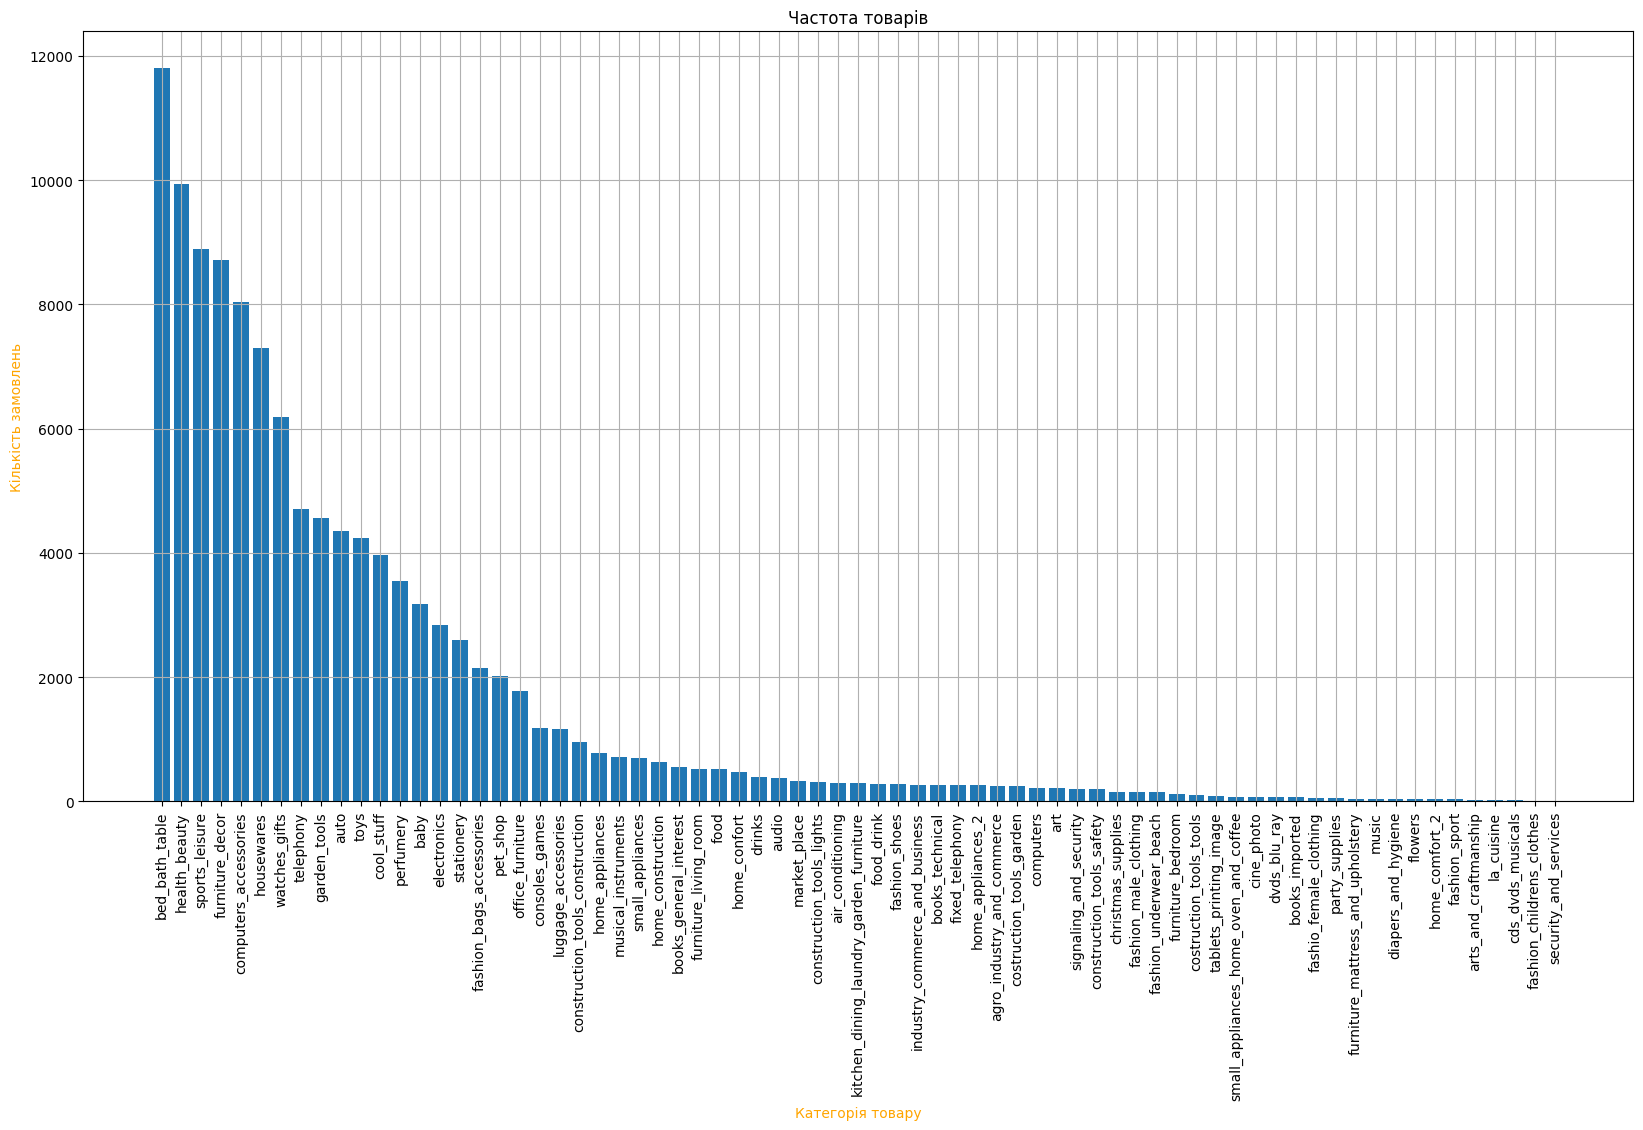

In [31]:
# Візуалізація частоти товарів
plt.figure(figsize=(20, 10))
plt.bar(product_counts.index, product_counts.values)
plt.title("Частота товарів")
plt.xlabel("Категорія товару", color="orange")
plt.ylabel("Кількість замовлень", color="orange")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
product_counts.values

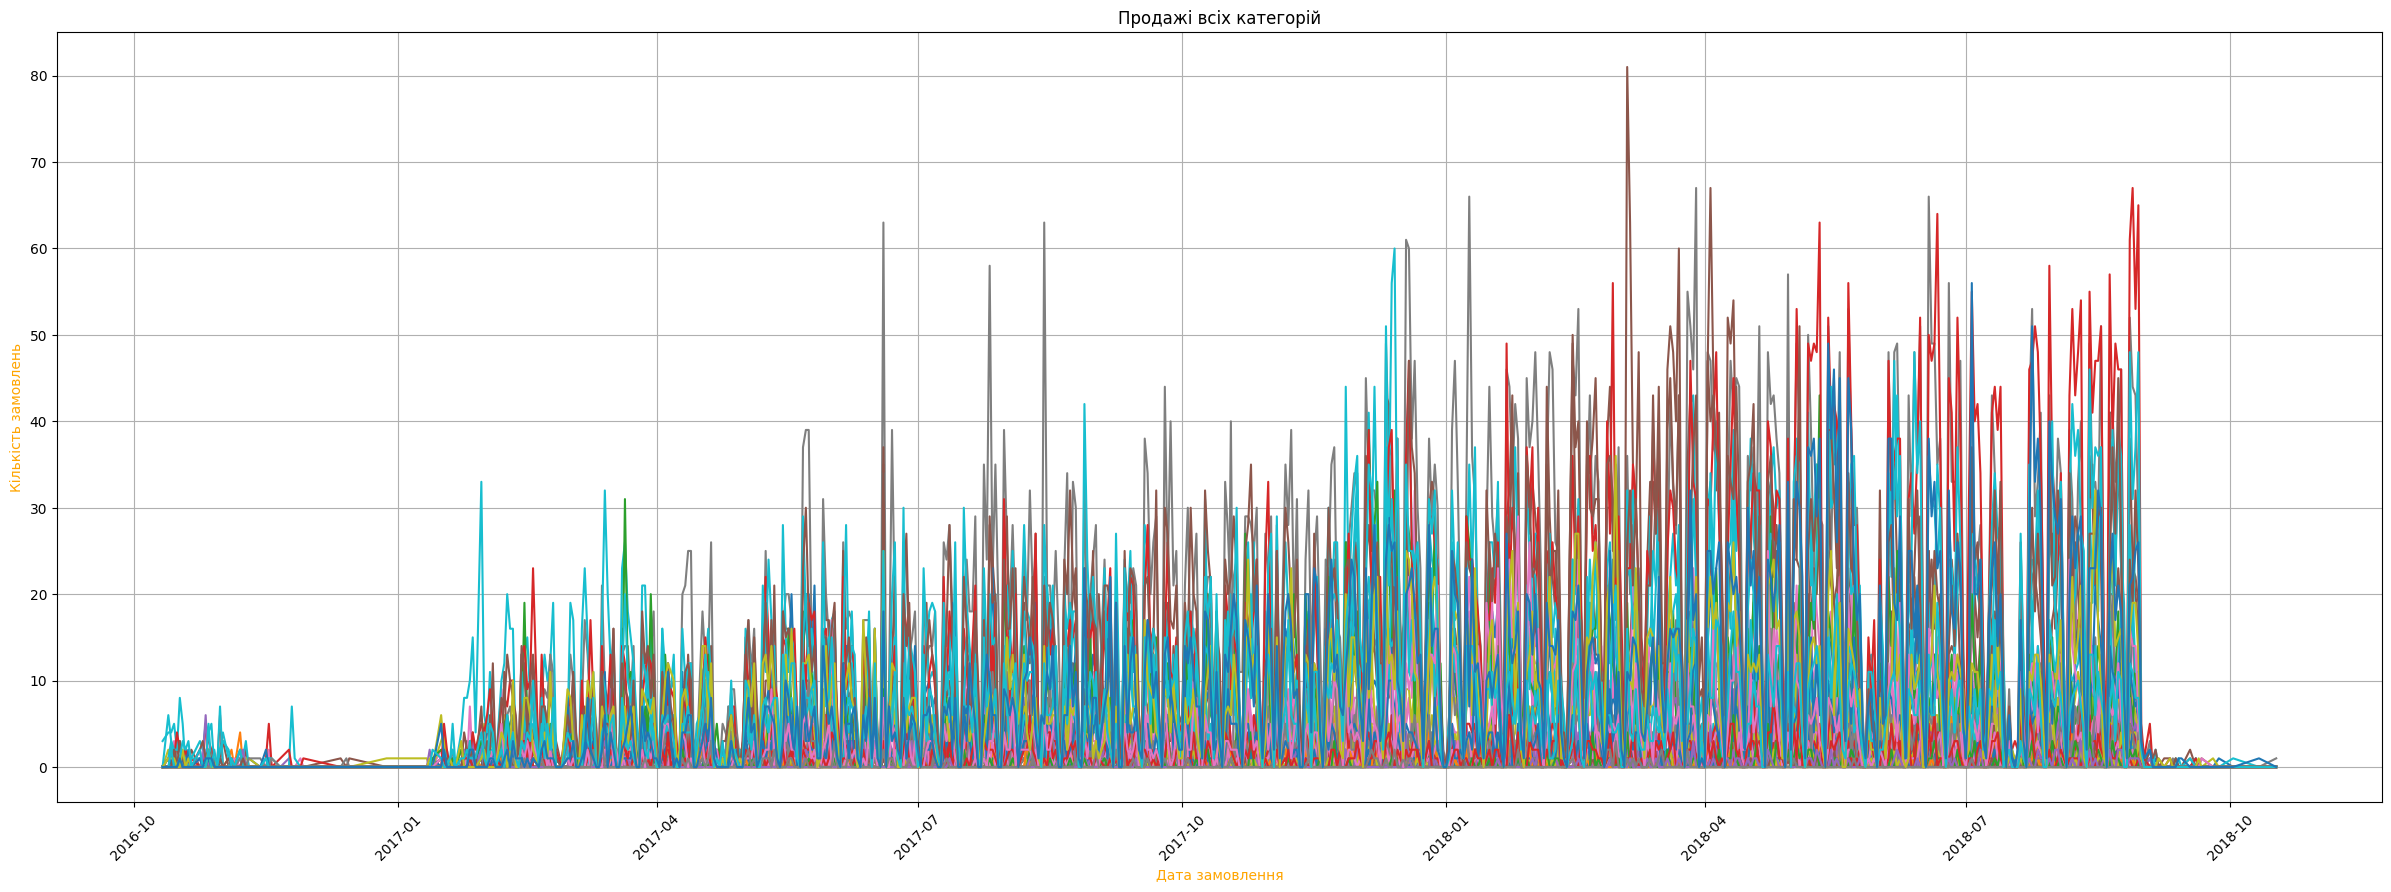

In [59]:
plt.figure(figsize=(30, 10))
for category in data.columns:
  plt.plot(data.index, data[category].values, label=category)

plt.title(f"Продажі всіх категорій")
plt.xlabel("Дата замовлення", color="orange")
plt.ylabel("Кількість замовлень", color="orange")
plt.xticks(rotation=45)
# plt.legend()
plt.grid()
plt.show()

Розглянемо продажі деяких категорій

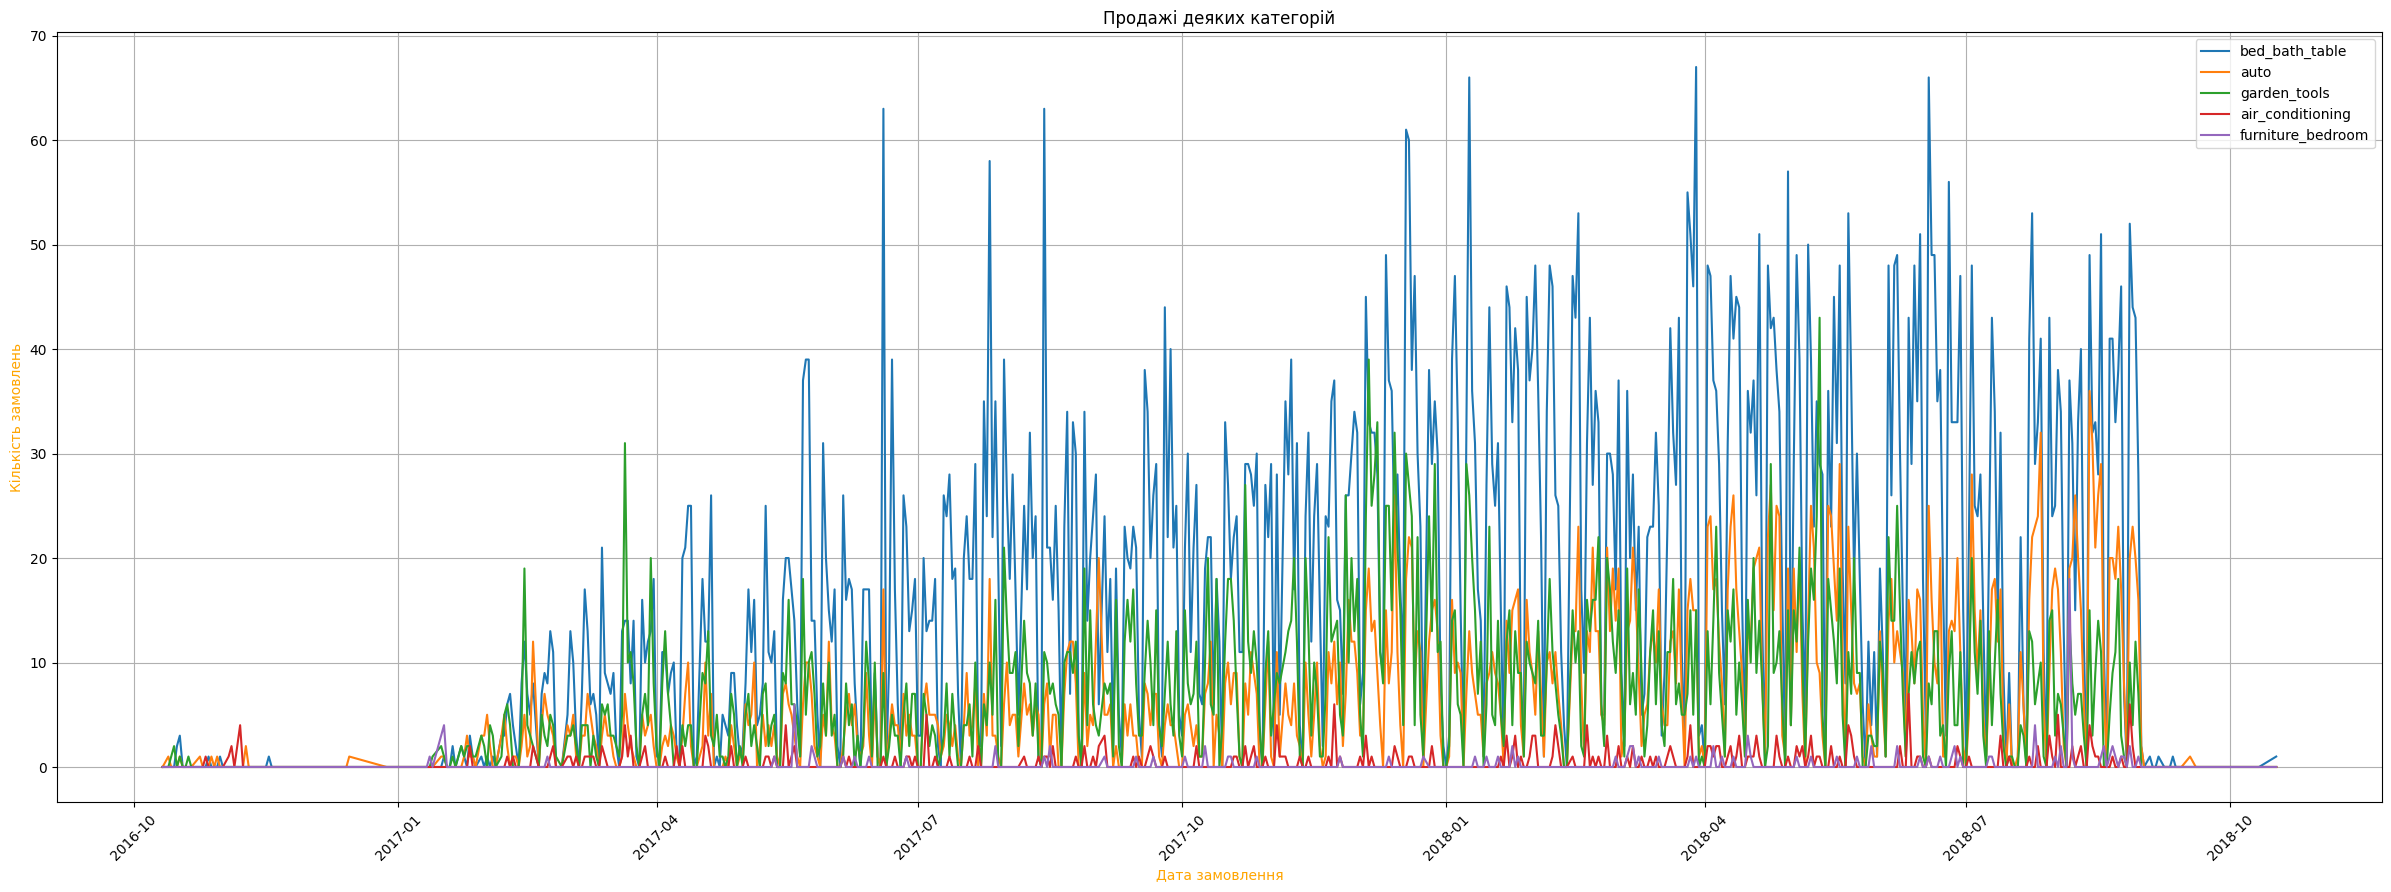

In [55]:
categories = ["bed_bath_table", "auto", "garden_tools", "air_conditioning", "furniture_bedroom"]
# categories = ["furniture_bedroom"]

plt.figure(figsize=(30, 10))
for category in categories:
  plt.plot(data.index, data[category].values, label=category)

plt.title(f"Продажі деяких категорій")
plt.xlabel("Дата замовлення", color="orange")
plt.ylabel("Кількість замовлень", color="orange")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [41]:
data.index

Index([2016-10-11, 2016-10-13, 2016-10-14, 2016-10-15, 2016-10-16, 2016-10-17,
       2016-10-18, 2016-10-19, 2016-10-20, 2016-10-21,
       ...
       2018-09-14, 2018-09-17, 2018-09-19, 2018-09-20, 2018-09-21, 2018-09-25,
       2018-09-27, 2018-10-02, 2018-10-11, 2018-10-17],
      dtype='object', name='order_delivered_customer_date', length=644)

In [ ]:
period = data.loc[data.index[400]:data.index[599]]
period

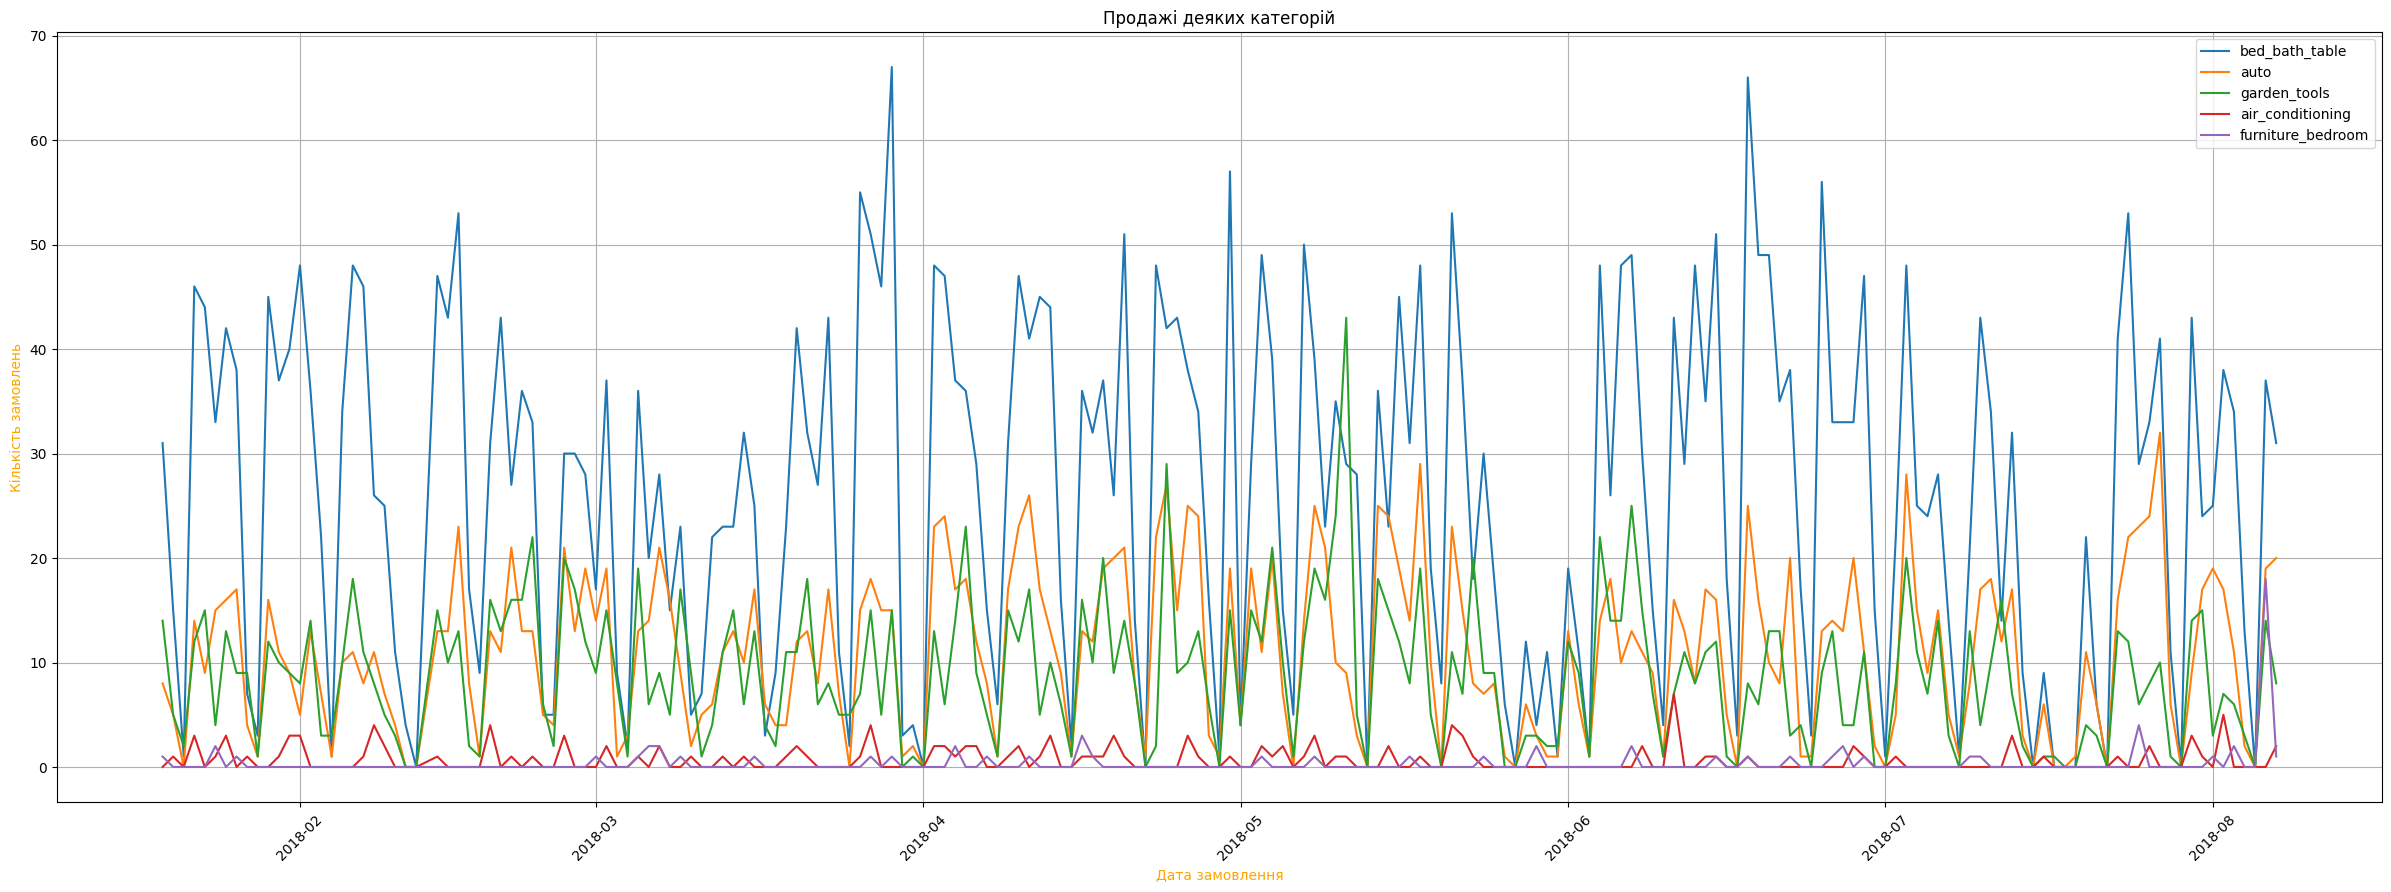

In [56]:
plt.figure(figsize=(30, 10))
for category in categories:
  plt.plot(period.index, period[category].values, label=category)

plt.title(f"Продажі деяких категорій")
plt.xlabel("Дата замовлення", color="orange")
plt.ylabel("Кількість замовлень", color="orange")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

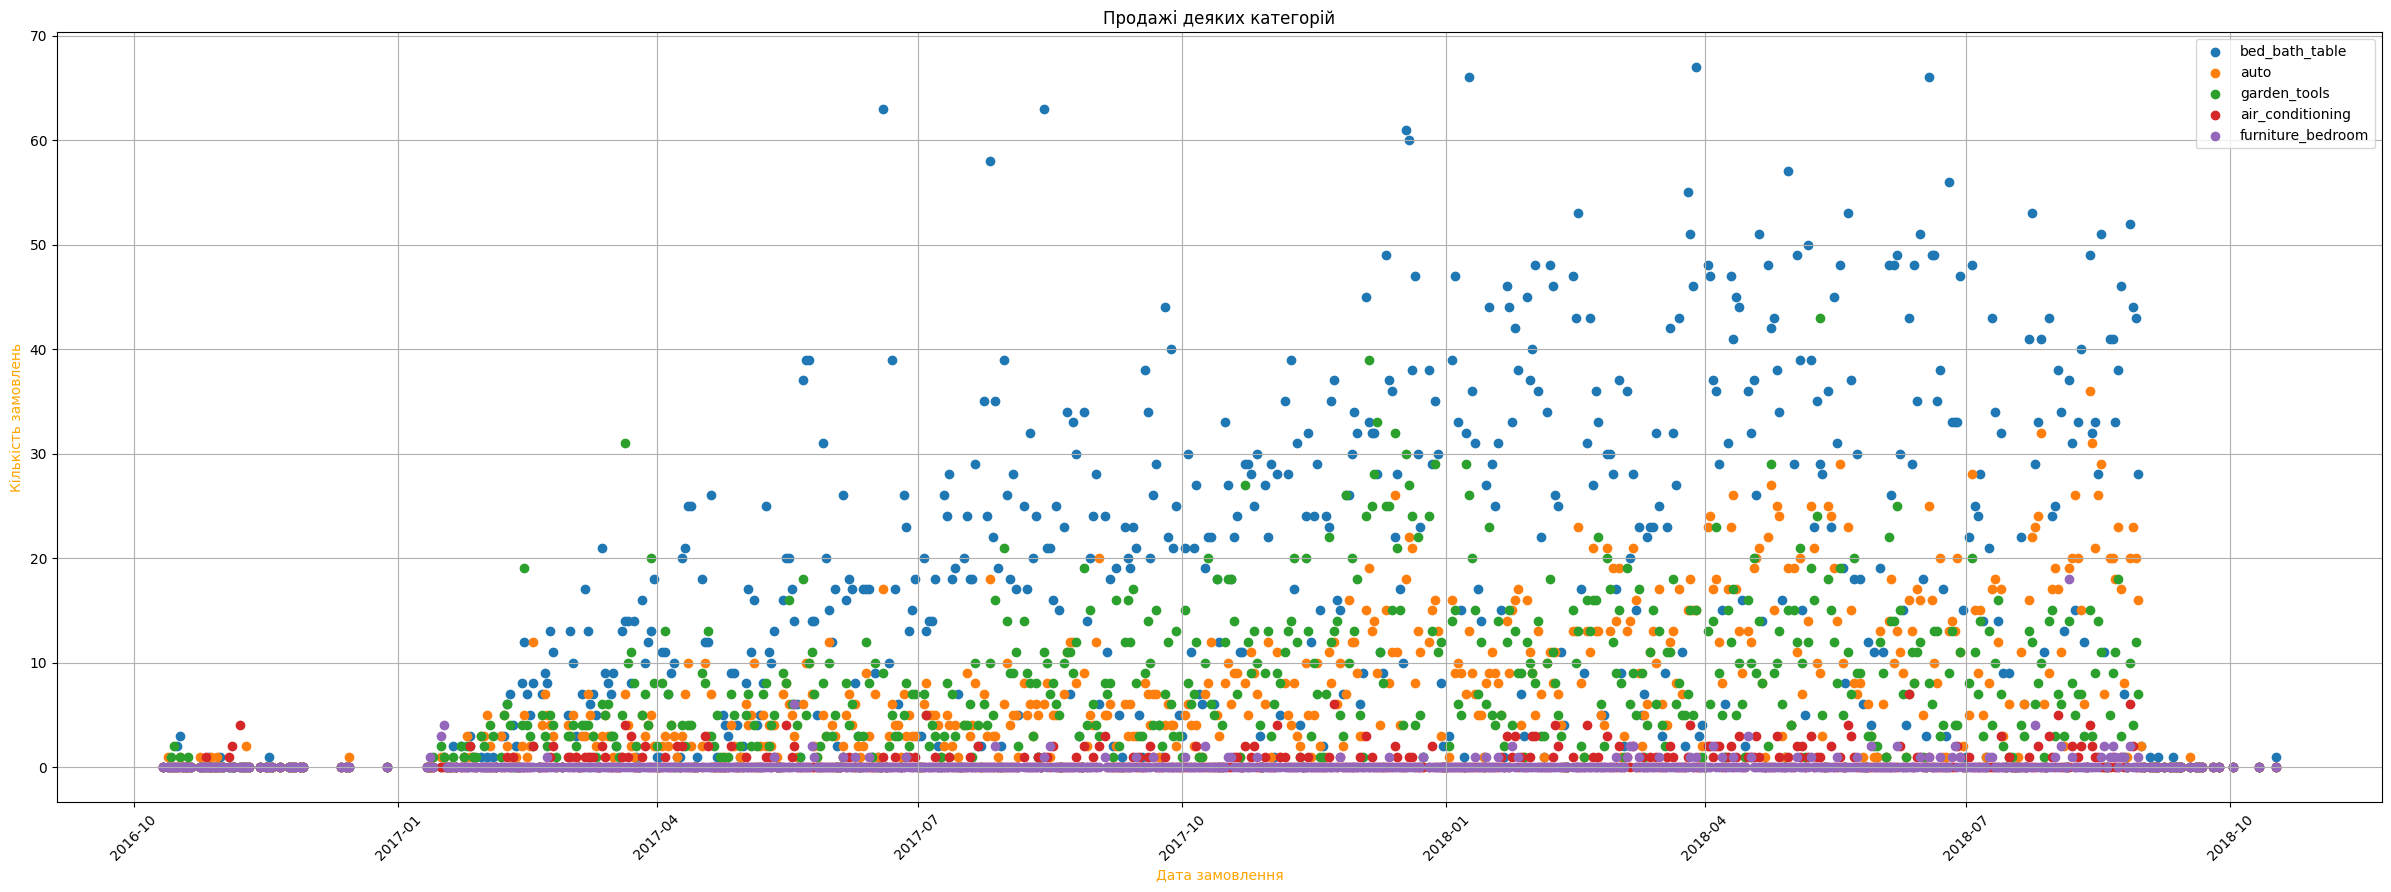

In [71]:
plt.figure(figsize=(30, 10))
for category in categories:
  plt.scatter(data.index, data[category].values, label=category)

plt.title(f"Продажі деяких категорій")
plt.xlabel("Дата замовлення", color="orange")
plt.ylabel("Кількість замовлень", color="orange")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Для передбачення за допомогою машинного навчання може підійти лінійна регресія з гіперпараметрами, градієнтний бустинг, метод опопрних векторів або випадковий ліс

Також, за графіком зрозуміло, що не вс дані є стаціонарними, деякі категорії потребують диференціювання

## Прогнозування (Класична модель часових рядів ARIMA)

Дана модель потребує статистичності даних (дисперсія та середнє значення не змінюються з часом). Статистичність даних можуть порушити тренд та сезонність товарів. Для вирішення проблеми нестаціонарності даних їх можна продиференціювати.

Також треба визначити порядок моделі ARIMA, тобто параметри (p, d, q), де p - порядок авторегресії (число попередніх значень часового ряду), d - порядок диференціювання (скільки разів треба продиференціювати нестаціонарний ряд для стаціонарності), q - порядок моделі ковзного середнього (число помилок попереднього прогнозування).

Стаціонарність можна визначити за допомогою тесту Дікі-Фуллера, а параметри (p, d, q) за допомогою автокореляційної функції ACF та часткової автокореляції PACF.


In [ ]:
daily_orders.columns = ["date", "category", "amount"]
daily_orders

In [ ]:
data

In [50]:
data.describe()

product_category_name_english  agro_industry_and_commerce  air_conditioning  \
count                                          644.000000        644.000000   
mean                                             0.381988          0.456522   
std                                              1.397638          0.954471   
min                                              0.000000          0.000000   
25%                                              0.000000          0.000000   
50%                                              0.000000          0.000000   
75%                                              0.000000          1.000000   
max                                             24.000000          7.000000   

product_category_name_english         art  arts_and_craftmanship       audio  \
count                          644.000000             644.000000  644.000000   
mean                             0.321429               0.037267    0.586957   
std                              0.769222               0.226906    1.020879   
min                              0.000000               0.000000    0.000000   
25%                              0.000000               0.000000    0.000000   
50%                              0.000000               0.000000    0.000000   
75%                              0.000000               0.000000    1.000000   
max                              6.000000               3.000000    6.000000   

product_category_name_english        auto        baby  bed_bath_table  \
count                          644.000000  644.000000      644.000000   
mean                             6.650621    4.832298       18.090062   
std                              7.057461    4.929028       16.117800   
min                              0.000000    0.000000        0.000000   
25%                              1.000000    0.750000        2.000000   
50%                              4.500000    3.000000       15.500000   
75%                             10.250000    8.000000       30.000000   
max                             36.000000   24.000000       67.000000   

product_category_name_english  books_general_interest  books_imported  ...  \
count                                      644.000000      644.000000  ...   
mean                                         0.850932        0.091615  ...   
std                                          1.323134        0.351833  ...   
min                                          0.000000        0.000000  ...   
25%                                          0.000000        0.000000  ...   
50%                                          0.000000        0.000000  ...   
75%                                          1.000000        0.000000  ...   
max                                          7.000000        4.000000  ...   

product_category_name_english  security_and_services  signaling_and_security  \
count                                     644.000000              644.000000   
mean                                        0.003106                0.309006   
std                                         0.055684                0.888415   
min                                         0.000000                0.000000   
25%                                         0.000000                0.000000   
50%                                         0.000000                0.000000   
75%                                         0.000000                0.000000   
max                                         1.000000                8.000000   

product_category_name_english  small_appliances  \
count                                644.000000   
mean                                   1.055901   
std                                    1.425161   
min                                    0.000000   
25%                                    0.000000   
50%                                    1.000000   
75%                                    2.000000   
max                                    9.000000   

product_category_name_eng

In [38]:
print(len(daily_orders["category"].unique()))

71


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [78]:
X_train = data[:int(len(data) * 0.8)]
X_test = data[int(len(data) * 0.8):]
print(data.shape)
print(X_train.shape)
print(X_test.shape)


(644, 71)
(515, 71)
(129, 71)


In [57]:
print(categories)

['bed_bath_table', 'auto', 'garden_tools', 'air_conditioning', 'furniture_bedroom']


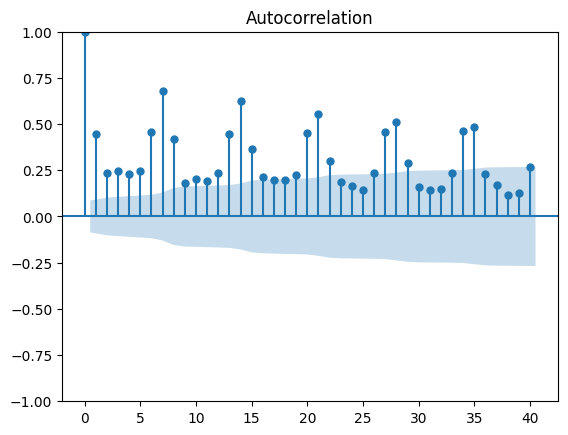

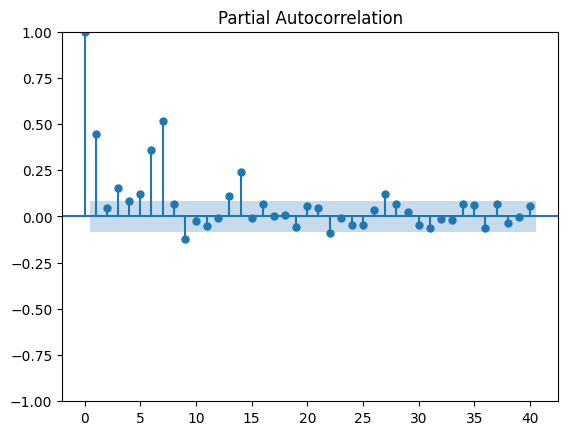

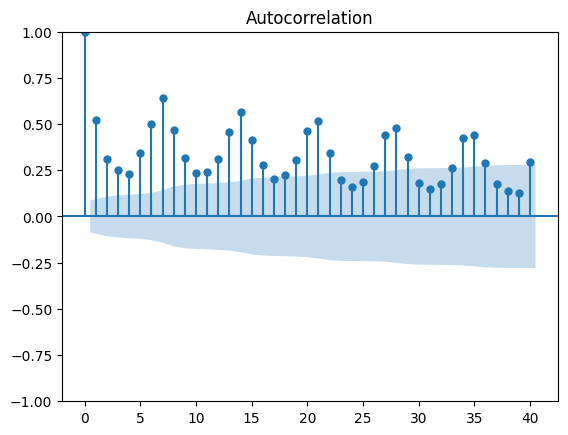

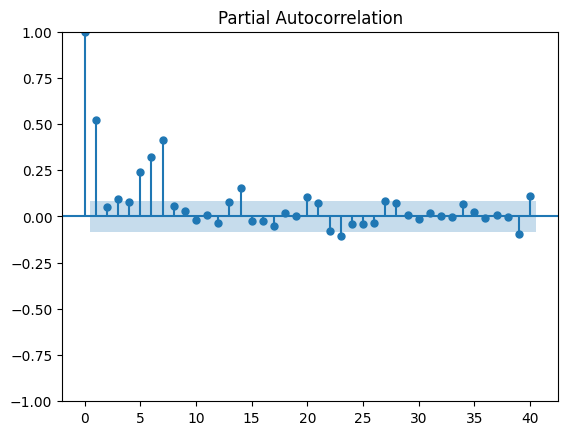

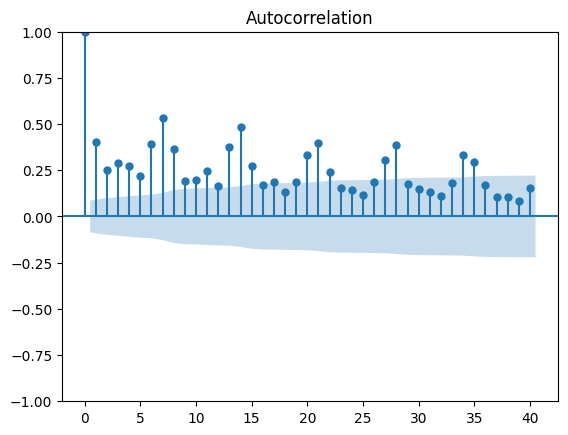

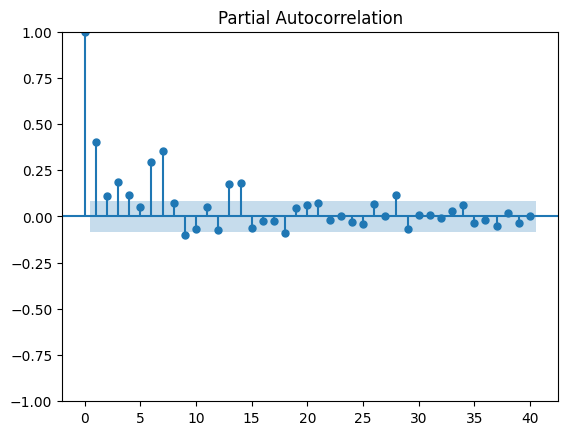

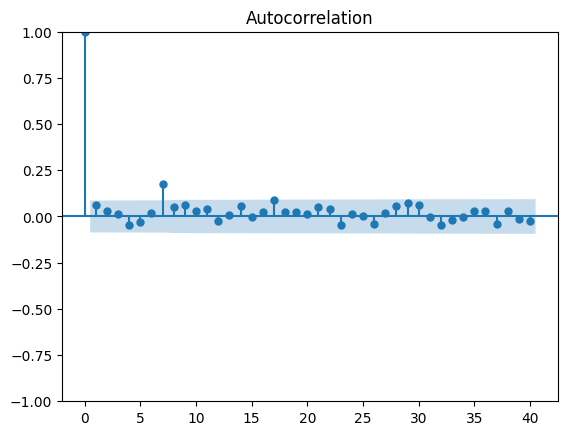

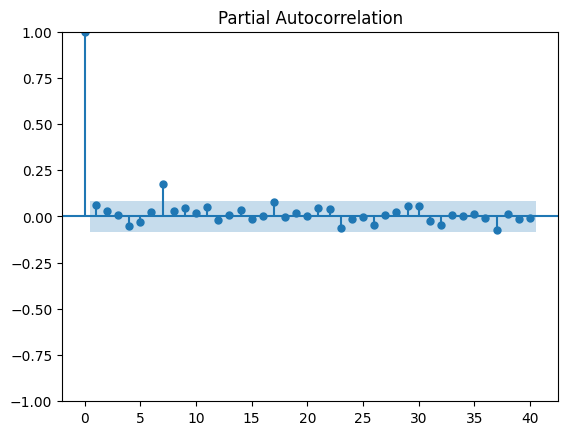

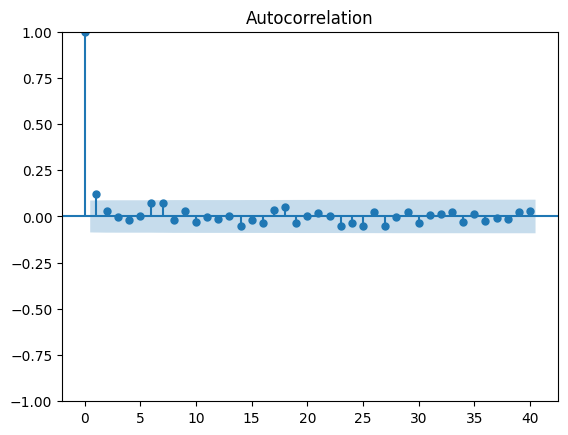

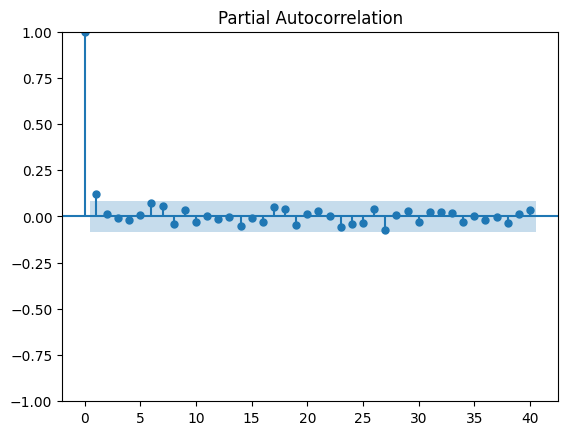

In [79]:
for category in categories:
  plot_acf(X_train[category], lags=40, label=category)
  plot_pacf(X_train[category], lags=40, label=category)

plt.show()

In [80]:
from statsmodels.tsa.stattools import adfuller


# Перевірка на стаціонарність (< 0.05)
for category in categories:
  res = adfuller(X_train[category])
  print(f"{category}:")
  print(f"ADF Statistics: {res[0]}\np-value: {res[1]}\n")


# Деякі значення треба продиференціювати, адже вони є більшими за рівень значущості

bed_bath_table:
ADF Statistics: -1.9093705674697852
p-value: 0.32766582201655237

auto:
ADF Statistics: -1.0662116315158692
p-value: 0.7283565735771577

garden_tools:
ADF Statistics: -1.8774066004217416
p-value: 0.34276325182927203

air_conditioning:
ADF Statistics: -7.1764602567740505
p-value: 2.7192292552551966e-10

furniture_bedroom:
ADF Statistics: -20.02161817165961
p-value: 0.0



In [81]:
data_diff = X_train.diff().dropna()
data_diff

product_category_name_english  agro_industry_and_commerce  air_conditioning  \
order_delivered_customer_date                                                 
2016-10-13                                            0.0               0.0   
2016-10-14                                            0.0               0.0   
2016-10-15                                            0.0               0.0   
2016-10-16                                            0.0               0.0   
2016-10-17                                            0.0               0.0   
...                                                   ...               ...   
2018-05-10                                            0.0               1.0   
2018-05-11                                            1.0               0.0   
2018-05-12                                           -1.0              -1.0   
2018-05-13                                            0.0               0.0   
2018-05-14                                            1.0               0.0   

product_category_name_english  art  arts_and_craftmanship  audio  auto  baby  \
order_delivered_customer_date                                                  
2016-10-13                     0.0                    0.0    0.0   1.0   0.0   
2016-10-14                     0.0                    0.0    0.0  -1.0   0.0   
2016-10-15                     0.0                    0.0    0.0   0.0   3.0   
2016-10-16                     0.0                    0.0    0.0   0.0  -3.0   
2016-10-17                     0.0                    0.0    0.0   1.0   0.0   
...                            ...                    ...    ...   ...   ...   
2018-05-10                     0.0                   -1.0    0.0 -11.0  -6.0   
2018-05-11                     1.0                    0.0    0.0  -1.0  -4.0   
2018-05-12                     1.0                    0.0   -1.0  -6.0  -9.0   
2018-05-13                    -3.0                    0.0    0.0  -3.0  -5.0   
2018-05-14                     2.0                    0.0    2.0  25.0  11.0   

product_category_name_english  bed_bath_table  books_general_interest  \
order_delivered_customer_date                                           
2016-10-13                                0.0                     0.0   
2016-10-14                                0.0                     0.0   
2016-10-15                                0.0                     0.0   
2016-10-16                                2.0                     0.0   
2016-10-17                                1.0                     0.0   
...                                       ...                     ...   
2018-05-10                               12.0                     1.0   
2018-05-11                               -6.0                    -2.0   
2018-05-12                               -1.0                    -2.0   
2018-05-13                              -28.0                     0.0   
2018-05-14                               36.0                     3.0   

product_category_name_english  books_imported  ...  security_and_services  \
order_delivered_customer_date                  ...                          
2016-10-13                                0.0  ...                    0.0   
2016-10-14                                0.0  ...                    0.0   
2016-10-15                                0.0  ...                    0.0   
2016-10-16                                0.0  ...                    0.0   
2016-10-17                                0.0  ...                    0.0   
...                                       ...  ...                    ...   
2018-05-10                               -1.0  ...                    0.0   
2018-05-11                                0.0  ...                    0.0   
2018-05-12                                0.0  ...                    0.0   
2018-05-13                                0.0  ...                    0.0   
2018-05-14                                1.0  ...       

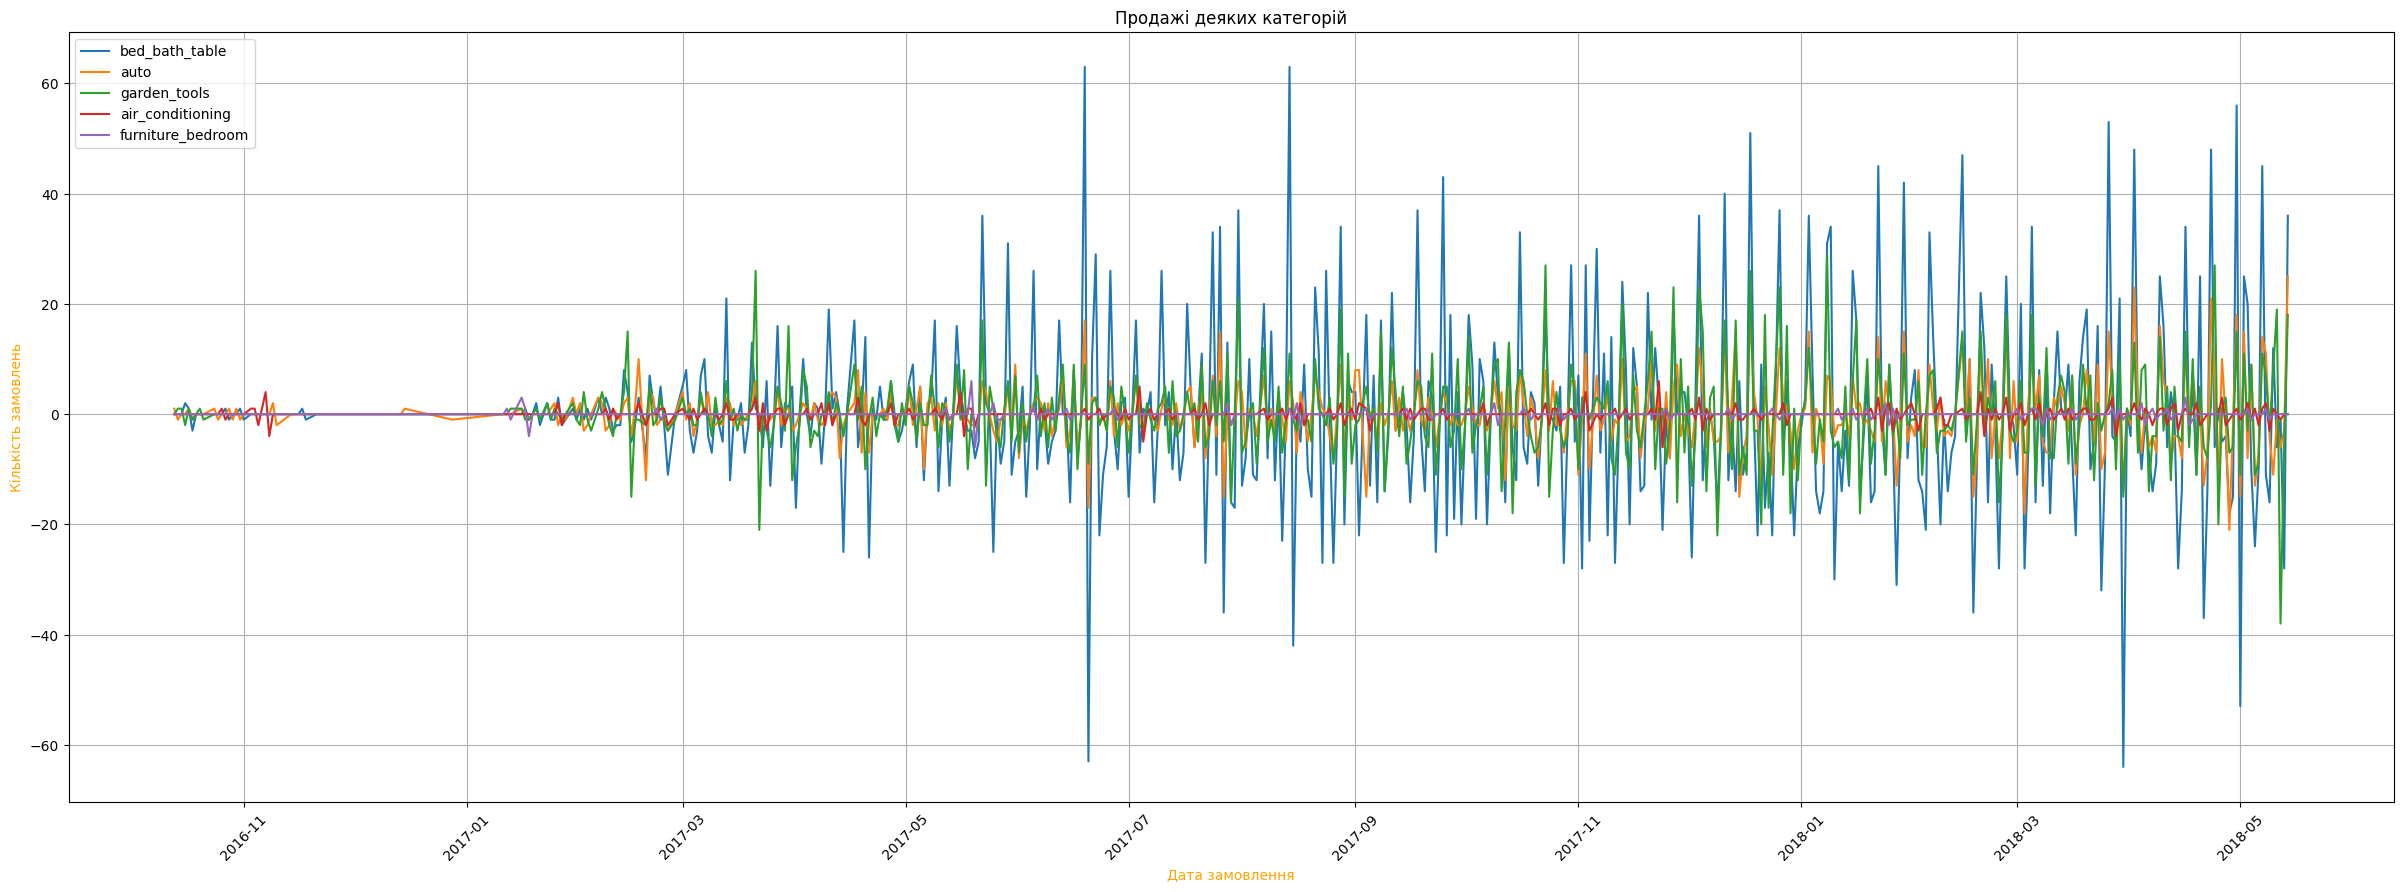

In [82]:
plt.figure(figsize=(30, 10))
for category in categories:
  plt.plot(data_diff.index, data_diff[category].values, label=category)

plt.title(f"Продажі деяких категорій")
plt.xlabel("Дата замовлення", color="orange")
plt.ylabel("Кількість замовлень", color="orange")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Таким чином, дані виглядають більш стаціонарно

Проте, для моделей треба спробувати дві версії даних

## Прогнозуємо на диференційованих даних

In [ ]:
arima_results = {}

for category in X_train.columns:
  arima_model = ARIMA(X_train[category], order=(2, 1, 0))
  arima_fit = arima_model.fit()
  arima_results[category] = arima_fit

print(arima_results)

In [ ]:

for k, v in arima_results.items():
  residuals = v.resid[1:]
  fig, axs = plt.subplots(1, 2)
  # plt.xticks(rotation=45)
  residuals.plot(title=f"Residuals :{k}: ", ax=axs[0])
  residuals.plot(title="Density", kind="kde", ax=axs[1])
  plt.show()


In [2]:
forecasts = {}

for k, v in arima_results.items():
  forecast_test = v.forecast(len(X_test))
  forecasts[k] = forecast_test


In [110]:
for_df = pd.DataFrame(forecasts)
for_df

agro_industry_and_commerce  air_conditioning       art  \
515                    0.357431      6.924106e-17  1.729026   
516                    0.450511      2.531384e-17  1.229354   
517                    0.596204      3.159299e-17  1.640547   
518                    0.472818      4.130676e-17  1.545414   
519                    0.505507      3.318599e-17  1.467929   
..                          ...               ...       ...   
639                    0.509584      3.557796e-17  1.522418   
640                    0.509584      3.557796e-17  1.522418   
641                    0.509584      3.557796e-17  1.522418   
642                    0.509584      3.557796e-17  1.522418   
643                    0.509584      3.557796e-17  1.522418   

     arts_and_craftmanship     audio       auto      baby  bed_bath_table  \
515           1.880192e-19  0.797105  17.463836  7.678187       30.532291   
516           6.293038e-20  0.903157  13.480019  6.612285       20.931917   
517           8.369911e-20  1.210722  16.761530  7.764024       26.639806   
518           1.114313e-19  0.992998  16.704353  7.534469       27.468540   
519           8.608258e-20  1.028998  15.871444  7.375437       25.255525   
..                     ...       ...        ...       ...             ...   
639           9.412919e-20  1.047032  16.190562  7.467158       26.036900   
640           9.412919e-20  1.047032  16.190562  7.467158       26.036900   
641           9.412919e-20  1.047032  16.190562  7.467158       26.036900   
642           9.412919e-20  1.047032  16.190562  7.467158       26.036900   
643           9.412919e-20  1.047032  16.190562  7.467158       26.036900   

     books_general_interest  books_imported  ...  security_and_services  \
515                1.357740        0.295646  ...                    0.0   
516                1.249608        0.417925  ...                    0.0   
517                1.860129        0.595110  ...                    0.0   
518                1.562219        0.424597  ...                    0.0   
519                1.520341        0.478460  ...                    0.0   
..                      ...             ...  ...                    ...   
639                1.593090        0.481188  ...                    0.0   
640                1.593090        0.481188  ...                    0.0   
641                1.593090        0.481188  ...                    0.0   
642                1.593090        0.481188  ...                    0.0   
643                1.593090        0.481188  ...                    0.0   

     signaling_and_security  small_appliances  \
515           -5.530633e-17     -1.434128e-17   
516           -4.721889e-17     -6.367486e-18   
517           -3.294972e-17     -7.685959e-18   
518           -4.546316e-17     -8.683922e-18   
519           -4.210860e-17     -7.842999e-18   
..                      ...               ...   
639           -4.161481e-17     -8.087423e-18   
640           -4.161481e-17     -8.087423e-18   
641           -4.161481e-17     -8.087423e-18   
642           -4.161481e-17     -8.087423e-18   
643           -4.161481e-17     -8.087423e-18   

     small_appliances_home_oven_and_coffee  sports_leisure  stationery  \
515                          -6.503556e-17       25.733863    4.967582   
516                          -6.005711e-17       20.742682    3.701081   
517                          -4.805455e-17       25.919359    5.298415   
518                          -5.770650e-17       25.284663    4.982235   
519                          -5.600768e-17       24.209911    4.595572   
..                                     ...             ...         ...   
639                          -5.506321e-17       24.719654    4.825679   
640                          -5.506321e-17       24.719654    4.825679   
641                          -5.506321e-17       24.719654    4.825679   
642                          -5.506321e-17       24.719654    4.825679   
643                

In [118]:
for k, v in forecasts.items():
  arima_mae = mean_absolute_error(X_test[k], v)
  print(f"MAE for {k}: {arima_mae}")

MAE for agro_industry_and_commerce: 0.7117169089783296
MAE for air_conditioning: 0.5116279069767442
MAE for art: 1.2848494647338917
MAE for arts_and_craftmanship: 0.15503875968992248
MAE for audio: 0.938705887596238
MAE for auto: 9.407033866567536
MAE for baby: 5.710647996906259
MAE for bed_bath_table: 16.789792951666982
MAE for books_general_interest: 1.2869478977564441
MAE for books_imported: 0.530888029838814
MAE for books_technical: 1.0089622635563744
MAE for cds_dvds_musicals: 3.711380543245765e-20
MAE for christmas_supplies: 0.5547036354948444
MAE for cine_photo: 0.5946221486957889
MAE for computers: 1.4125121187010257
MAE for computers_accessories: 11.85138945044613
MAE for consoles_games: 3.44741368545748
MAE for construction_tools_construction: 3.3756977543259725
MAE for construction_tools_lights: 1.6046511627906976
MAE for construction_tools_safety: 1.7064493394337825
MAE for cool_stuff: 6.863977718742814
MAE for costruction_tools_garden: 0.7190360389770284
MAE for costructio

Бачимо, що є дуже низькі помилки, що є гарним показником, а є і дуже великі помилки, що свідчить про велику неточність прогнозу

## Прогнозуємо на вихідних даних

In [ ]:
arima_results = {}

for category in X_train.columns:
  arima_model = ARIMA(X_train[category], order=(2, 0, 0))
  arima_fit = arima_model.fit()
  arima_results[category] = arima_fit


In [120]:

for k, v in arima_results.items():
  residuals = v.resid[1:]
  fig, axs = plt.subplots(1, 2)
  # plt.xticks(rotation=45)
  residuals.plot(title=f"Residuals :{k}: ", ax=axs[0])
  residuals.plot(title="Density", kind="kde", ax=axs[1])
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
forecasts = {}

for k, v in arima_results.items():
  forecast_test = v.forecast(len(X_test))
  forecasts[k] = forecast_test

In [122]:
for_df = pd.DataFrame(forecasts)
for_df

agro_industry_and_commerce  air_conditioning       art  \
515                    0.387611          0.403698  0.500597   
516                    0.391011          0.427898  0.529420   
517                    0.361274          0.440545  0.313029   
518                    0.359228          0.441974  0.278805   
519                    0.357619          0.442411  0.240749   
..                          ...               ...       ...   
639                    0.357279          0.442496  0.214881   
640                    0.357279          0.442496  0.214881   
641                    0.357279          0.442496  0.214881   
642                    0.357279          0.442496  0.214881   
643                    0.357279          0.442496  0.214881   

     arts_and_craftmanship     audio       auto      baby  bed_bath_table  \
515               0.007888  0.739410  15.366607  6.748459       24.476779   
516               0.007825  0.696632  11.462434  5.830857       21.132069   
517               0.007763  0.589800   9.077695  5.114735       19.191270   
518               0.007764  0.569336   7.701445  4.743549       18.212623   
519               0.007765  0.557591   6.901858  4.532347       17.707918   
..                     ...       ...        ...       ...             ...   
639               0.007765  0.551767   5.795168  4.266599       17.174298   
640               0.007765  0.551767   5.795168  4.266599       17.174298   
641               0.007765  0.551767   5.795168  4.266599       17.174298   
642               0.007765  0.551767   5.795168  4.266599       17.174298   
643               0.007765  0.551767   5.795168  4.266599       17.174298   

     books_general_interest  books_imported  ...  security_and_services  \
515                1.205821        0.038470  ...               0.003911   
516                0.901729        0.063801  ...               0.003896   
517                0.814458        0.062022  ...               0.003881   
518                0.792683        0.062096  ...               0.003881   
519                0.787074        0.062092  ...               0.003881   
..                      ...             ...  ...                    ...   
639                0.785146        0.062093  ...               0.003881   
640                0.785146        0.062093  ...               0.003881   
641                0.785146        0.062093  ...               0.003881   
642                0.785146        0.062093  ...               0.003881   
643                0.785146        0.062093  ...               0.003881   

     signaling_and_security  small_appliances  \
515                0.189163          0.782341   
516                0.202560          0.904914   
517                0.216040          0.979131   
518                0.217882          0.999378   
519                0.218906          1.007768   
..                      ...               ...   
639                0.219210          1.012074   
640                0.219210          1.012074   
641                0.219210          1.012074   
642                0.219210          1.012074   
643                0.219210          1.012074   

     small_appliances_home_oven_and_coffee  sports_leisure  stationery  \
515                               0.046507       24.774146    5.097737   
516                               0.053178       20.324622    4.893418   
517                               0.057979       17.372995    4.414712   
518                               0.059219       15.709428    4.176836   
519                               0.059794       14.745625    4.008096   
..                                     ...             ...         ...   
639                               0.060095       13.432141    3.706234   
640                               0.060095       13.432141    3.706234   
641                               0.060095       13.432141    3.706234   
642                               0.060095       13.432141    3.706234   
643                

In [123]:
for k, v in forecasts.items():
  arima_mae = mean_absolute_error(X_test[k], v)
  print(f"MAE for {k}: {arima_mae}")

MAE for agro_industry_and_commerce: 0.6444810929319854
MAE for air_conditioning: 0.741627296181252
MAE for art: 0.7957440303319572
MAE for arts_and_craftmanship: 0.16087865072525384
MAE for audio: 0.8241087832292118
MAE for auto: 8.126015257664676
MAE for baby: 5.842987068271123
MAE for bed_bath_table: 16.46660343898434
MAE for books_general_interest: 1.0814140636491345
MAE for books_imported: 0.25100943837729994
MAE for books_technical: 0.9376449996497821
MAE for cds_dvds_musicals: 0.02708230918407488
MAE for christmas_supplies: 0.38369231454017233
MAE for cine_photo: 0.3806738296564465
MAE for computers: 0.5712081770193237
MAE for computers_accessories: 10.447459654052743
MAE for consoles_games: 1.8010813656581615
MAE for construction_tools_construction: 3.741287337254999
MAE for construction_tools_lights: 1.598141122529149
MAE for construction_tools_safety: 0.6744244621753377
MAE for cool_stuff: 4.229580627660891
MAE for costruction_tools_garden: 0.660633101834985
MAE for costructio

Можна звірити і побачити, що загалом похибки стали меншими, що є гарним показником

Можливо, є сенс вибрати деякі категорії та окремо продиференціювати їхні значення

## Прогноз на останні 21 день

В цьому блоці створимо функцію для можливості розрахувати прогноз на майбутній період

Для цього датасету використаємо останні 21 день в якості тесту

In [63]:
from sklearn.metrics import mean_squared_error


print(data.shape)

(644, 71)


In [61]:
X_train = data[:len(data) - 21]
X_test = data[len(data) - 21:]

print(X_train.shape)
print(X_test.shape)

(623, 71)
(21, 71)


In [110]:
def make_forecast(forecast_period):
  X_train = data[:len(data) - forecast_period]
  X_test = data[len(data) - forecast_period:]

  results = {}
  forecasts = {}

  for category in data.columns:
    model = ARIMA(X_train[category], order=(2, 0, 0))  # Параметри p та q можна пробувати змінювати
    model_fit = model.fit()

    # Прогноз
    forecast = model_fit.forecast(steps=forecast_period)

    # Похибка (MAE, MSE)
    mae = mean_absolute_error(X_test[category], forecast)
    mse = mean_squared_error(X_test[category], forecast)

    results[category] = f"mae: {mae}; mse: {mse}"
    forecasts[category] = forecast

  return results, forecasts

Прогнозуємо

In [ ]:
result, forecast = make_forecast(21)

In [112]:
for k, v in result.items():
  print(f"{k}:\n{v}\n")

agro_industry_and_commerce:
mae: 0.39823060988050296; mse: 0.15868005029166854

air_conditioning:
mae: 0.4713258871426648; mse: 0.22216756094111748

art:
mae: 0.3468013199687307; mse: 0.12308432724682851

arts_and_craftmanship:
mae: 0.07822378198762374; mse: 0.01441390503851948

audio:
mae: 0.6732049295893517; mse: 0.48820706372370004

auto:
mae: 7.236927966910143; mse: 53.1702265271332

baby:
mae: 5.509372478457901; mse: 31.58780603119314

bed_bath_table:
mae: 18.831418316579068; mse: 355.32259937365916

books_general_interest:
mae: 0.906700846901573; mse: 0.8315609909068057

books_imported:
mae: 0.09425421926627953; mse: 0.008885557267399228

books_technical:
mae: 0.441030167517825; mse: 0.19685324520031258

cds_dvds_musicals:
mae: 0.02211844296694753; mse: 0.0004901050311391174

christmas_supplies:
mae: 0.24073182182171857; mse: 0.05802865314753851

cine_photo:
mae: 0.13830826766717078; mse: 0.0255709849023281

computers:
mae: 0.35613395382523827; mse: 0.12814707139164033

computers

Оцінка MAE підходить краще для прогнозування за допомогою моделі ARIMA

In [ ]:
for k, v in forecast.items():
  print(f"{k}:\n{v}\n")

## Візуалізація

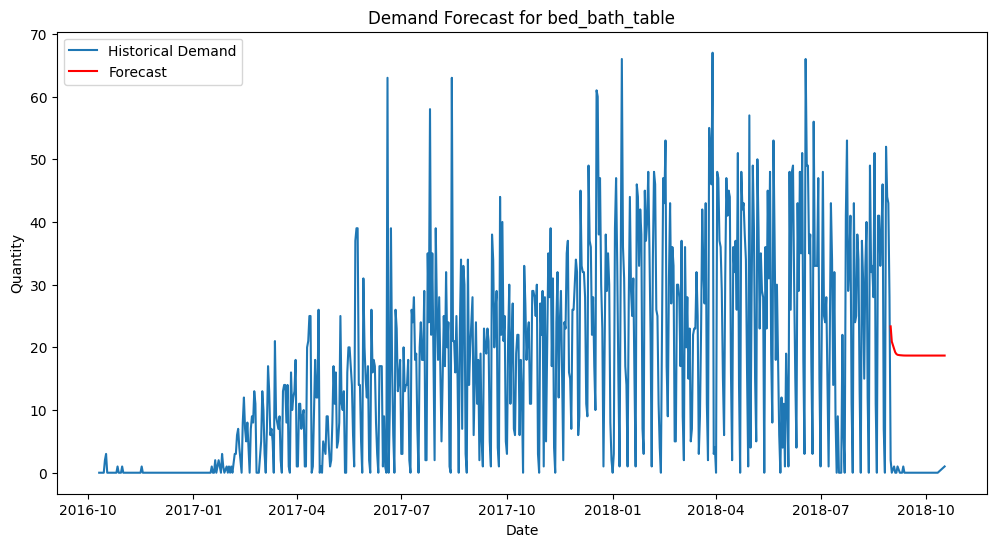

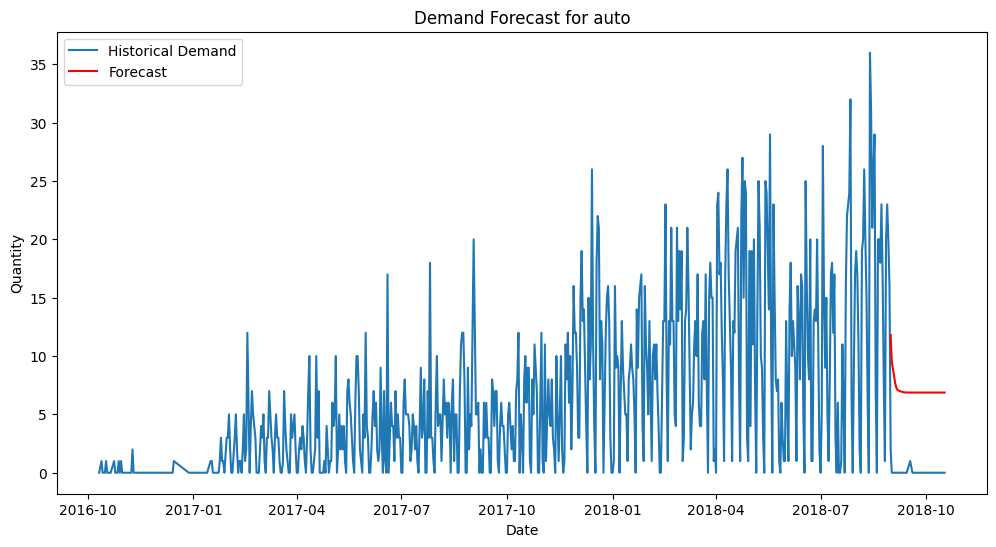

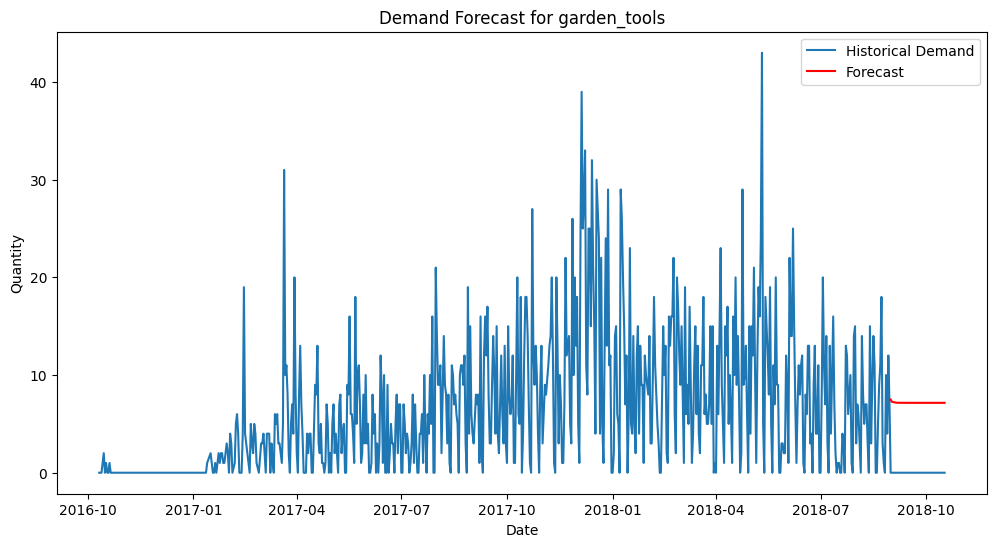

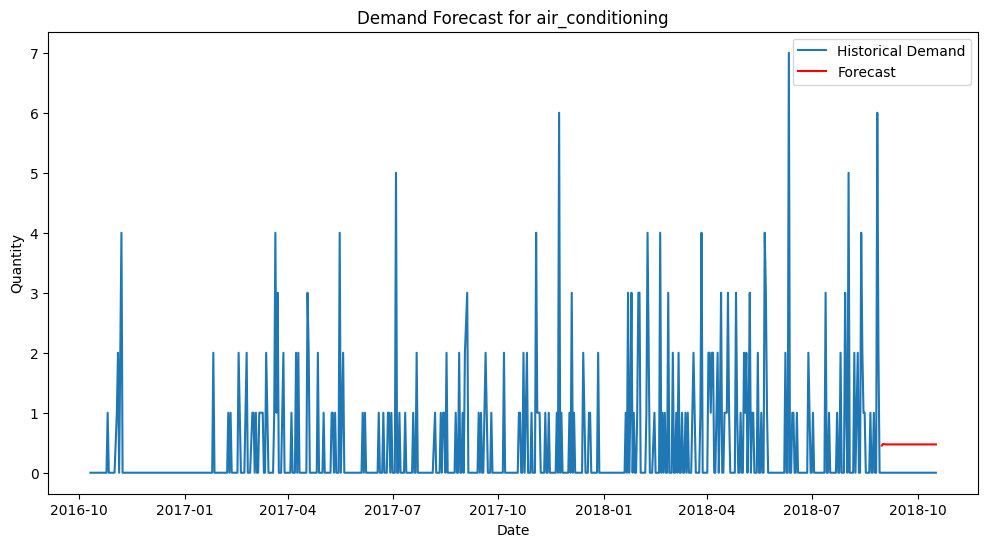

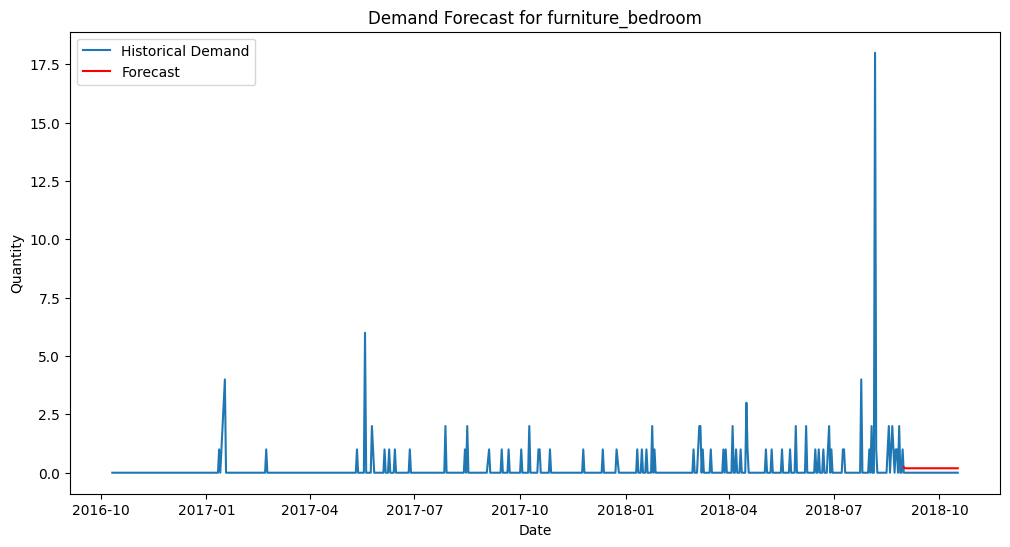

In [113]:

for category in categories:
  plt.figure(figsize=(12, 6))
  plt.plot(data.index, data[category], label="Historical Demand")
  plt.plot(X_test.index, forecast[category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()


Бачимо, що модель ARIMA прогнозує досить непогано: похибка є, але не на багато значень, а в більшості (згідно оцінкам MAE) похибка є мінімальною

Покращити прогноз можна багатьма способами:

1) Підбирання параметрів p, d, q (хоча, для більшості категорій модель працює непогано, тож сильного покращення для всієї вибірки можна не очікувати)

2) Диференціювання або логарифмування окремих значень категорій (цей варіант більше підійде, для усунення великих кореляцій)

3) Більш детальний та глибший аналіз кожної з категорій: сезонність, тенденція (хоча за налізом данних великої різниці між сезонами не було)

## Прогноз на 14 днів від останньої дати і тиждень (21)

Для цього треба трохи переписати функцію

За X_train взяти всю вибірку

In [121]:
def make_forecast(forecast_period):

  forecasts = {}

  for category in data.columns:
    model = ARIMA(data[category], order=(2, 0, 0))  # Параметри p та q можна пробувати змінювати
    model_fit = model.fit()

    # Прогноз
    forecast = model_fit.forecast(steps=forecast_period)

    forecasts[category] = forecast

  return forecasts

In [ ]:
forecast = make_forecast(21)

In [123]:
data.index.max()

datetime.date(2018, 10, 17)

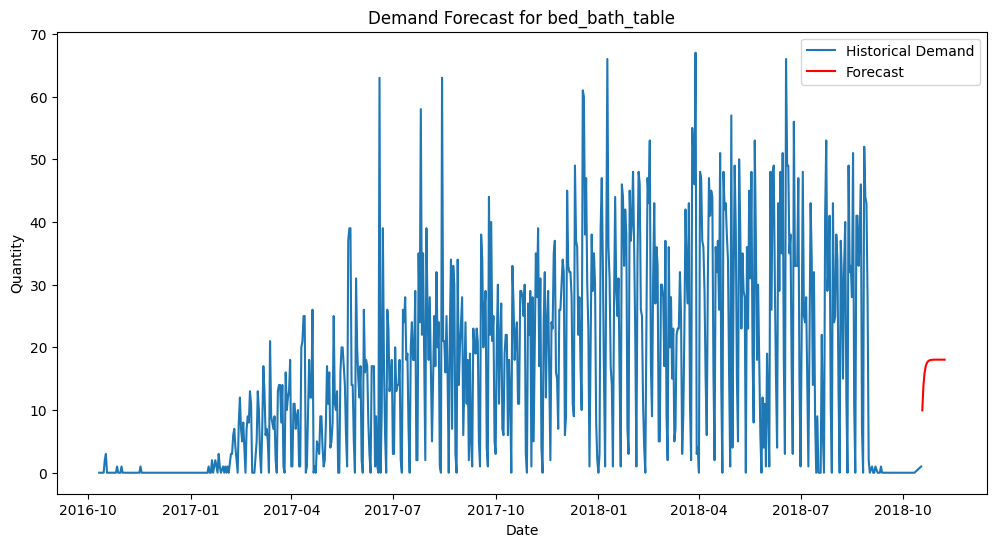

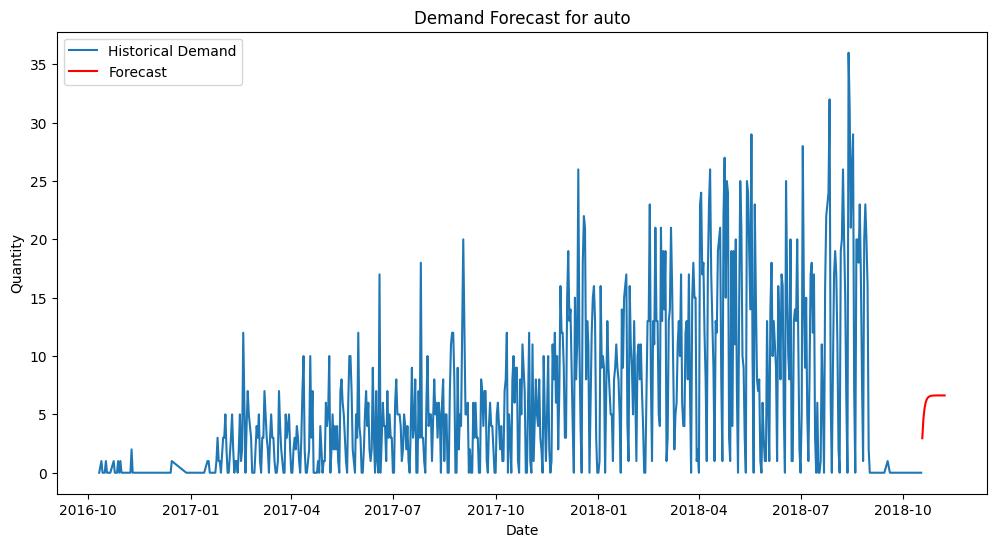

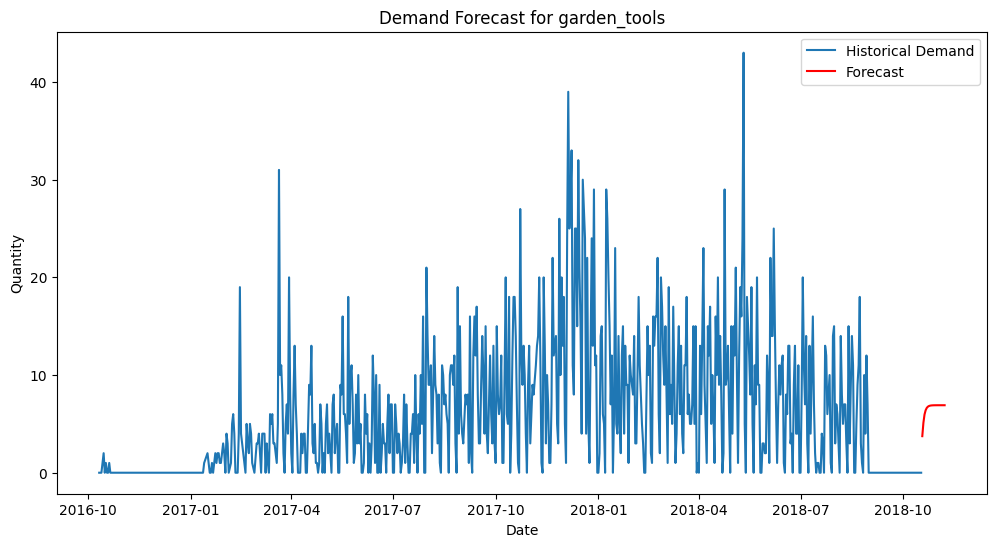

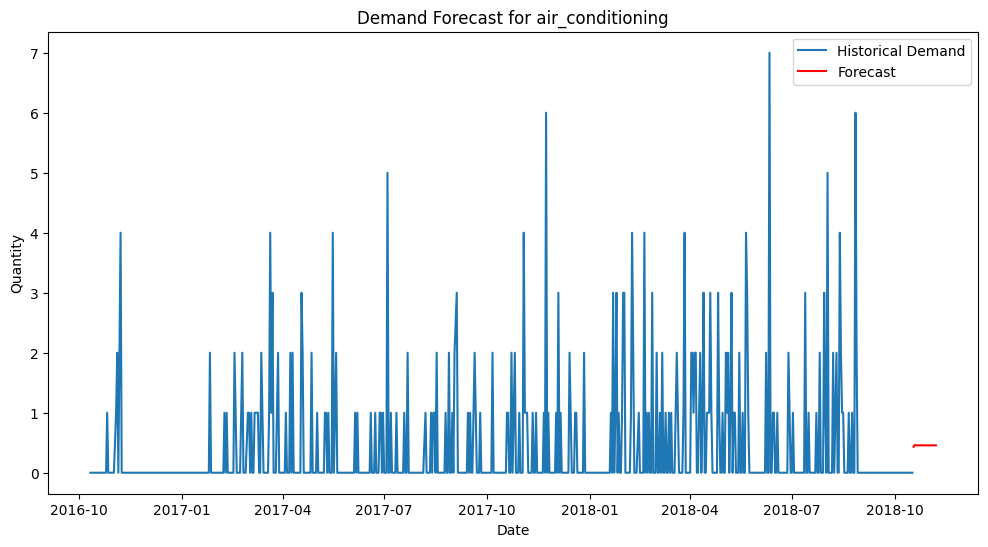

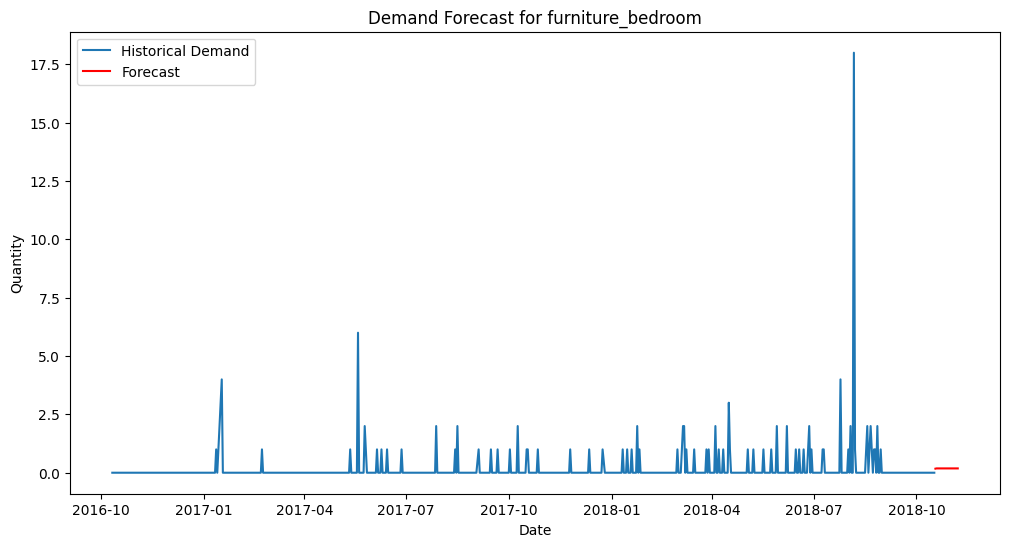

In [128]:

for category in categories:
  plt.figure(figsize=(12, 6))
  plt.plot(data.index, data[category], label="Historical Demand")

  future_period = pd.date_range(data.index.max() + pd.Timedelta(days=1), periods=21, freq="D")

  plt.plot(future_period, forecast[category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()


## Візуалізація для кожної категорії

In [129]:

for category in data.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(data.index[600:], data[category][600:], label="Historical Demand")

  future_period = pd.date_range(data.index.max() + pd.Timedelta(days=1), periods=21, freq="D")

  plt.plot(future_period, forecast[category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Прогнозування моделями машинного навчання

Виходячи з аналізу даних можна обрати досить багато моделей класичного машинного навчання а також нейронні мережі.

В нашому випадку найкращими моделями будуть Random Forest / GBM (Gradient Boosting Machine): (XGBoost / LightGBM / CatBoost).

* **Random Forest** -- ансамблевий метод машинного навчання для класифікації, регресії та інших завдань, який працює за допомогою побудови численних дерев рішень (decision trees) під час тренування моделі й продукує моду для класів (класифікацій) або усереднений прогноз (регресія) побудованих дерев. Недоліком є схильність до перенавчання.

**Дерево рішень** - це алгоритм машинного навчання, який використовує деревоподібну структуру для розбиття набору даних на менші підмножини. Кожен вузол у дереві представляє один з атрибутів/ознак даних, за якими можна розділити набір даних на дві або більше підмножини.

* **GBM** -- ансамблевий метод машинного навчання для багатьох задач машинного навчання. Він використовує градієнтний спуск для оптимізації функції втрат. Може бути гарним інструментом для прогнозування цін і попиту, кредитного скорингу та оцінки ризиків.


Найефективніші оцінки для них: **MSE**, **RMSE**

Для можливості вибору або покращення результату розробимо дві моделі: Random Forest та Gradient Boosting Machine.

Для передбачення попиту і кількості продаж товару для машинного навчання до основної таблиці можна додати більше фіч, такі як день тижня, сезон, місяць, рік, геолокацію покупця, оцінка з order_review, тощо.

Варто відмітити, що додавання великої кількості нелінійних фіч може призвести до перенавчання.

Спочатку побачимо, як моделі прогнозують всередині вибірки на історичних продажах, а потім побудуємо прогноз на 21 день вперед (можливо із додаванням нових фіч)

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data

In [46]:
data_t = data.T
data_t

order_delivered_customer_date  2016-10-11  2016-10-13  2016-10-14  2016-10-15  \
product_category_name_english                                                   
agro_industry_and_commerce            0.0         0.0         0.0         0.0   
air_conditioning                      0.0         0.0         0.0         0.0   
art                                   0.0         0.0         0.0         0.0   
arts_and_craftmanship                 0.0         0.0         0.0         0.0   
audio                                 0.0         0.0         0.0         0.0   
...                                   ...         ...         ...         ...   
stationery                            0.0         0.0         0.0         0.0   
tablets_printing_image                0.0         0.0         0.0         0.0   
telephony                             0.0         1.0         1.0         1.0   
toys                                  0.0         0.0         2.0         0.0   
watches_gifts                         0.0         0.0         0.0         0.0   

order_delivered_customer_date  2016-10-16  2016-10-17  2016-10-18  2016-10-19  \
product_category_name_english                                                   
agro_industry_and_commerce            0.0         0.0         0.0         0.0   
air_conditioning                      0.0         0.0         0.0         0.0   
art                                   0.0         0.0         0.0         0.0   
arts_and_craftmanship                 0.0         0.0         0.0         0.0   
audio                                 0.0         0.0         1.0         0.0   
...                                   ...         ...         ...         ...   
stationery                            0.0         0.0         0.0         0.0   
tablets_printing_image                0.0         0.0         0.0         0.0   
telephony                             0.0         0.0         2.0         0.0   
toys                                  0.0         1.0         3.0         2.0   
watches_gifts                         0.0         1.0         0.0         0.0   

order_delivered_customer_date  2016-10-20  2016-10-21  ...  2018-09-14  \
product_category_name_english                          ...               
agro_industry_and_commerce            0.0         0.0  ...         0.0   
air_conditioning                      0.0         0.0  ...         0.0   
art                                   0.0         0.0  ...         0.0   
arts_and_craftmanship                 0.0         0.0  ...         0.0   
audio                                 1.0         0.0  ...         0.0   
...                                   ...         ...  ...         ...   
stationery                            0.0         0.0  ...         0.0   
tablets_printing_image                0.0         0.0  ...         0.0   
telephony                             1.0         0.0  ...         0.0   
toys                                  3.0         0.0  ...         0.0   
watches_gifts                         0.0         0.0  ...         1.0   

order_delivered_customer_date  2018-09-17  2018-09-19  2018-09-20  2018-09-21  \
product_category_name_english                                                   
agro_industry_and_commerce            0.0         0.0         0.0         0.0   
air_conditioning                      0.0         0.0         0.0         0.0   
art                                   0.0         0.0         0.0         0.0   
arts_and_craftmanship                 0.0         0.0         0.0         0.0   
audio                                 0.0         0.0         0.0         0.0   
...                                   ...         ...         ...         ...   
stationery                            0.0         0.0         0.0         1.0   
tablets_printing_image                0.0         0.0         0.0         0.0   
telephony                             0.0         0.0         1.0         0.0   
toys                                  

Спробуємо передбачити кількість продажів на останні 7 днів дани, щоб оцінити, як поводяться моделі. Далі обрати найкращу, і оцінити, чи треба додавати нові ознаки.

In [56]:
X = data_t[data_t.columns[:-7]]  # Колонки до (строго) 2018-09-20
y = data_t[data_t.columns[-7:-6]]  # Колонка за 2018-09-20

print(f"X: {X.shape}, y: {y.shape}")

X: (71, 637), y: (71, 1)


Ми транспортували основну таблицю з даними (кількість продажів кожної категорії зв певний день) так, щоб індексами стали категорії, а кількість продажів - ознаками для передбачення цільових значень на наступний день.

Навчання буде проходити ітеративно: передбачимо значення для кожної категорії на тиждень вперед

In [ ]:
rf_res = {}
rf_err = {}

for i in range(7):
  X = data_t[data_t.columns[:-8 + i]]
  y = data_t[data_t.columns[-8 + i:-7 + i]]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  rf_model = RandomForestRegressor()
  rf_model.fit(X_train, y_train)
  rf_pred = rf_model.predict(X_test)

  rf_mse = mean_squared_error(y_test, rf_pred)

  rf_res[f"{data_t.columns[-8 + i:-7 + i][0]}"] = rf_pred
  rf_err[f"mse_{i}"] = rf_mse

rf_df = pd.DataFrame(rf_res)


In [ ]:
print(rf_err)

In [103]:
rf_df

2018-09-19   mse_0  2018-09-20     mse_1  2018-09-21     mse_2  \
0         0.00  0.0048        0.00  0.000807        0.00  0.000867   
1         0.00  0.0048        0.00  0.000807        0.00  0.000867   
2         0.12  0.0048        0.11  0.000807        0.11  0.000867   
3         0.00  0.0048        0.00  0.000807        0.00  0.000867   
4         0.00  0.0048        0.00  0.000807        0.00  0.000867   
5         0.00  0.0048        0.00  0.000807        0.00  0.000867   
6         0.00  0.0048        0.00  0.000807        0.00  0.000867   
7         0.00  0.0048        0.00  0.000807        0.00  0.000867   
8         0.00  0.0048        0.00  0.000807        0.00  0.000867   
9         0.00  0.0048        0.00  0.000807        0.00  0.000867   
10        0.00  0.0048        0.00  0.000807        0.00  0.000867   
11        0.00  0.0048        0.00  0.000807        0.00  0.000867   
12        0.00  0.0048        0.00  0.000807        0.00  0.000867   
13        0.24  0.0048        0.00  0.000807        0.03  0.000867   
14        0.00  0.0048        0.00  0.000807        0.00  0.000867   

    2018-09-25    mse_3  2018-09-27     mse_4  2018-10-02     mse_5  \
0         0.04  0.00124        0.00  0.000127        0.00  0.000167   
1         0.00  0.00124        0.00  0.000127        0.00  0.000167   
2         0.08  0.00124        0.02  0.000127        0.05  0.000167   
3         0.00  0.00124        0.00  0.000127        0.00  0.000167   
4         0.00  0.00124        0.00  0.000127        0.00  0.000167   
5         0.00  0.00124        0.03  0.000127        0.00  0.000167   
6         0.09  0.00124        0.00  0.000127        0.00  0.000167   
7         0.00  0.00124        0.00  0.000127        0.00  0.000167   
8         0.00  0.00124        0.00  0.000127        0.00  0.000167   
9         0.00  0.00124        0.00  0.000127        0.00  0.000167   
10        0.00  0.00124        0.01  0.000127        0.00  0.000167   
11        0.00  0.00124        0.00  0.000127        0.00  0.000167   
12        0.00  0.00124        0.00  0.000127        0.00  0.000167   
13        0.05  0.00124        0.02  0.000127        0.00  0.000167   
14        0.00  0.00124        0.01  0.000127        0.00  0.000167   

    2018-10-11     mse_6  
0         0.00  0.001127  
1         0.00  0.001127  
2         0.13  0.001127  
3         0.00  0.001127  
4         0.00  0.001127  
5         0.00  0.001127  
6         0.00  0.001127  
7         0.00  0.001127  
8         0.00  0.001127  
9         0.00  0.001127  
10        0.00  0.001127  
11        0.00  0.001127  
12        0.00  0.001127  
13        0.00  0.001127  
14        0.00  0.001127

## GBR (Gradient Boosting Regressor)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr_res = {}
gbr_err = {}

for i in range(7):
  X = data_t[data_t.columns[:-8 + i]]
  y = data_t[data_t.columns[-8 + i:-7 + i]]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  gbr_model = GradientBoostingRegressor()
  gbr_model.fit(X_train, y_train)
  gbr_pred = gbr_model.predict(X_test)

  gbr_mse = mean_squared_error(y_test, gbr_pred)

  gbr_res[f"{data_t.columns[-8 + i:-7 + i][0]}"] = gbr_pred
  gbr_err[f"mse_{i}"] = gbr_mse

gbr_df = pd.DataFrame(gbr_res)

In [ ]:
print(gbr_err)

In [105]:
gbr_df

2018-09-19     mse_0    2018-09-20         mse_1    2018-09-21  \
0     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
1     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
2     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
3     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
4     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
5     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
6     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
7     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
8     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
9     0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
10    0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
11    0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
12    0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
13    0.999975  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   
14    0.000001  0.066663  4.743107e-07  2.249706e-13  9.486214e-07   

           mse_2    2018-09-25     mse_3    2018-09-27         mse_4  \
0   8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
1   8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
2   8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
3   8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
4   8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
5   8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
6   8.998825e-13  2.712230e-01  0.004904  4.743107e-07  2.249706e-13   
7   8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
8   8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
9   8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
10  8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
11  8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
12  8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
13  8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   
14  8.998825e-13  4.743107e-07  0.004904  4.743107e-07  2.249706e-13   

      2018-10-02     mse_5    2018-10-11         mse_6  
0   4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
1   4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
2   3.185789e-02  0.000068  4.743107e-07  2.249706e-13  
3   4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
4   4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
5   4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
6   4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
7   4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
8   4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
9   4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
10  4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
11  4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
12  4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
13  4.743107e-07  0.000068  4.743107e-07  2.249706e-13  
14  4.743107e-07  0.000068  4.743107e-07  2.249706e-13

Можна побачити, що градієнтний бустинг з історичними даними справляється досить дивно

## Візуалізація передбачення Random Forest

In [141]:
rf_df = rf_df.set_index(data_t.index[-15:])

In [179]:
rf_df

product_category_name_english  musical_instruments  office_furniture  \
2018-09-19                                    0.00               0.0   
2018-09-20                                    0.00               0.0   
2018-09-21                                    0.00               0.0   
2018-09-25                                    0.04               0.0   
2018-09-27                                    0.00               0.0   
2018-10-02                                    0.00               0.0   
2018-10-11                                    0.00               0.0   

product_category_name_english  party_supplies  perfumery  pet_shop  \
2018-09-19                               0.16        0.0       0.0   
2018-09-20                               0.14        0.0       0.0   
2018-09-21                               0.04        0.0       0.0   
2018-09-25                               0.09        0.0       0.0   
2018-09-27                               0.03        0.0       0.0   
2018-10-02                               0.10        0.0       0.0   
2018-10-11                               0.09        0.0       0.0   

product_category_name_english  security_and_services  signaling_and_security  \
2018-09-19                                      0.00                    0.00   
2018-09-20                                      0.00                    0.00   
2018-09-21                                      0.00                    0.00   
2018-09-25                                      0.00                    0.07   
2018-09-27                                      0.05                    0.00   
2018-10-02                                      0.00                    0.00   
2018-10-11                                      0.00                    0.00   

product_category_name_english  small_appliances  \
2018-09-19                                  0.0   
2018-09-20                                  0.0   
2018-09-21                                  0.0   
2018-09-25                                  0.0   
2018-09-27                                  0.0   
2018-10-02                                  0.0   
2018-10-11                                  0.0   

product_category_name_english  small_appliances_home_oven_and_coffee  \
2018-09-19                                                       0.0   
2018-09-20                                                       0.0   
2018-09-21                                                       0.0   
2018-09-25                                                       0.0   
2018-09-27                                                       0.0   
2018-10-02                                                       0.0   
2018-10-11                                                       0.0   

product_category_name_english  sports_leisure  stationery  \
2018-09-19                                0.0         0.0   
2018-09-20                                0.0         0.0   
2018-09-21                                0.0         0.0   
2018-09-25                                0.0         0.0   
2018-09-27                                0.0         0.0   
2018-10-02                                0.0         0.0   
2018-10-11                                0.0         0.0   

product_category_name_english  tablets_printing_image  telephony  toys  \
2018-09-19                                        0.0        0.0  0.27   
2018-09-20                                        0.0        0.0  0.00   
2018-09-21                                        0.0        0.0  0.00   
2018-09-25                                        0.0        0.0  0.05   
2018-09-27                                        0.0        0.0  0.02   
2018-10-02                                        0.0        0.0  0.01   
2018-10-11                                        0.0        0.0  0.02   

product_category_name_english  watches_gifts  
2018-09-19                               0.0  
2018-09-20                               0.0  
2018-09-21  

In [ ]:
data_t

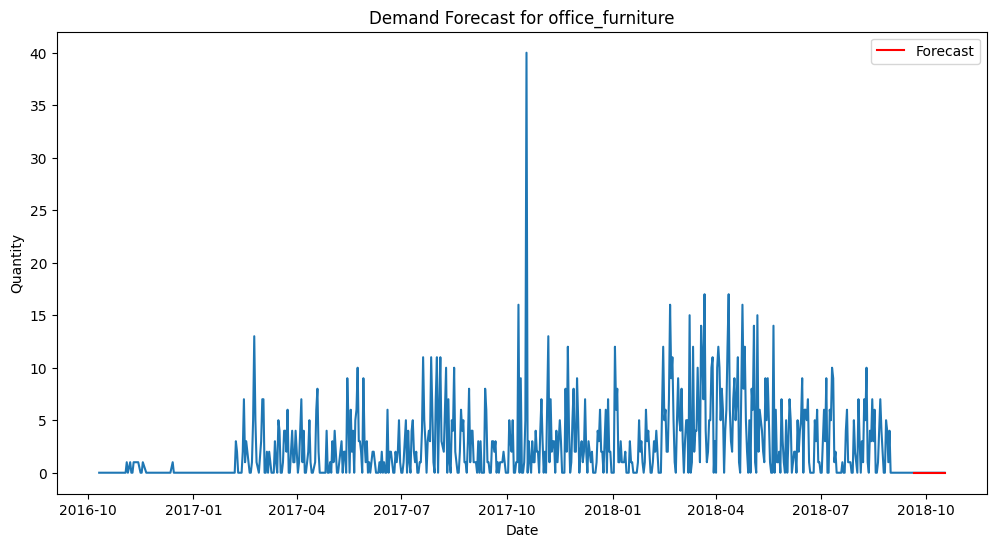

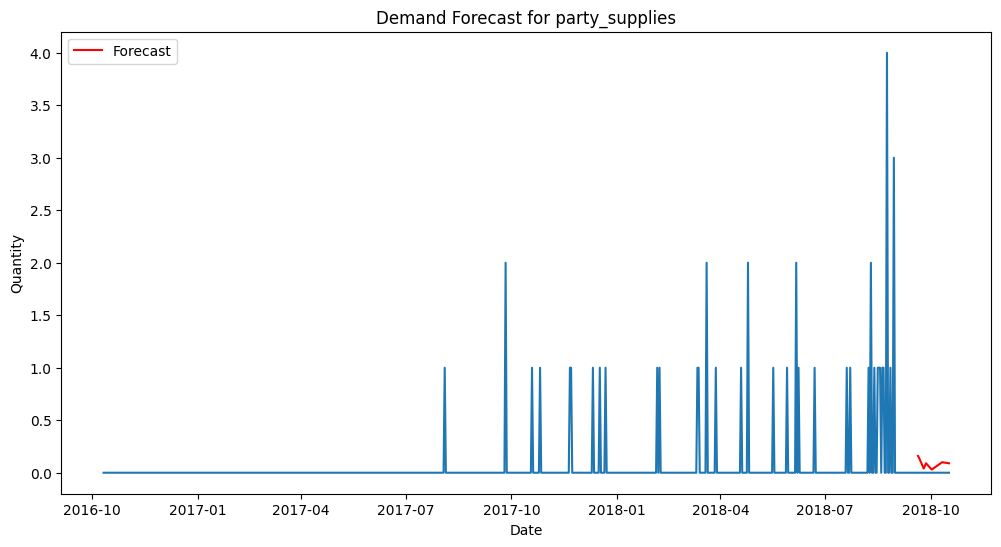

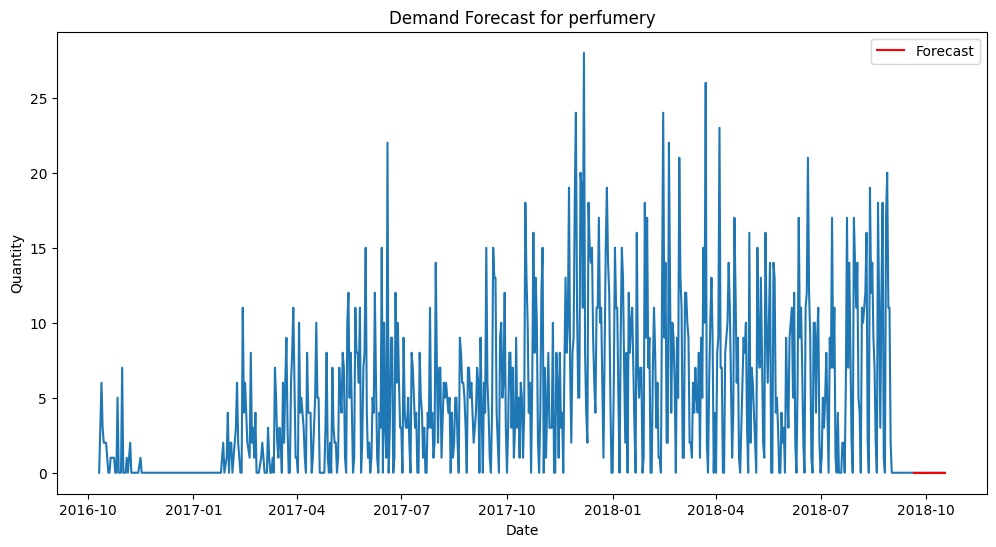

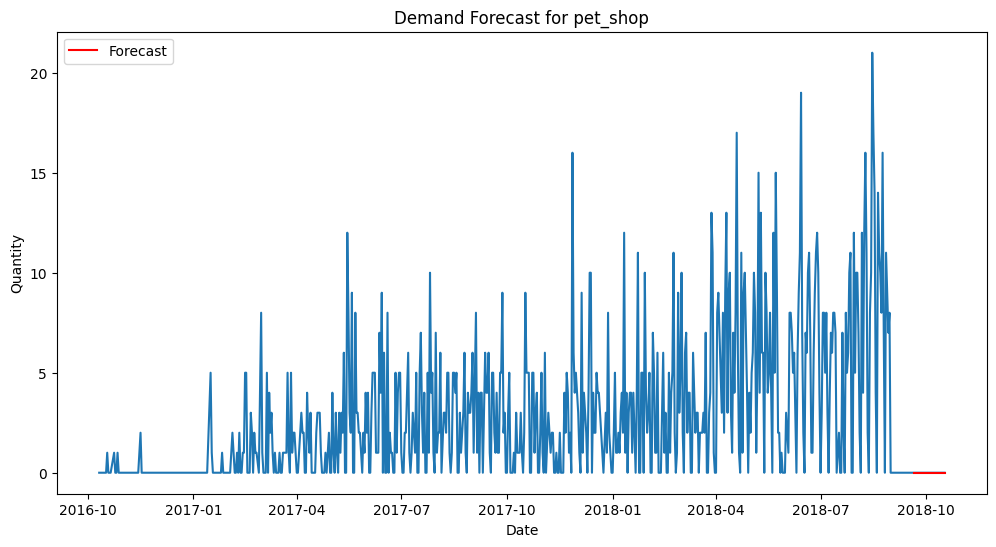

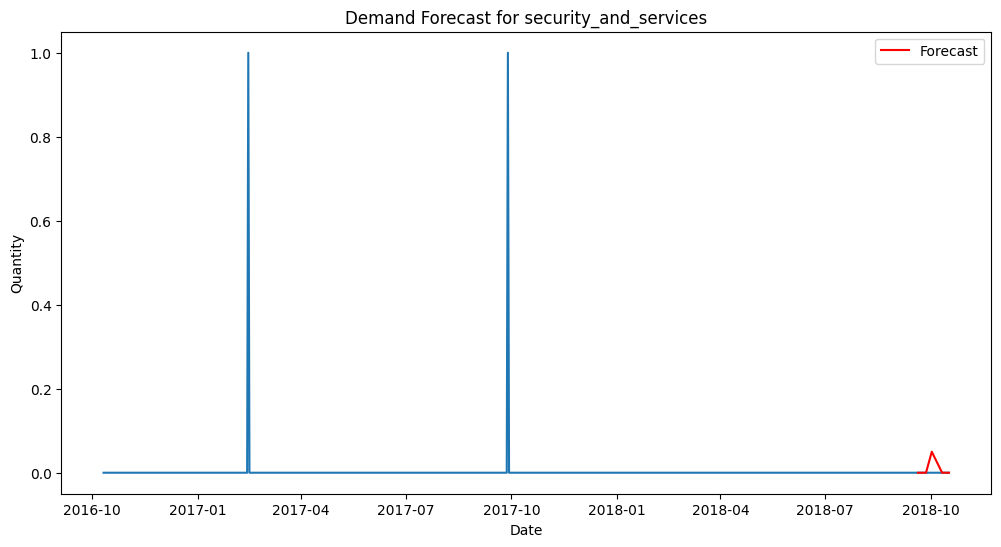

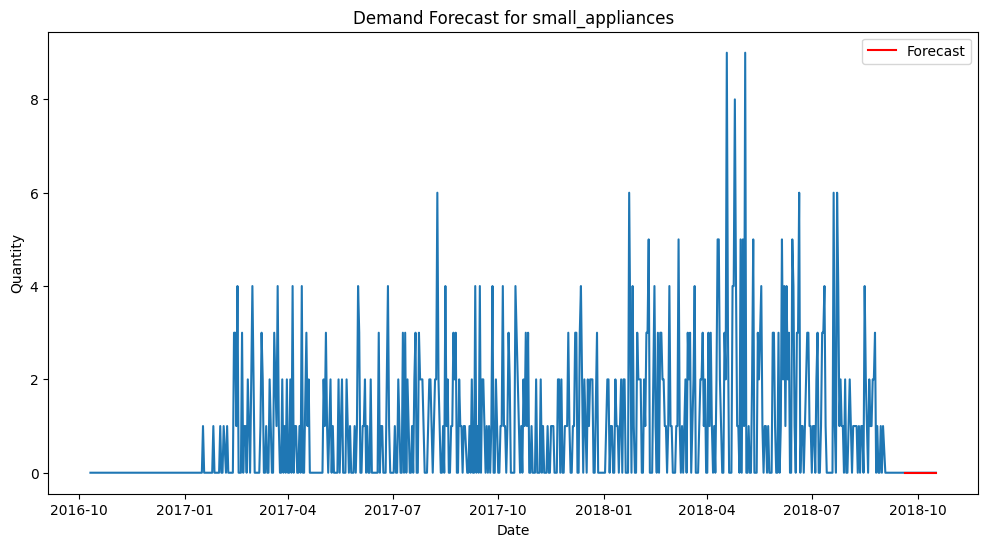

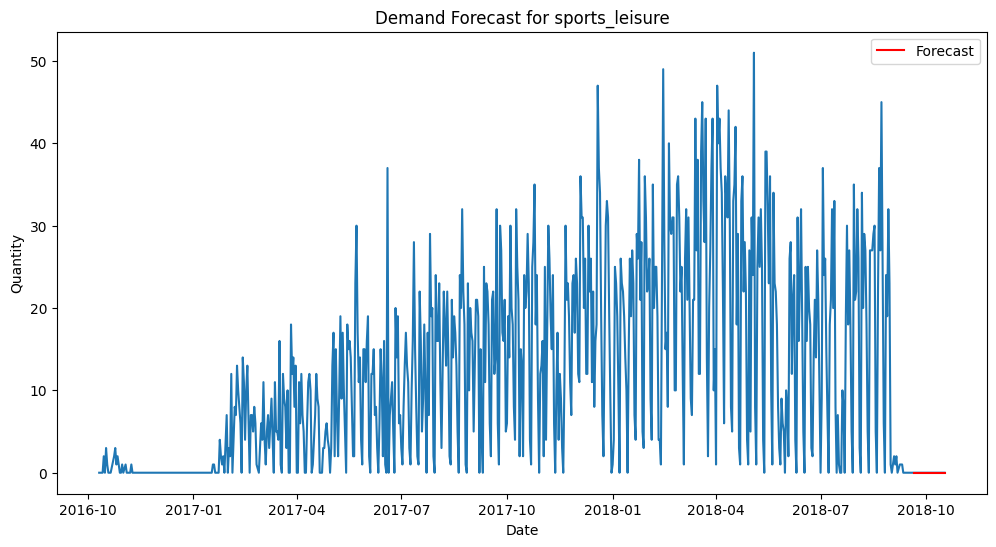

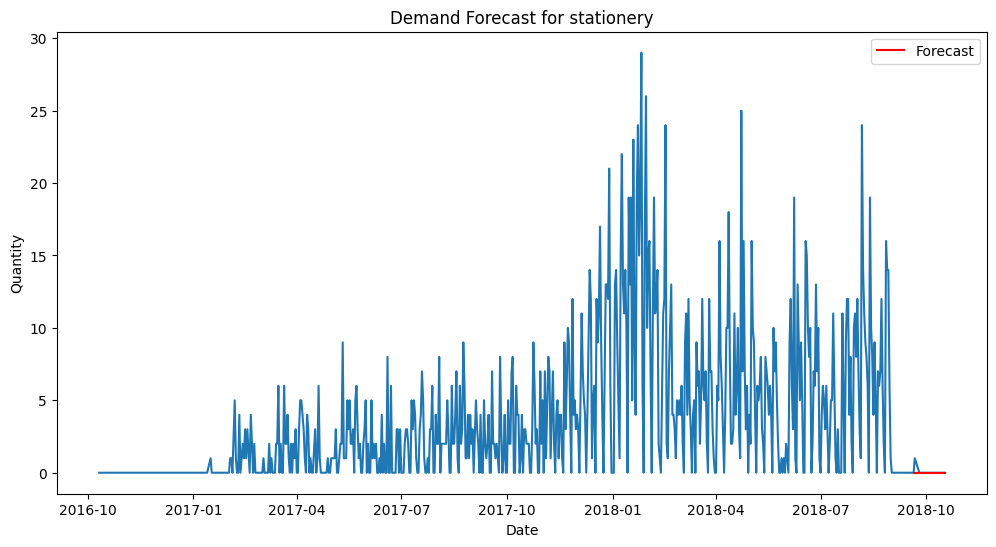

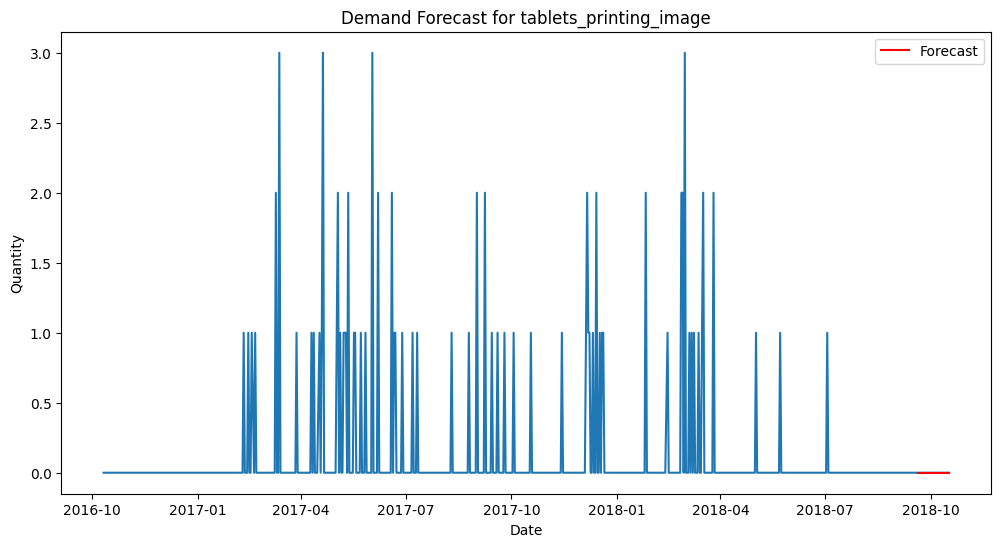

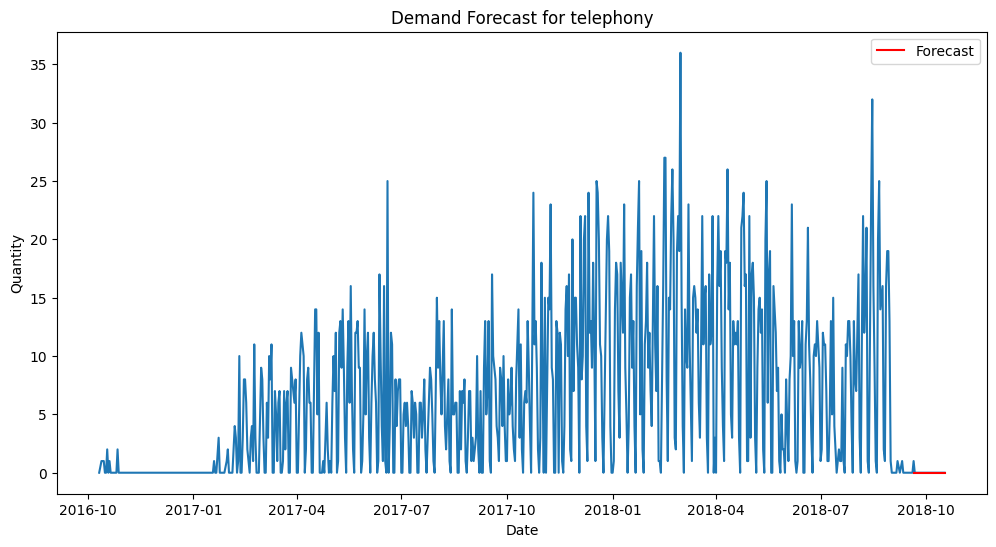

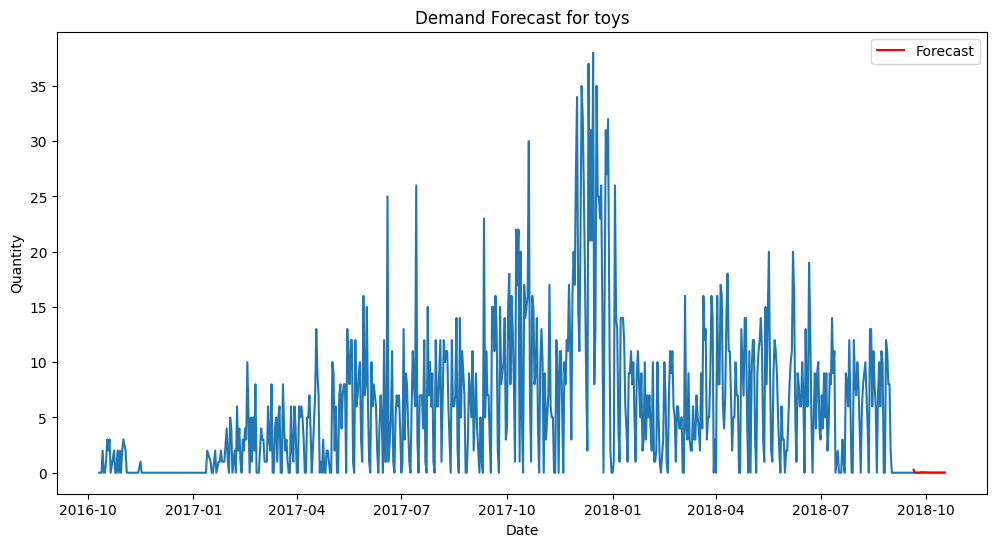

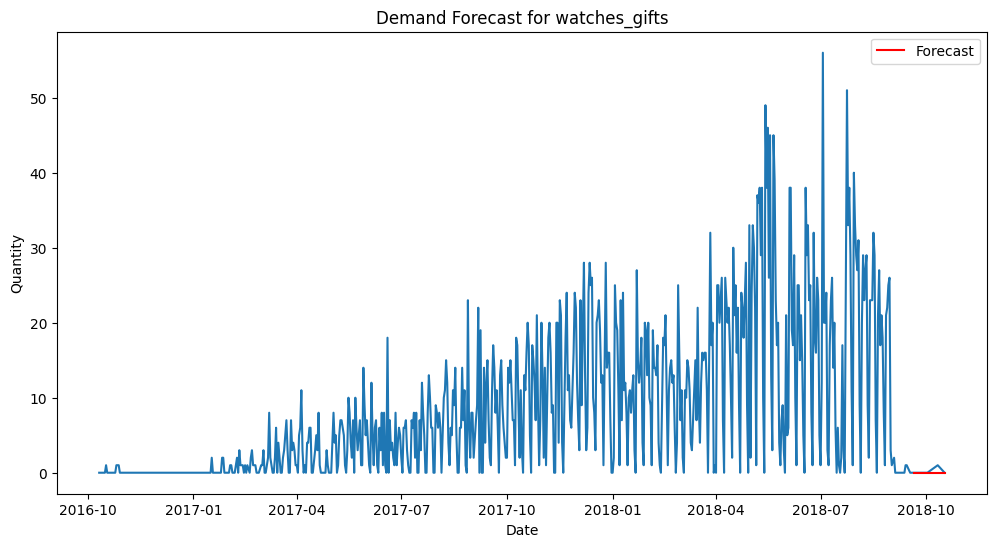

In [185]:
for category in rf_df.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(data.index, data[category])
  plt.plot(data[-7:].index, rf_df[category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()


Модель Random Forest спрогнозувала дані близькі до того, що є у вибірці

## Візуалізація передбачення GBR

In [190]:
gbr_df = gbr_df.set_index(data_t.index[-15:]).T

In [191]:
gbr_df

product_category_name_english  musical_instruments  office_furniture  \
2018-09-19                            1.422932e-06      1.422932e-06   
2018-09-20                            4.743107e-07      4.743107e-07   
2018-09-21                            9.486214e-07      9.486214e-07   
2018-09-25                            4.743107e-07      4.743107e-07   
2018-09-27                            4.743107e-07      4.743107e-07   
2018-10-02                            4.743107e-07      4.743107e-07   
2018-10-11                            4.743107e-07      4.743107e-07   

product_category_name_english  party_supplies     perfumery      pet_shop  \
2018-09-19                       1.422932e-06  1.422932e-06  1.422932e-06   
2018-09-20                       4.743107e-07  4.743107e-07  4.743107e-07   
2018-09-21                       9.486214e-07  9.486214e-07  9.486214e-07   
2018-09-25                       4.743107e-07  4.743107e-07  4.743107e-07   
2018-09-27                       4.743107e-07  4.743107e-07  4.743107e-07   
2018-10-02                       1.613332e-05  4.743107e-07  4.743107e-07   
2018-10-11                       4.743107e-07  4.743107e-07  4.743107e-07   

product_category_name_english  security_and_services  signaling_and_security  \
2018-09-19                              1.422932e-06            1.422932e-06   
2018-09-20                              4.743107e-07            4.743107e-07   
2018-09-21                              9.486214e-07            9.486214e-07   
2018-09-25                              4.743107e-07            2.326027e-02   
2018-09-27                              4.743107e-07            4.743107e-07   
2018-10-02                              4.743107e-07            4.743107e-07   
2018-10-11                              4.743107e-07            4.743107e-07   

product_category_name_english  small_appliances  \
2018-09-19                         1.422932e-06   
2018-09-20                         4.743107e-07   
2018-09-21                         9.486214e-07   
2018-09-25                         4.743107e-07   
2018-09-27                         4.743107e-07   
2018-10-02                         4.743107e-07   
2018-10-11                         4.743107e-07   

product_category_name_english  small_appliances_home_oven_and_coffee  \
2018-09-19                                              1.422932e-06   
2018-09-20                                              4.743107e-07   
2018-09-21                                              9.486214e-07   
2018-09-25                                              4.743107e-07   
2018-09-27                                              4.743107e-07   
2018-10-02                                              4.743107e-07   
2018-10-11                                              4.743107e-07   

product_category_name_english  sports_leisure    stationery  \
2018-09-19                       1.422932e-06  1.422932e-06   
2018-09-20                       4.743107e-07  4.743107e-07   
2018-09-21                       9.486214e-07  9.486214e-07   
2018-09-25                       4.743107e-07  4.743107e-07   
2018-09-27                       4.743107e-07  4.743107e-07   
2018-10-02                       4.743107e-07  4.743107e-07   
2018-10-11                       4.743107e-07  4.743107e-07   

product_category_name_english  tablets_printing_image     telephony  \
2018-09-19                               1.422932e-06  1.422932e-06   
2018-09-20                               4.743107e-07  4.743107e-07   
2018-09-21                               9.486214e-07  9.486214e-07   
2018-09-25                               4.743107e-07  4.743107e-07   
2018-09-27                               4.743107e-07  4.743107e-07   
2018-10-02                               4.743107e-07  4.743107e-07   
2018-10-11                               4.743107e-07  4.743107e-07   

product_category_name_english          toys  watches_gifts  
2018-09-19                     9.999749e-01 

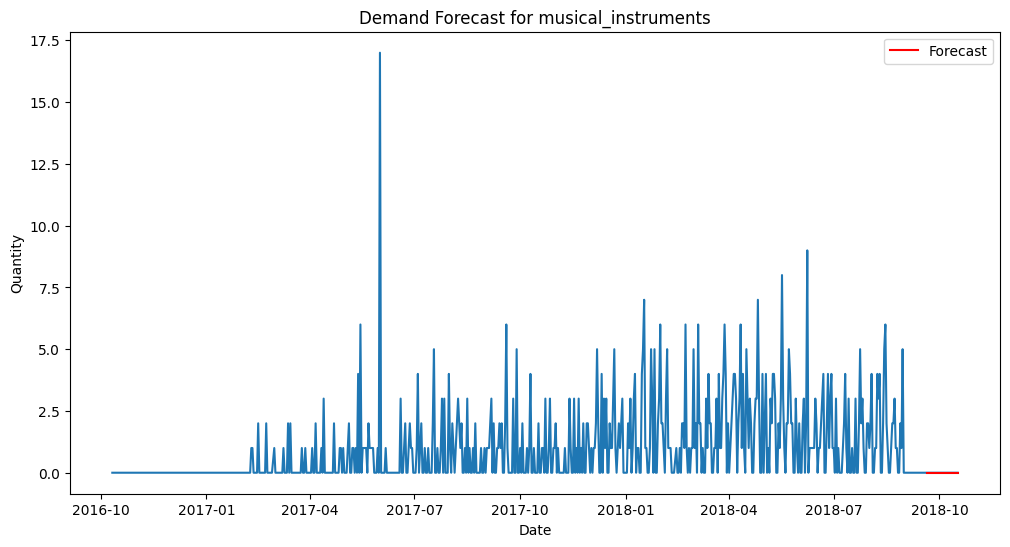

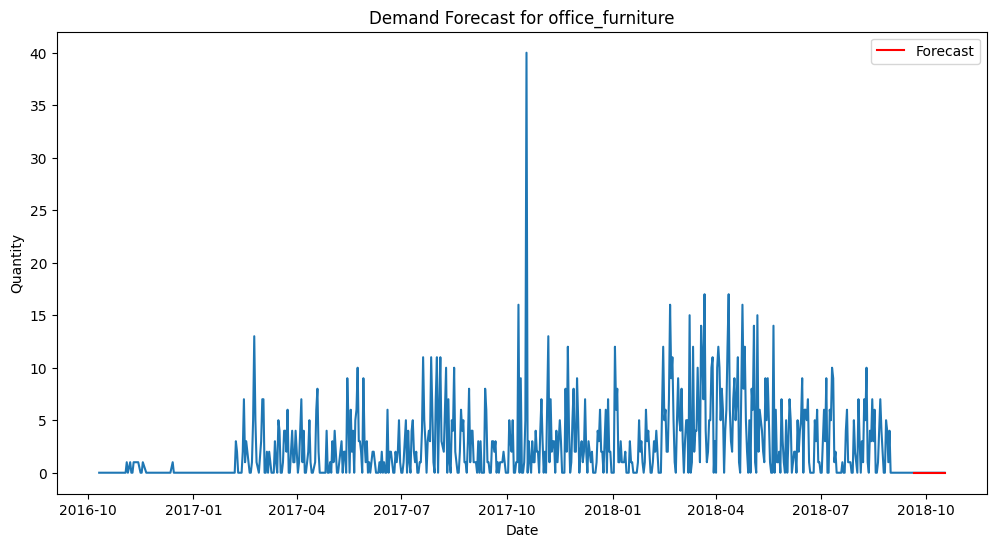

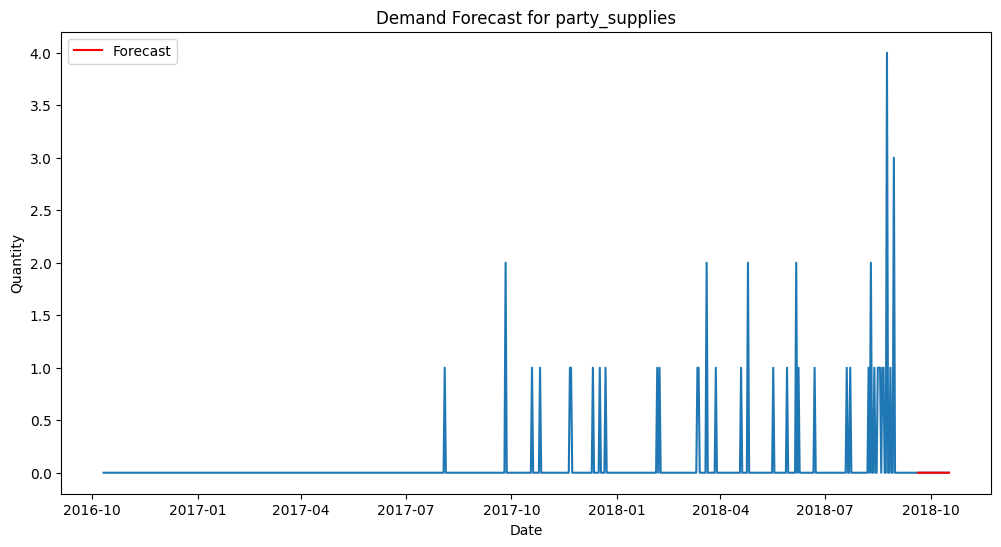

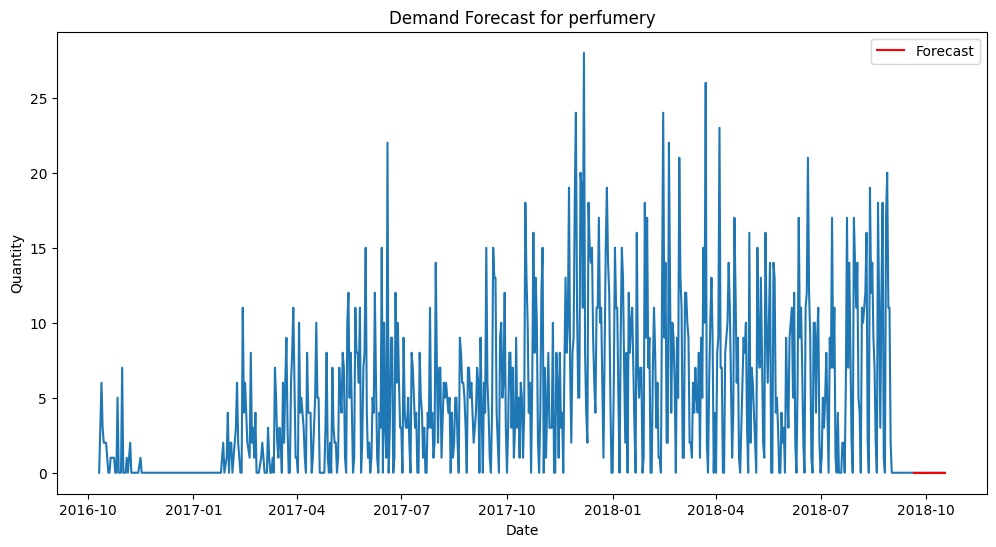

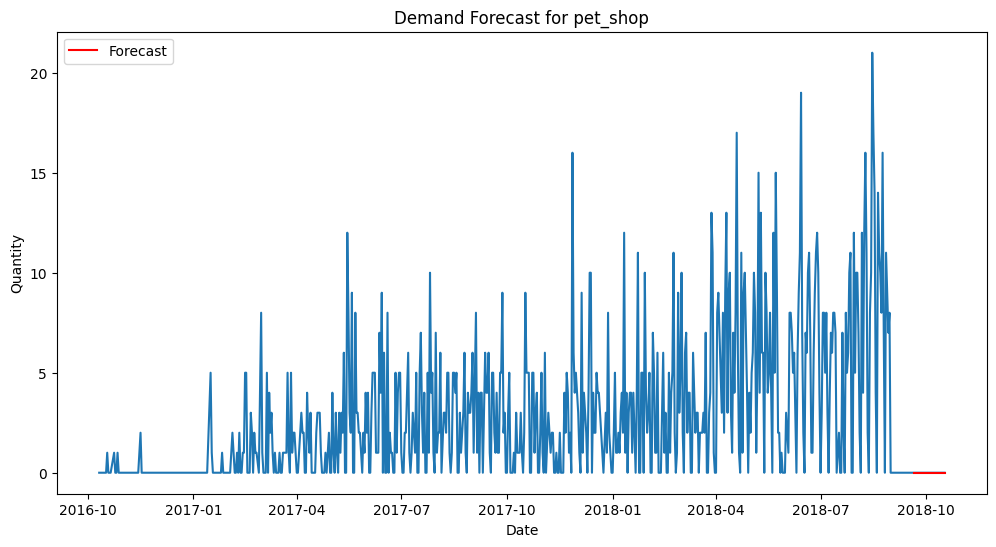

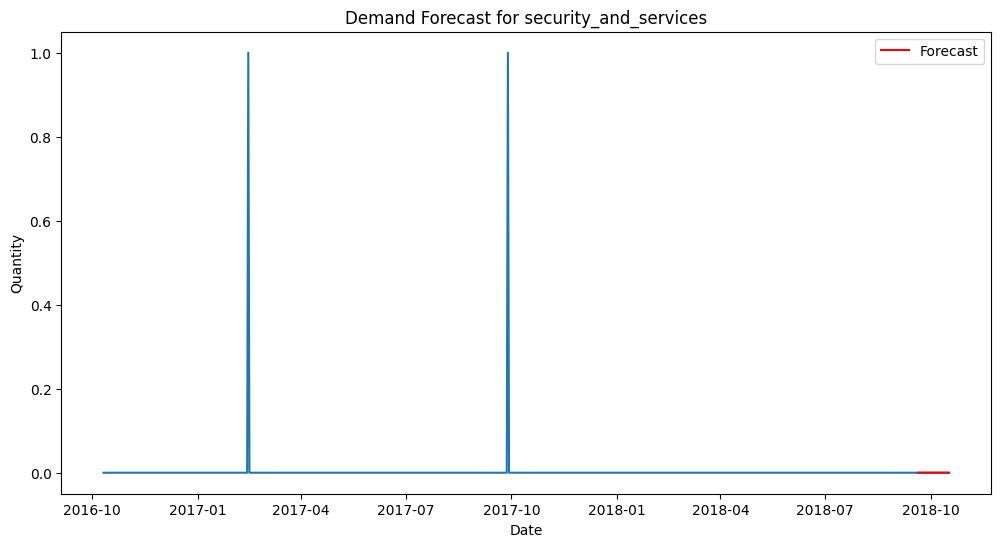

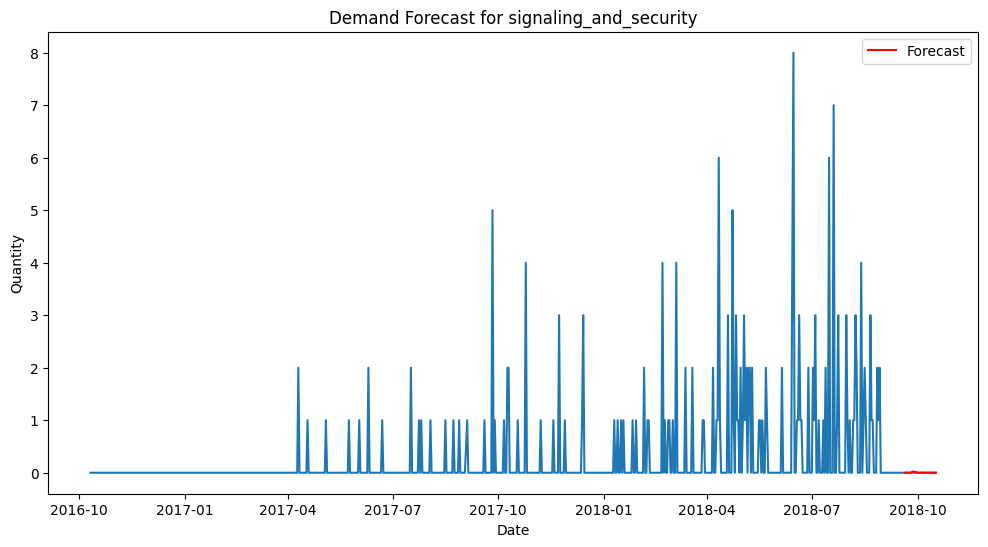

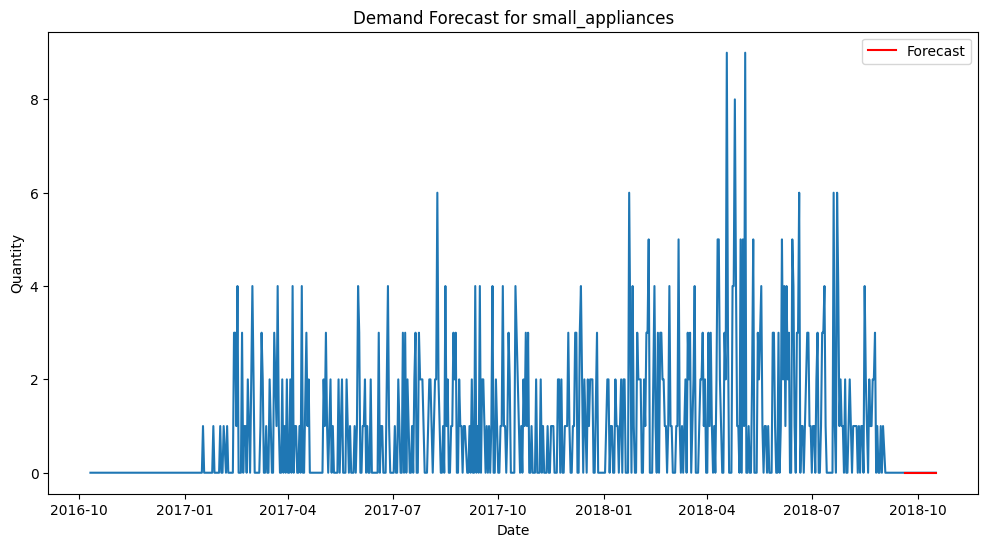

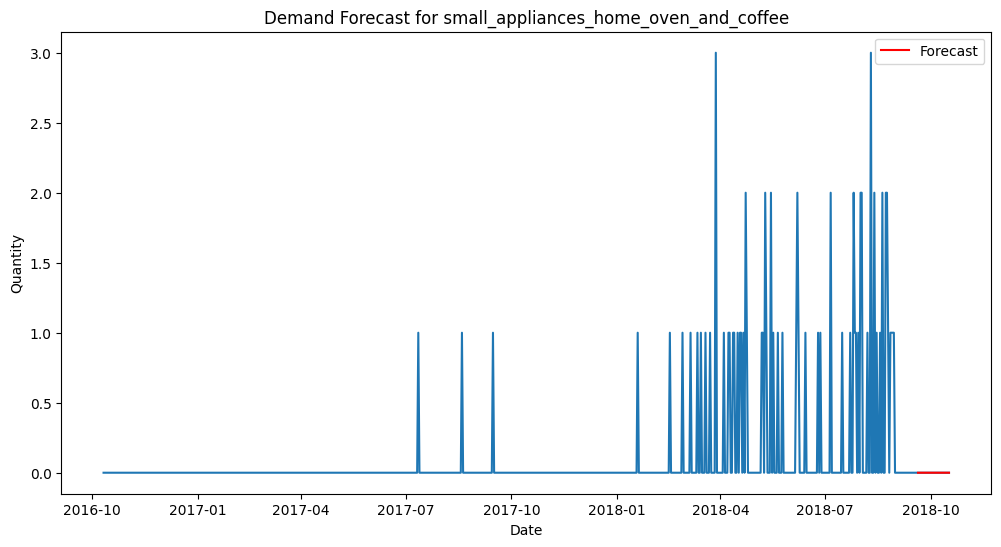

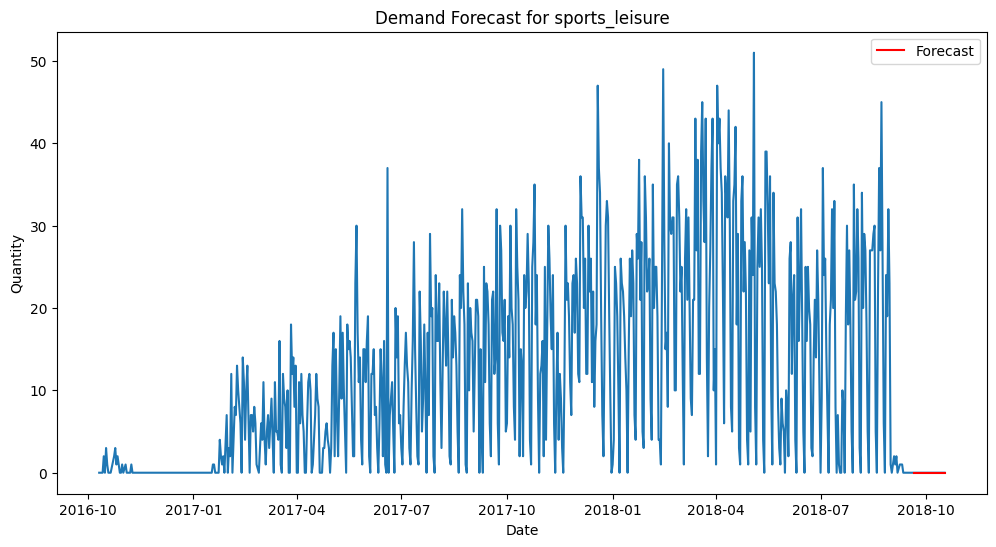

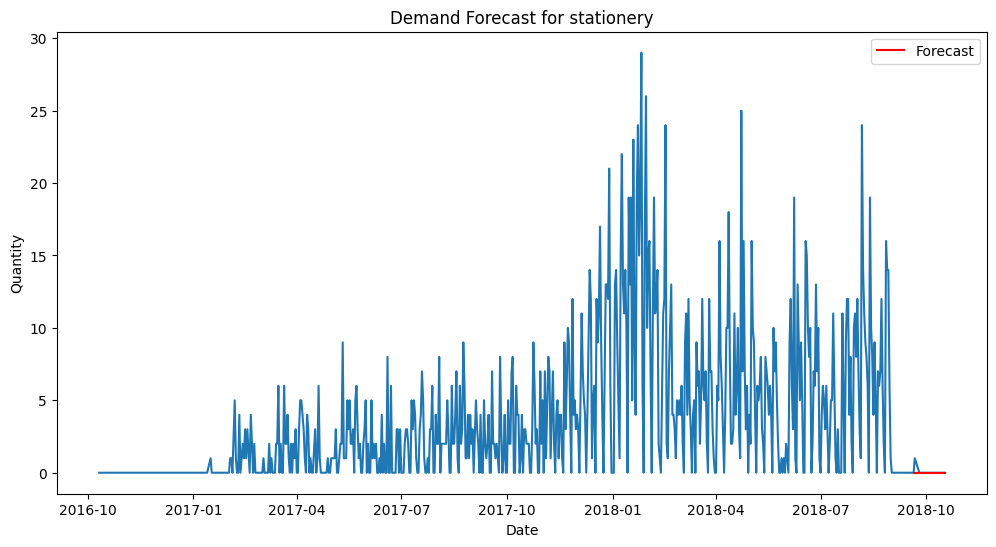

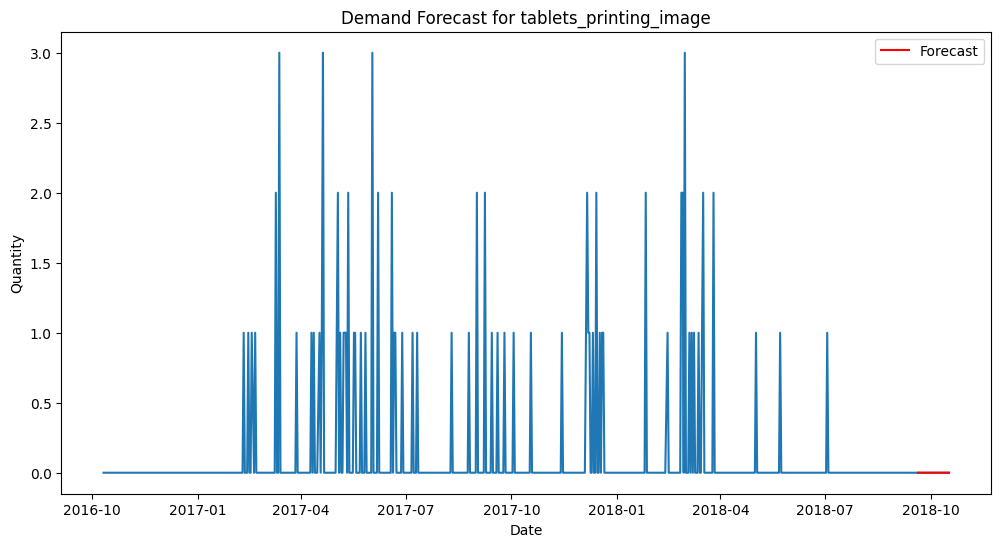

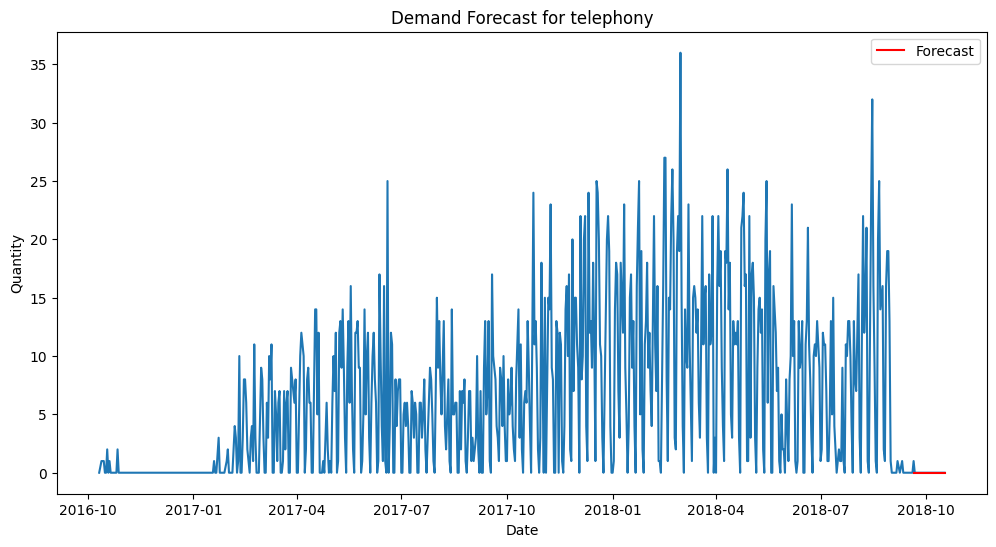

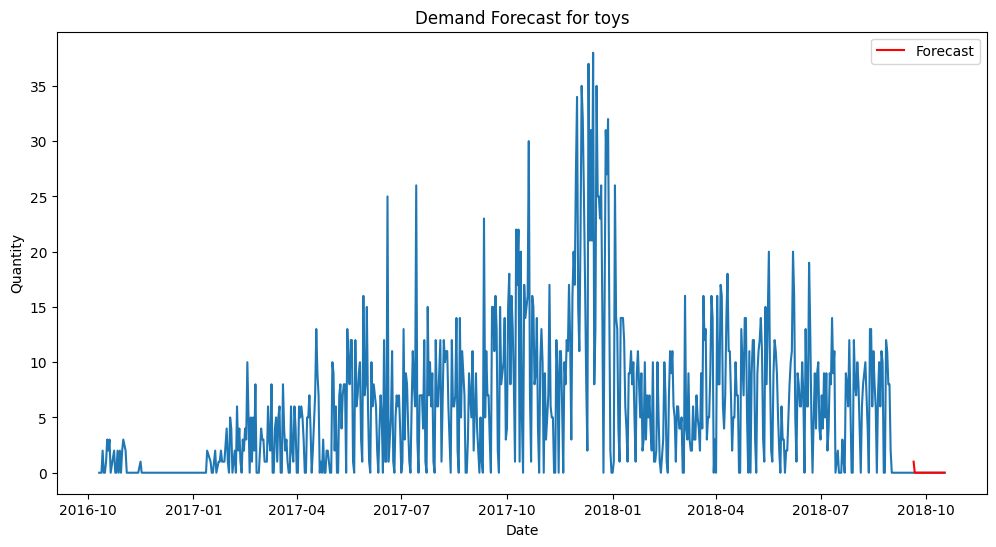

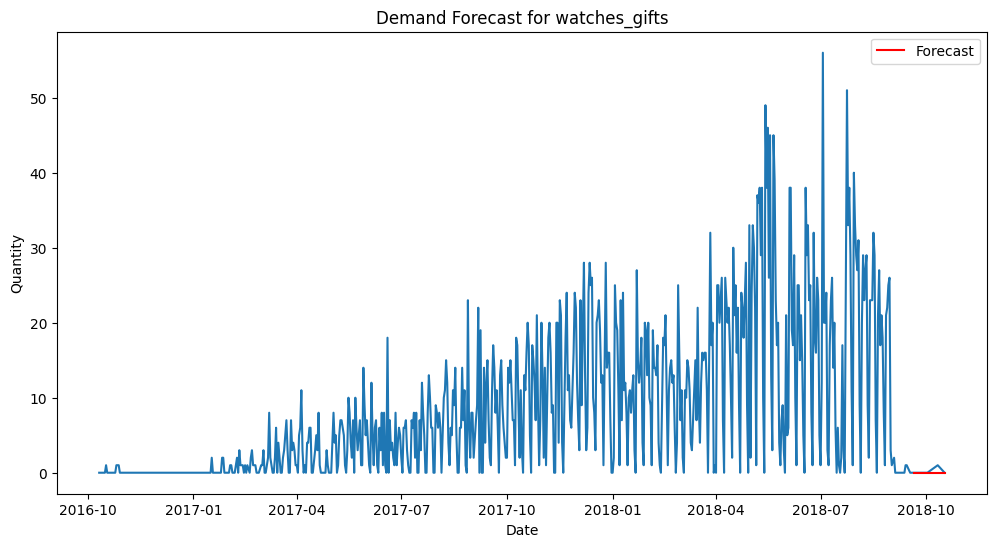

In [192]:
for category in rf_df.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(data.index, data[category])
  plt.plot(data[-7:].index, gbr_df[category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()


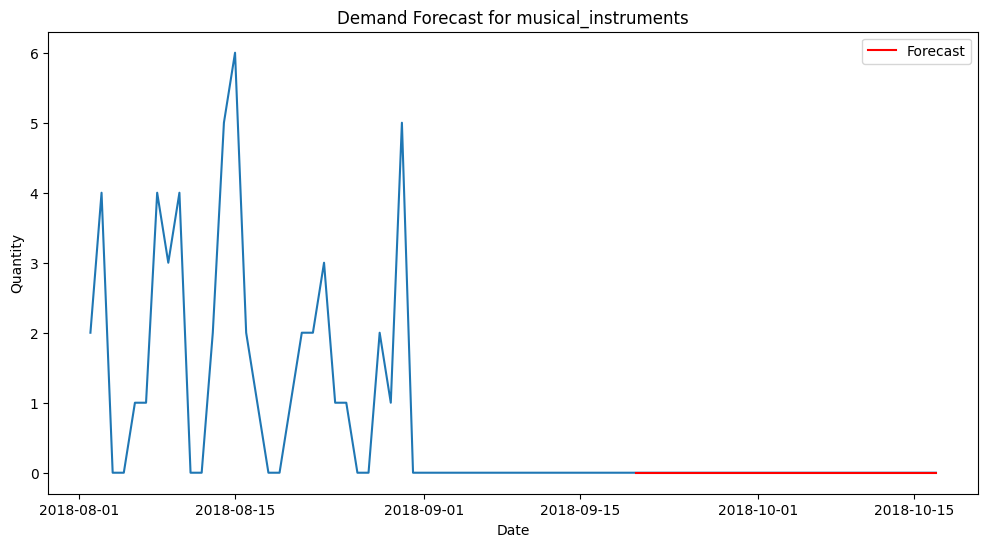

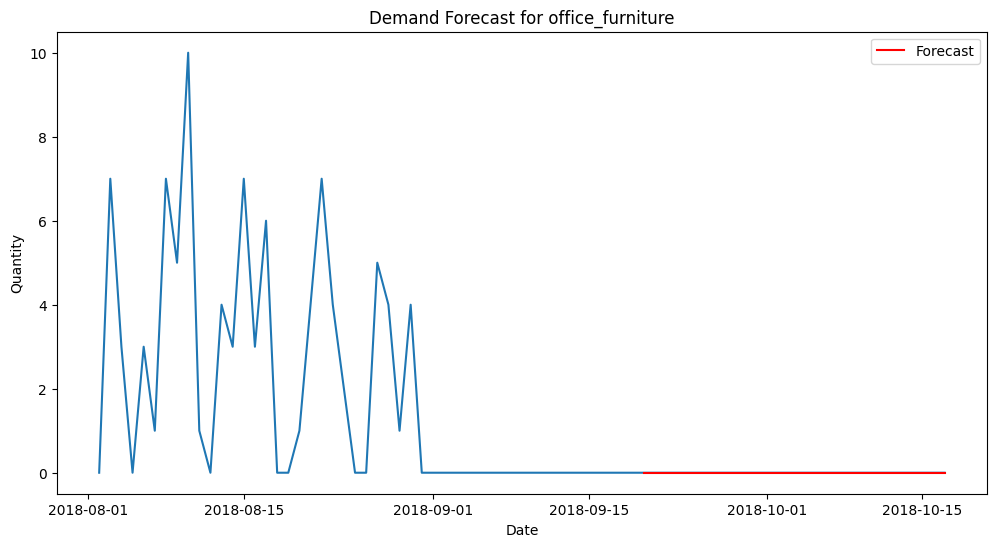

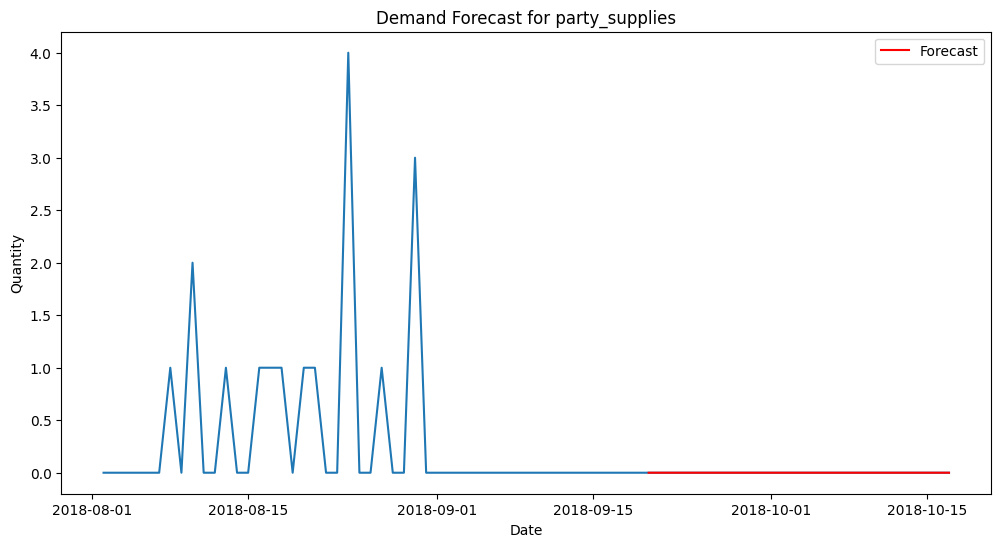

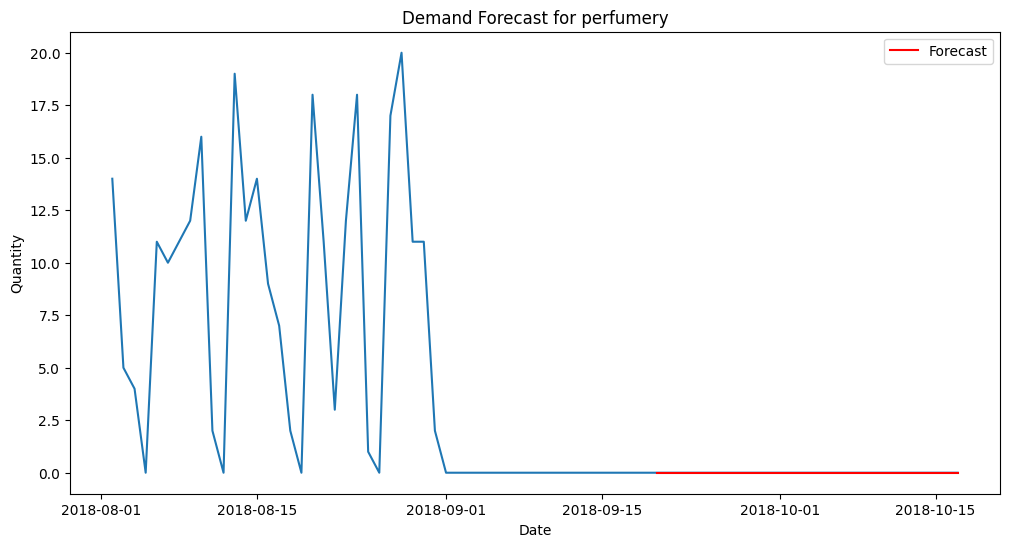

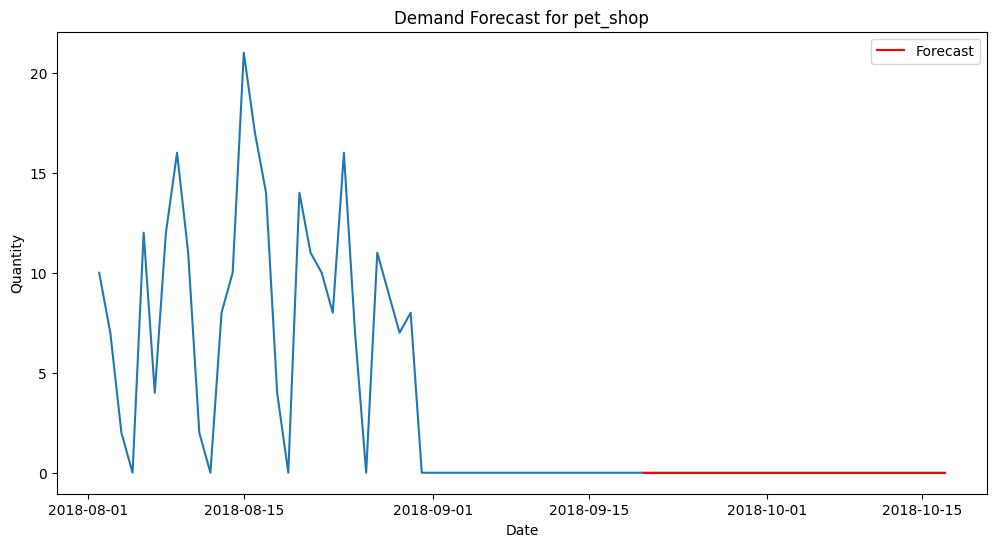

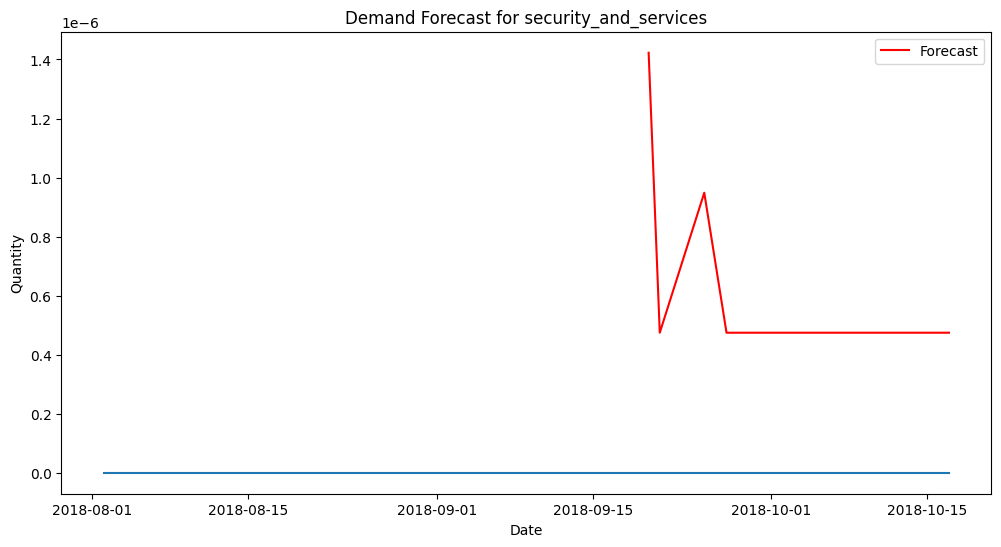

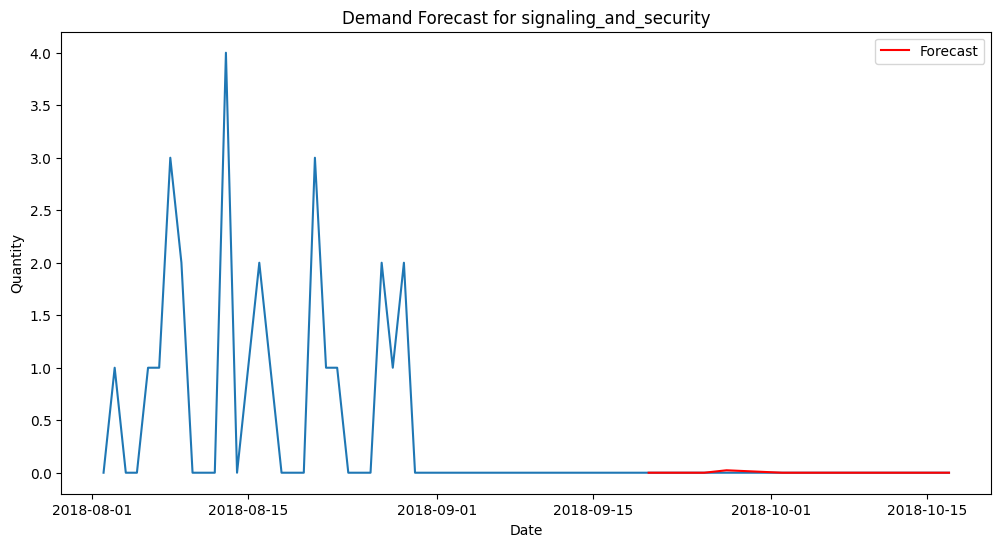

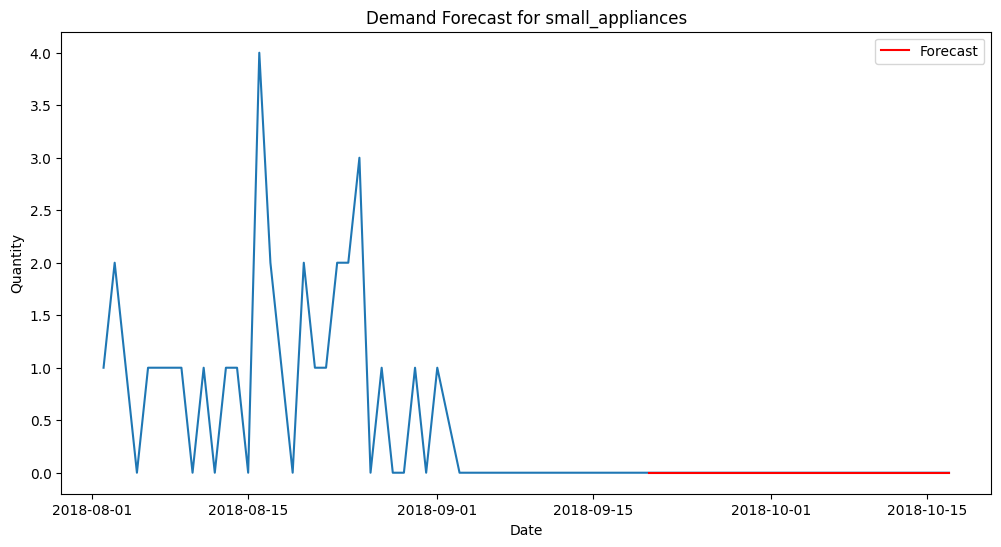

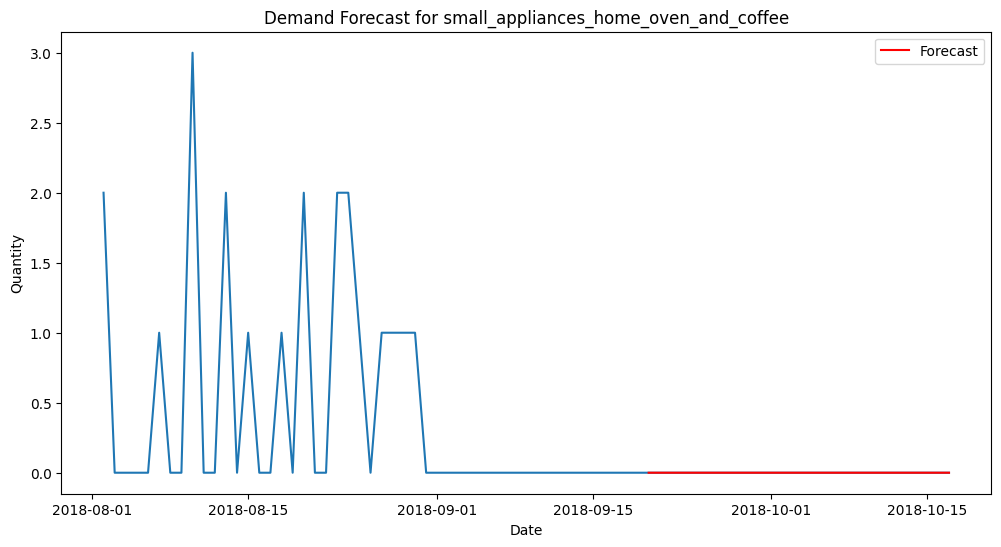

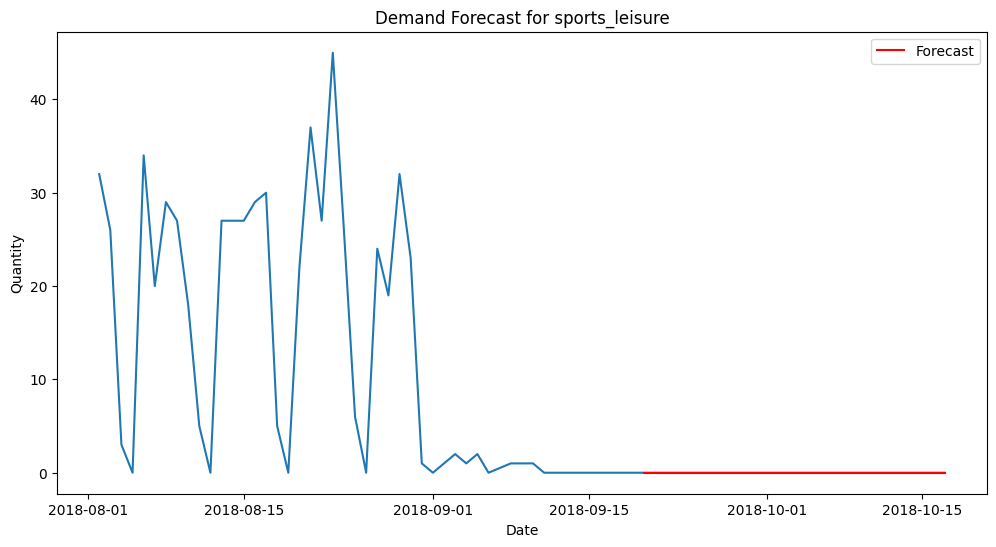

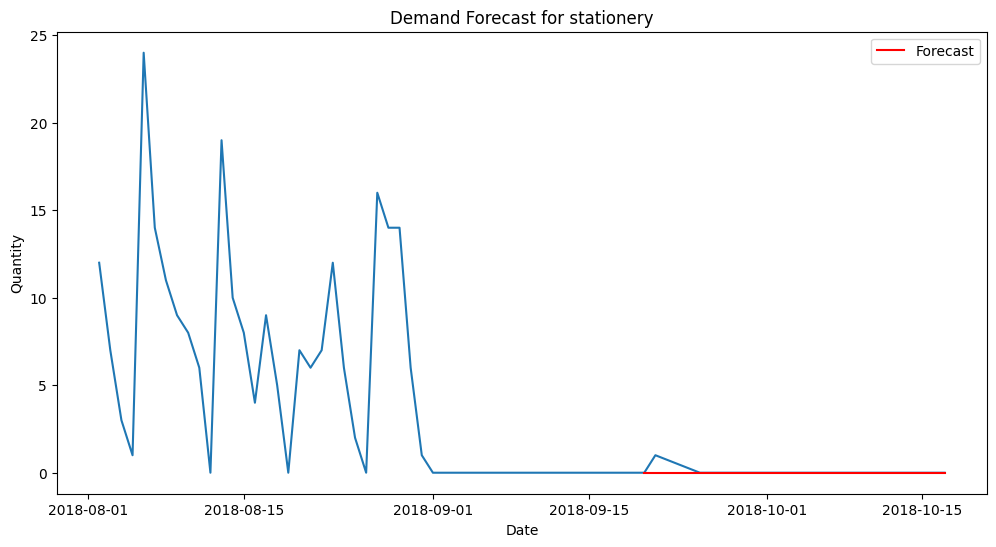

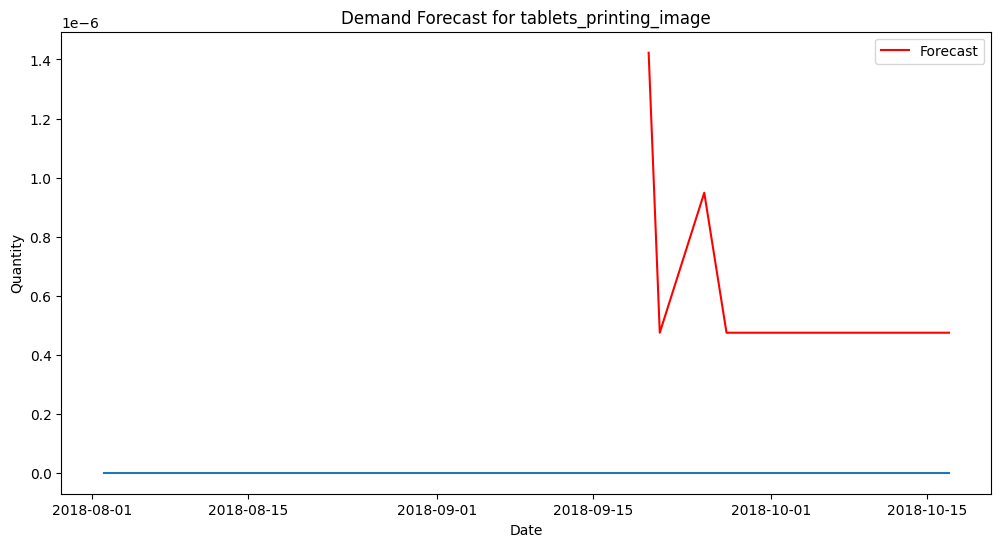

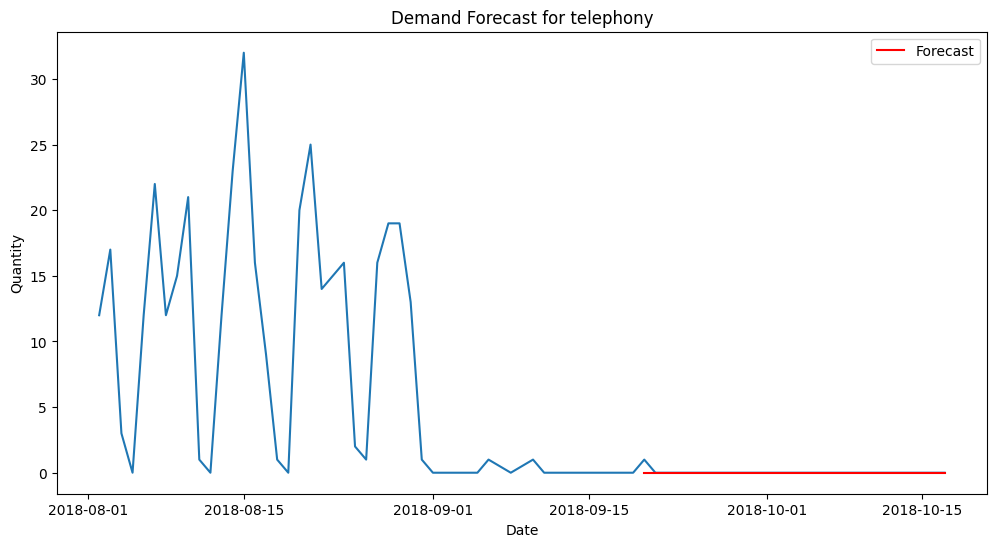

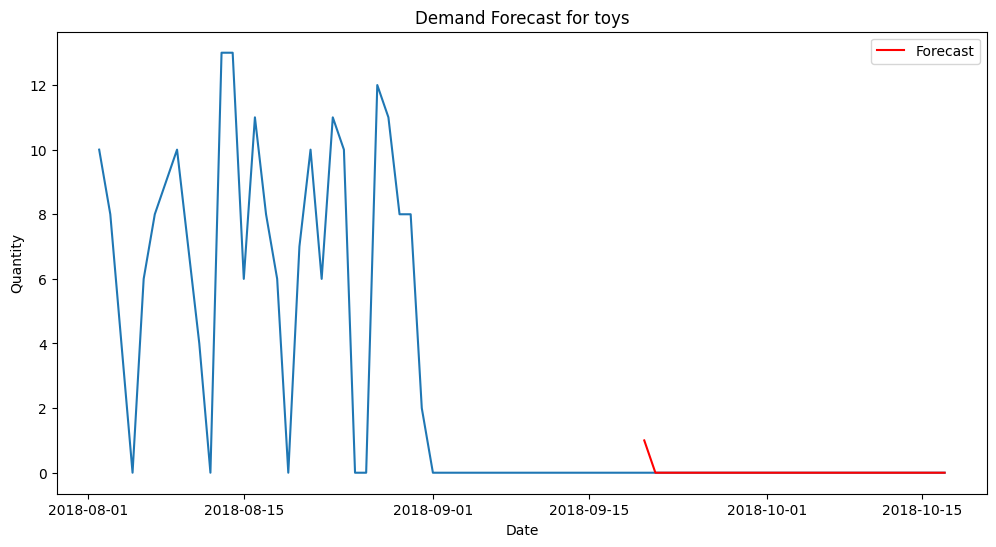

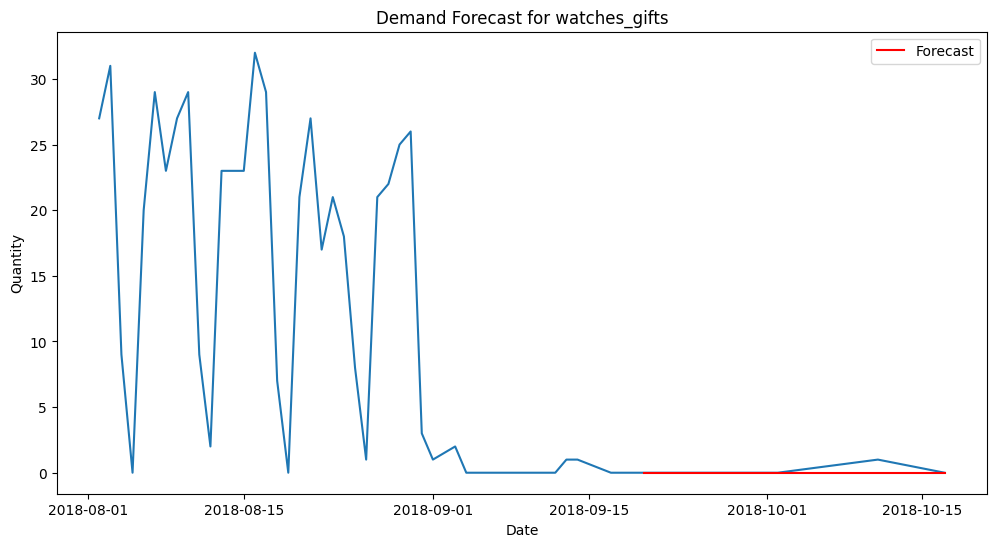

In [195]:
for category in rf_df.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(data[-50:].index, data[-50:][category])
  plt.plot(data[-7:].index, gbr_df[category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()

## Висновки

Передбачення будувалися на останній тиждень вибірки, де майже всі значення були нульовими. Моделі справилися досить непогано, хоча значення помилки для GBR залишає кілька питань. За графіком можна помітити, що в 10 місяць кожного року є деякі пониження показників продажей.

## Прогноз на 21 день за допомогою Random Forest

За схожим принципом можна спрогнозувати значення на всій вибірці для 1 наступного дня і повторювати пронозування на основі всієї вибірки + цього нового дня (ще 21 разів).

In [255]:
data_t.shape

(71, 644)

In [252]:
def random_forest(data, day):
  if day <= 0:
    return data

  df = data.copy()

  X = df[df.columns[:-1]]
  y = df[df.columns[-1:]]

  model = RandomForestRegressor()
  model.fit(X, y)
  model_pred = model.predict(X)

  next_day = df.columns[-1:][0] + pd.Timedelta(days=1)

  result = pd.DataFrame({next_day: model_pred}, index=df.index)

  new_df = pd.concat([df, result], axis=1)

  return random_forest(new_df, day - 1)



In [ ]:
df = random_forest(data_t, 21)

In [254]:
df

2016-10-11  2016-10-13  2016-10-14  2016-10-15  \
product_category_name_english                                                   
agro_industry_and_commerce            0.0         0.0         0.0         0.0   
air_conditioning                      0.0         0.0         0.0         0.0   
art                                   0.0         0.0         0.0         0.0   
arts_and_craftmanship                 0.0         0.0         0.0         0.0   
audio                                 0.0         0.0         0.0         0.0   
...                                   ...         ...         ...         ...   
stationery                            0.0         0.0         0.0         0.0   
tablets_printing_image                0.0         0.0         0.0         0.0   
telephony                             0.0         1.0         1.0         1.0   
toys                                  0.0         0.0         2.0         0.0   
watches_gifts                         0.0         0.0         0.0         0.0   

                               2016-10-16  2016-10-17  2016-10-18  2016-10-19  \
product_category_name_english                                                   
agro_industry_and_commerce            0.0         0.0         0.0         0.0   
air_conditioning                      0.0         0.0         0.0         0.0   
art                                   0.0         0.0         0.0         0.0   
arts_and_craftmanship                 0.0         0.0         0.0         0.0   
audio                                 0.0         0.0         1.0         0.0   
...                                   ...         ...         ...         ...   
stationery                            0.0         0.0         0.0         0.0   
tablets_printing_image                0.0         0.0         0.0         0.0   
telephony                             0.0         0.0         2.0         0.0   
toys                                  0.0         1.0         3.0         2.0   
watches_gifts                         0.0         1.0         0.0         0.0   

                               2016-10-20  2016-10-21  ...  2018-10-29  \
product_category_name_english                          ...               
agro_industry_and_commerce            0.0         0.0  ...    0.002698   
air_conditioning                      0.0         0.0  ...    0.000655   
art                                   0.0         0.0  ...    0.000575   
arts_and_craftmanship                 0.0         0.0  ...    0.000029   
audio                                 1.0         0.0  ...    0.000521   
...                                   ...         ...  ...         ...   
stationery                            0.0         0.0  ...    0.014738   
tablets_printing_image                0.0         0.0  ...    0.000223   
telephony                             1.0         0.0  ...    0.027662   
toys                                  3.0         0.0  ...    0.024310   
watches_gifts                         0.0         0.0  ...    0.035969   

                               2018-10-30  2018-10-31  2018-11-01  2018-11-02  \
product_category_name_english                                                   
agro_industry_and_commerce       0.003161    0.003131    0.003193    0.003239   
air_conditioning                 0.000786    0.001048    0.001174    0.001133   
art                              0.000587    0.000594    0.000738    0.000765   
arts_and_craftmanship            0.000032    0.000034    0.000034    0.000035   
audio                            0.000519    0.000894    0.000826    0.001019   
...                                   ...         ...         ...         ...   
stationery                       0.015306    0.015634    0.015368    0.015844   
tablets_printing_image           0.000261    0.000280    0.000278    0.000326   
telephony                        0.027845    0.025995    0.026741    0.026103   
toys                             0.025200    0.025450    0.025709    

In [256]:
df_t = df.T

In [262]:
for category in df_t.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(df_t.index[545:645], df_t[545:645][category])
  plt.plot(df_t[644:].index, df_t[644:][category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Також можна спробувати помножити значення на 10 або 100

In [264]:
for category in df_t.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(df_t.index[:645], df_t[:645][category])
  plt.plot(df_t[644:].index, 100 * df_t[644:][category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Таким чином, прогнози виглядають реалістичніше

In [265]:
for category in df_t.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(df_t.index[545:645], df_t[545:645][category])
  plt.plot(df_t[644:].index, 100 * df_t[644:][category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Прогноз на 21 день за допомогою Gradient Boosting

In [266]:
def gradient_boosting(data, day):
  if day <= 0:
    return data

  df = data.copy()

  X = df[df.columns[:-1]]
  y = df[df.columns[-1:]]

  model = GradientBoostingRegressor()
  model.fit(X, y)
  model_pred = model.predict(X)

  next_day = df.columns[-1:][0] + pd.Timedelta(days=1)

  result = pd.DataFrame({next_day: model_pred}, index=df.index)

  new_df = pd.concat([df, result], axis=1)

  return gradient_boosting(new_df, day - 1)


In [ ]:
df = gradient_boosting(data_t, 21)

In [278]:
df

2016-10-11  2016-10-13  2016-10-14  2016-10-15  \
product_category_name_english                                                   
agro_industry_and_commerce            0.0         0.0         0.0         0.0   
air_conditioning                      0.0         0.0         0.0         0.0   
art                                   0.0         0.0         0.0         0.0   
arts_and_craftmanship                 0.0         0.0         0.0         0.0   
audio                                 0.0         0.0         0.0         0.0   
...                                   ...         ...         ...         ...   
stationery                            0.0         0.0         0.0         0.0   
tablets_printing_image                0.0         0.0         0.0         0.0   
telephony                             0.0         1.0         1.0         1.0   
toys                                  0.0         0.0         2.0         0.0   
watches_gifts                         0.0         0.0         0.0         0.0   

                               2016-10-16  2016-10-17  2016-10-18  2016-10-19  \
product_category_name_english                                                   
agro_industry_and_commerce            0.0         0.0         0.0         0.0   
air_conditioning                      0.0         0.0         0.0         0.0   
art                                   0.0         0.0         0.0         0.0   
arts_and_craftmanship                 0.0         0.0         0.0         0.0   
audio                                 0.0         0.0         1.0         0.0   
...                                   ...         ...         ...         ...   
stationery                            0.0         0.0         0.0         0.0   
tablets_printing_image                0.0         0.0         0.0         0.0   
telephony                             0.0         0.0         2.0         0.0   
toys                                  0.0         1.0         3.0         2.0   
watches_gifts                         0.0         1.0         0.0         0.0   

                               2016-10-20  2016-10-21  ...  2018-10-29  \
product_category_name_english                          ...               
agro_industry_and_commerce            0.0         0.0  ...    0.000004   
air_conditioning                      0.0         0.0  ...    0.000004   
art                                   0.0         0.0  ...    0.000004   
arts_and_craftmanship                 0.0         0.0  ...    0.000004   
audio                                 1.0         0.0  ...    0.000004   
...                                   ...         ...  ...         ...   
stationery                            0.0         0.0  ...    0.000004   
tablets_printing_image                0.0         0.0  ...    0.000004   
telephony                             1.0         0.0  ...    0.000004   
toys                                  3.0         0.0  ...    0.000004   
watches_gifts                         0.0         0.0  ...    0.000004   

                               2018-10-30  2018-10-31  2018-11-01  2018-11-02  \
product_category_name_english                                                   
agro_industry_and_commerce       0.000005    0.000005    0.000006    0.000006   
air_conditioning                 0.000005    0.000005    0.000006    0.000006   
art                              0.000005    0.000005    0.000006    0.000006   
arts_and_craftmanship            0.000005    0.000005    0.000006    0.000006   
audio                            0.000005    0.000005    0.000006    0.000006   
...                                   ...         ...         ...         ...   
stationery                       0.000005    0.000005    0.000006    0.000006   
tablets_printing_image           0.000005    0.000005    0.000006    0.000006   
telephony                        0.000005    0.000005    0.000006    0.000006   
toys                             0.000005    0.000005    0.000006    

Досить цікаві рзультати. Виглядає не зовсім реалістично, але спробувати можна

In [ ]:
df_t = df.T
df_t

In [281]:
for cat in df_t.columns:
  df_t[cat] = df_t[cat].round(3)

In [ ]:
df_t

In [286]:
for category in df_t.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(df_t.index[545:645], df_t[545:645][category])
  plt.plot(df_t[644:].index, 10000 * df_t[644:][category], label="Forecast", color="red")
  plt.title(f"Demand Forecast for {category}")
  plt.xlabel("Date")
  plt.ylabel("Quantity")
  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Висновок

1) Перше, що можна сказати, що на історичних даних можна підібрати певні моделі та параметри і прогнозувати, але це досить ненадійний спосіб. Такий спосіб можливий для короткочасних прогнозів і з детальнішим аналізом кожної категорії даних.

2) Загалом, моделі на основі таких даних навчилися непогано, незважаючи на те, що при аналізі не були використані більш наводжуючі дані про кожну категорію відносно певного періоду.

3) За графіками та результатами аналізу видно, що в деяких даних існує сезонність або залежність від дня тижня. При бажанні отримати якомога кращі результати треба врахувати ці моменти. Також, для кожної категорії можна додати додаткові фічі: коментар/оцінка покупця, день тижня, сезонність, геолокація та, можливо, ціна. В таких моментах теж важливо фільтрувати кількість додаткових фіч і слідкувати за перенавчанням моделей.

4) Також, можливий варіант перебору категорій, дослідження на схожість між ними властивостей (ознак) та групування між собою. При побудові моделі ARIMA диференціювання допомогло деяким категоріям, але не більшості.

## Пояснення вибору моделей

* **ARIMA (autoregressive integrated moving average)** -- модель авторегресійної інтегрованої ковзної середньої (AR + I + MA). Часто використовується в задачах на прогнозування відносно часових рядів: для прогнозування. Модель є ефективним рішенням для прогнозування на основі як стаціонарних так і нестаціонарних даних.

Авторегресійні моделі прогнозують значення часового ряду на основі його
минулих значень. Моделі ковзного середнього визначає прогноз часового ряду на
основі похибок минулих прогнозів.

Прогнозування часових рядів полягає у знаходженні майбутніх значень часового
ряду з якомога найбільшою точністю на основі минулих значень часового ряду та
інформації про його поведінку у минулому.

* **Random Forest / GBM** -- ансамблеві моделі класичного машинного навчання. Ансамблі чим хороші - це поєднання декількох алгоритмів, які навчаються одночасно і виправляють помилки один одного. Вони є гнучким та інтерпретованим способом вирішення проблем, що включає прогнозування цін на нерухомість, класифікацію споживачів та визначення шляху для реклами.

**Випадковий ліс** - це сукупність дерев рішень, які використовує деревоподібну структуру для розбиття набору даних на менші підмножини, а **Градієнтний бустинг** використовує градієнтний спуск для оптимізації та алгоритми ансамблів (дерев рішень) для передбачення.


Всі ці моделі єфективні та надійні перед задачами прогнозування, де в якості даних надаються нестабільні та неоднорідні дані. Ансамблі взагалі є чудовим рішенням для вирішення багатьох питань машинного навчання.


## Можливість розрахунку прогнозу на майбутні періоди

* def make_forecast(period)
* def random_forest(data, days)
* def gradient_boosting(data, days)